<h1 style="text-align:center;"><font color='red' size=10><b> Before you start! </b></font></h1>

This project is divided in 3 parts:

1) ETL, where we will Extract, Transform and Load data into an AWS RDS.

https://colab.research.google.com/drive/1w9bPc49joLrceMWAF_RlEgXo73s1Eeee?usp=sharing

<br><br>

**2) Data Analysis: exploratory data analysis to identify key features. <font color='red'>-> you are here</font>**

https://colab.research.google.com/drive/1a_Etj5kwEaq5epwoV9TVPNS3ShRRd7wU?usp=sharing

<br><br>

3) Prediction models: model building and comparison.

https://colab.research.google.com/drive/1Nbj6TM5HaK2krMRa9R1oiolDhDronYQB?usp=sharing

<br><br>

Summary of this project: https://colab.research.google.com/drive/1CUjP7SdFGldPjuSVSIbHAk9UPWYp_RYz?usp=sharing

<br><br>

A summary of the data can be visualized on this <font color='red'>**Power BI dashboard:**</font> https://app.powerbi.com/view?r=eyJrIjoiNTkzZjNmY2UtNmQ5Mi00MTJhLTliNzgtZGU2NzRlYzQ5NDA1IiwidCI6IjE2OGQ0MTM3LWQ2ZjYtNDVmOC1hYWE3LWQxYTcwMjMzMDk1ZSIsImMiOjR9&pageName=ReportSection4f69a4c8629ea033a165

# **Analyzing Youtube channels that I am subscribed to using its API.**

I love watching Youtube. It's a very diverse streaming service (even before video streaming was a thing), with videos ranging from comedy to science and curiosity, short or long, from channels with millions of subscribers to small comunnities with just a few hundred. 

But content creators suffer from "punitive algorithms" (in their words) that increase or decrease their visibility based on a plethora of metrics, more often than ever unknown to them. From YT perspective it's actually understandable, since a lot of viewers are migrating to other platforms (Tiktok, Twitch and an ever growing streaming services options). They need to maximize the amount of viewers and time spent on each video to justify that Youtube is actually a good platform to place ads.

With this in mind I decided to use its API to collect some data and try to predict a video "view count" at the time it was published. Some models were built using video title features, thumbnail color, day and hour it was published, and so on. If successful, it could be used for example to fine tune ad placement in terms of expected return it will give. If unsuccessful it can at least be improved in future iterations.




# **0) Import libraries**

In [1]:
# !pip install psycopg2
!pip install matplotlib --upgrade

import psycopg2 as ps
import pandas.io.sql as sqlio
import pandas as pd
import numpy as np

# Datetime libraries
import datetime
from datetime import datetime
from pytz import country_timezones

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Check if matplotlib is version >3.4. If not, uncomment and run "!pip install matplotlib --upgrade" above
print('matplotlib: {}'.format(mpl.__version__))

matplotlib: 3.5.3


# **1) Import data from AWS**

## 1.1) Define connection method.

In [3]:
def connect_to_db(host_name, database, port, username, password):
    """ Connects to a database and returns the connection.
    host_name = typically an IP from AWS
    dbname = the type of the db (in my case, Postgres)
    port = the port that gives access to the db
    username = username of the db
    password = password of the db
    """
    try:
        conn = ps.connect(host=host_name, database=database, user=username, password=password, port=port)
    except ps.OperationalError as e:
        raise e
    else:
        print("Connected!")
    return conn

## 1.2) Import the data

In [4]:
host_name = "datascience-youtube.cuxnfdexw55l.us-east-1.rds.amazonaws.com"
database = "postgres"
port = "5432"
username = "main_read_only" # read only user of the DB
password = "read_only_123"
conn = None

conn = connect_to_db(host_name, database, port, username, password)

Connected!


In [5]:
df_videos = pd.read_sql_query("SELECT * FROM videos", con=conn)
df_videos.head()

,video_id,video_title,view_count,like_count,comment_count,channel_id,thumbnail_url,upload_date_time,n_words_title,n_question_marks_title,n_exclamation_marks_title,n_ellipsis_title,thumb_red,thumb_green,thumb_blue,video_duration
0,XxXKz9GtACg,LFA - Aula 13 - Dia 1/04/2022,350,11,3,UCYJv-TfmSU0xUuKI7N0zkJw,https://i.ytimg.com/vi/XxXKz9GtACg/hqdefault.jpg,2022-04-01 18:58:04+00:00,7,0,0,0,57,58,57,6170
1,g63dqkcDOG4,Mergesort (corretude e tempo),823,37,1,UCYJv-TfmSU0xUuKI7N0zkJw,https://i.ytimg.com/vi/g63dqkcDOG4/hqdefault.jpg,2022-02-28 13:35:14+00:00,4,0,0,0,32,27,25,1424
2,pfCjJqTKvFY,Insertion Sort,1190,48,1,UCYJv-TfmSU0xUuKI7N0zkJw,https://i.ytimg.com/vi/pfCjJqTKvFY/hqdefault.jpg,2022-02-18 18:19:10+00:00,2,0,0,0,33,27,25,3204
3,xRkq-wMRHqk,Tempo de execução com notação assintótica,1225,50,0,UCYJv-TfmSU0xUuKI7N0zkJw,https://i.ytimg.com/vi/xRkq-wMRHqk/hqdefault.jpg,2022-02-08 19:02:58+00:00,6,0,0,0,20,22,21,1366
4,JlHfhLQ2qrc,Tempo de execução (análise de casos),1285,66,2,UCYJv-TfmSU0xUuKI7N0zkJw,https://i.ytimg.com/vi/JlHfhLQ2qrc/hqdefault.jpg,2022-02-08 14:30:03+00:00,6,0,0,0,24,24,21,729


In [6]:
df_channels = pd.read_sql_query("SELECT * FROM channels", con=conn)
df_channels.head()

,channel_id,channel_title,channel_country,subscriber_count,video_count,topic_categories,total_view_count
0,UCHnyfMqiRRG1u-2MsSQLbXA,Veritasium,US,13100000,343,"{https://en.wikipedia.org/wiki/Knowledge,https...",1891837444
1,UCYO_jab_esuFRV4b17AJtAw,3Blue1Brown,US,4840000,127,{https://en.wikipedia.org/wiki/Knowledge},311356579
2,UCJLtfES4K2aYCLFz-i5teFA,Tá Gravando,BR,1600000,321,"{https://en.wikipedia.org/wiki/Entertainment,h...",257307314
3,UCQxWq7wL4HY40mqbr3f0Z2A,UMotivo,BR,103000,2528,{https://en.wikipedia.org/wiki/Strategy_video_...,27752172
4,UCBFLqK7PAP9DQ3JpIrWFI7w,Pipocando,BR,4320000,1343,"{https://en.wikipedia.org/wiki/Entertainment,h...",689510386


In [7]:
youtube_df = df_videos.merge(df_channels, on='channel_id', how='left')

## 1.3) Simple transformations on the data
Get the name of the day and the local hour it was published (considering the timezone).

### 1.3.1) Get name of the day

In [8]:
youtube_df['upload_day_name'] = youtube_df['upload_date_time'].dt.day_name()
youtube_df[['video_title','upload_date_time','upload_day_name']].head()

,video_title,upload_date_time,upload_day_name
0,LFA - Aula 13 - Dia 1/04/2022,2022-04-01 18:58:04+00:00,Friday
1,Mergesort (corretude e tempo),2022-02-28 13:35:14+00:00,Monday
2,Insertion Sort,2022-02-18 18:19:10+00:00,Friday
3,Tempo de execução com notação assintótica,2022-02-08 19:02:58+00:00,Tuesday
4,Tempo de execução (análise de casos),2022-02-08 14:30:03+00:00,Tuesday


### 1.3.2) Get hour
We need to pay close attention when dealing with time. Some channels are located in Brazil, while some are based in the US. When we extracted the data from Youtube's API, it gave us the time in UTC. We need to transform it to the local upload hour, that is, for a video from a brazilian channel, it should be the upload hour of Brazil (we will simplify and assume that there's only one timezone in Brazil). Similarly, for a video from a US channel, it should be the upload hour of the US (again, assuming only one timezone in the US).

In [9]:
# Group by country, convert the timezone to channel's country time, convert to string removing the timezone suffix and convert back to pandas datetime
youtube_df['local_upload_hour'] = (pd.to_datetime(\
                                                youtube_df.groupby('channel_country')['upload_date_time']\
                                                .transform(lambda x: x.dt.tz_convert(country_timezones(x.name)[0]))\
                                                .astype(str).str[:-6]))
youtube_df['local_upload_hour'] = youtube_df['local_upload_hour'].dt.strftime('%H').add(':00')
youtube_df[['video_title','upload_date_time','local_upload_hour']]

,video_title,upload_date_time,local_upload_hour
0,LFA - Aula 13 - Dia 1/04/2022,2022-04-01 18:58:04+00:00,16:00
1,Mergesort (corretude e tempo),2022-02-28 13:35:14+00:00,11:00
2,Insertion Sort,2022-02-18 18:19:10+00:00,16:00
3,Tempo de execução com notação assintótica,2022-02-08 19:02:58+00:00,17:00
4,Tempo de execução (análise de casos),2022-02-08 14:30:03+00:00,12:00
...,...,...,...
2852,"FOI MAL, TAVA DOIDÃO! 🥴",2020-02-11 13:00:15+00:00,11:00
2853,OS MELHORES XINGAMENTOS CONTRA MIM,2020-01-11 19:57:30+00:00,17:00
2854,AZORIUS DRAW GO → Partidas ÉPICAS e INESQUECÍV...,2019-11-07 15:03:08+00:00,13:00
2855,Uma boa opção para o formato ARTESÃO! (Magic A...,2019-11-05 11:19:43+00:00,09:00


# **2) Exploratory Data Analysis with aggregate data**

## 2.1) Data description

### 2.1.1) Overall description

In [10]:
print("Shape:")
print(youtube_df.shape)
print("\nNumber of uniques:")
print(youtube_df.nunique())

Shape:
(2857, 24)

Number of uniques:
video_id                     2857
video_title                  2849
view_count                   2786
like_count                   2217
comment_count                1219
channel_id                     10
thumbnail_url                2857
upload_date_time             2857
n_words_title                  20
n_question_marks_title          3
n_exclamation_marks_title       5
n_ellipsis_title                3
thumb_red                     201
thumb_green                   184
thumb_blue                    191
video_duration               1625
channel_title                  10
channel_country                 2
subscriber_count               10
video_count                    10
topic_categories                9
total_view_count               10
upload_day_name                 7
local_upload_hour              24
dtype: int64


In [11]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2857 entries, 0 to 2856
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   video_id                   2857 non-null   object             
 1   video_title                2857 non-null   object             
 2   view_count                 2857 non-null   int64              
 3   like_count                 2857 non-null   int64              
 4   comment_count              2857 non-null   int64              
 5   channel_id                 2857 non-null   object             
 6   thumbnail_url              2857 non-null   object             
 7   upload_date_time           2857 non-null   datetime64[ns, UTC]
 8   n_words_title              2857 non-null   int64              
 9   n_question_marks_title     2857 non-null   int64              
 10  n_exclamation_marks_title  2857 non-null   int64              
 11  n_el

In [12]:
cat = ['video_id','video_title','channel_id','thumbnail_url',
        'channel_title','channel_country','topic_categories',
       'upload_day_name','local_upload_hour']

num = ['view_count', 'like_count', 'comment_count', 'upload_date_time','n_words_title', 'n_question_marks_title',\
        'n_exclamation_marks_title', 'n_ellipsis_title', 'thumb_red', 'thumb_green', 'thumb_blue',\
        'video_duration', 'subscriber_count', 'video_count', 'total_view_count']

### 2.1.2) Categorical variables description

In [13]:
youtube_df[cat].describe()

,video_id,video_title,channel_id,thumbnail_url,channel_title,channel_country,topic_categories,upload_day_name,local_upload_hour
count,2857,2857,2857,2857,2857,2857,2857,2857,2857
unique,2857,2849,10,2857,10,2,9,7,24
top,XxXKz9GtACg,Tempo de execução,UCQxWq7wL4HY40mqbr3f0Z2A,https://i.ytimg.com/vi/XxXKz9GtACg/hqdefault.jpg,UMotivo,BR,{https://en.wikipedia.org/wiki/Strategy_video_...,Tuesday,19:00
freq,1,3,1292,1,1292,2512,1292,625,493


Channel with most videos: UMotivo, with 1292 uploads.

Most frequent upload day (overall): Tuesday

Most frequent upload hour (overall): 19:00

### 2.1.3) Numerical variables description

In [14]:
youtube_df[num].describe()

,view_count,like_count,comment_count,n_words_title,n_question_marks_title,n_exclamation_marks_title,n_ellipsis_title,thumb_red,thumb_green,thumb_blue,video_duration,subscriber_count,video_count,total_view_count
count,2.857000e+03,2.857000e+03,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2.857000e+03,2857.000000,2.857000e+03
mean,7.307360e+05,3.521808e+04,1482.951698,8.487924,0.108855,0.566678,0.016801,101.915646,91.772839,87.455023,1456.090305,2.237268e+06,1505.219111,3.160086e+08
std,3.413913e+06,8.017936e+04,5429.277118,3.162379,0.323640,0.618785,0.136474,43.842779,37.423936,38.014982,1526.387600,3.249617e+06,991.624805,4.384119e+08
min,8.900000e+01,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,9.000000,5.000000,12.000000,2.950000e+03,46.000000,2.739330e+05
25%,9.057000e+03,9.230000e+02,38.000000,6.000000,0.000000,0.000000,0.000000,73.000000,70.000000,63.000000,696.000000,1.030000e+05,343.000000,2.775217e+07
50%,1.652400e+04,1.600000e+03,100.000000,8.000000,0.000000,0.000000,0.000000,104.000000,94.000000,88.000000,991.000000,1.030000e+05,1343.000000,2.775217e+07
75%,4.446270e+05,5.207700e+04,1189.000000,11.000000,0.000000,1.000000,0.000000,134.000000,116.000000,111.000000,1862.000000,4.320000e+06,2528.000000,6.895104e+08
max,8.993918e+07,1.524303e+06,105447.000000,20.000000,2.000000,4.000000,3.000000,250.000000,249.000000,250.000000,27346.000000,1.310000e+07,2528.000000,1.891837e+09








*   We can see that views, likes and comments all have a greater mean compared to the median, meaning that their distributions are positively skewed. This is because **some videos, like the ones with a couple dozen million views, push the mean to the right**, while the median stay closer to a "true" expected value of the number of views, likes and comments.

* Also, video duration has a mean of 1456s or 24min, but the median is 991s or 16min. The distribution is also positively skewed, that is, most videos last around 16min but some are longer, so the mean is greater than that. 
We will investigate the distributions further ahead.


* Out of curiosity, we can see how many videos have more than 50 million views.



In [15]:
youtube_df[youtube_df['view_count']>5e+07]

,video_id,video_title,view_count,like_count,comment_count,channel_id,thumbnail_url,upload_date_time,n_words_title,n_question_marks_title,...,thumb_blue,video_duration,channel_title,channel_country,subscriber_count,video_count,topic_categories,total_view_count,upload_day_name,local_upload_hour
1196,AeJ9q45PfD0,World's Lightest Solid!,55964018,1144679,34449,UCHnyfMqiRRG1u-2MsSQLbXA,https://i.ytimg.com/vi/AeJ9q45PfD0/hqdefault.jpg,2019-05-31 16:40:50+00:00,4,0,...,88,722,Veritasium,US,13100000,343,"{https://en.wikipedia.org/wiki/Knowledge,https...",1891837444,Friday,12:00
1208,uxPdPpi5W4o,"Why Are 96,000,000 Black Balls on This Reservoir?",89939180,960172,82742,UCHnyfMqiRRG1u-2MsSQLbXA,https://i.ytimg.com/vi/uxPdPpi5W4o/hqdefault.jpg,2019-05-10 19:59:58+00:00,10,1,...,127,727,Veritasium,US,13100000,343,"{https://en.wikipedia.org/wiki/Knowledge,https...",1891837444,Friday,15:00
1276,4Wrc4fHSCpw,These are the asteroids to worry about,73441180,633691,31459,UCHnyfMqiRRG1u-2MsSQLbXA,https://i.ytimg.com/vi/4Wrc4fHSCpw/hqdefault.jpg,2020-11-30 15:17:09+00:00,7,0,...,116,1206,Veritasium,US,13100000,343,"{https://en.wikipedia.org/wiki/Knowledge,https...",1891837444,Monday,10:00


Veritasium is one of the biggest Science channels on Youtube, and it is the only channel in this dataset with videos that have more than 50 million views. 

### 2.1.4) Datetime description

In [16]:
youtube_df['upload_date_time'].describe(datetime_is_numeric=True)

count                                   2857
mean     2020-11-28 03:39:19.612180736+00:00
min                2018-11-01 06:57:04+00:00
25%                2020-01-15 19:54:55+00:00
50%                2020-11-24 08:00:08+00:00
75%                2021-10-31 16:14:40+00:00
max                2022-11-28 23:00:28+00:00
Name: upload_date_time, dtype: object

*   Oldest video in the dataset: November, 1st - 2018
*   Latest video in the dataset: November, 28th - 2022

## 2.2) Visualizing distributions

In [17]:
# Setting default configurations for plots
SMALL_FONT_SIZE = 12
MEDIUM_FONT_SIZE = 14
BIGGER_FONT_SIZE = 16
HUGE_FONT_SIZE = 20

plt.rc('font', size=SMALL_FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT_SIZE)  # fontsize of the figure title

### 2.2.1) Are view counts, like counts and comment counts normally distributed?
Let's use a histogram to plot each feature and check its shape.

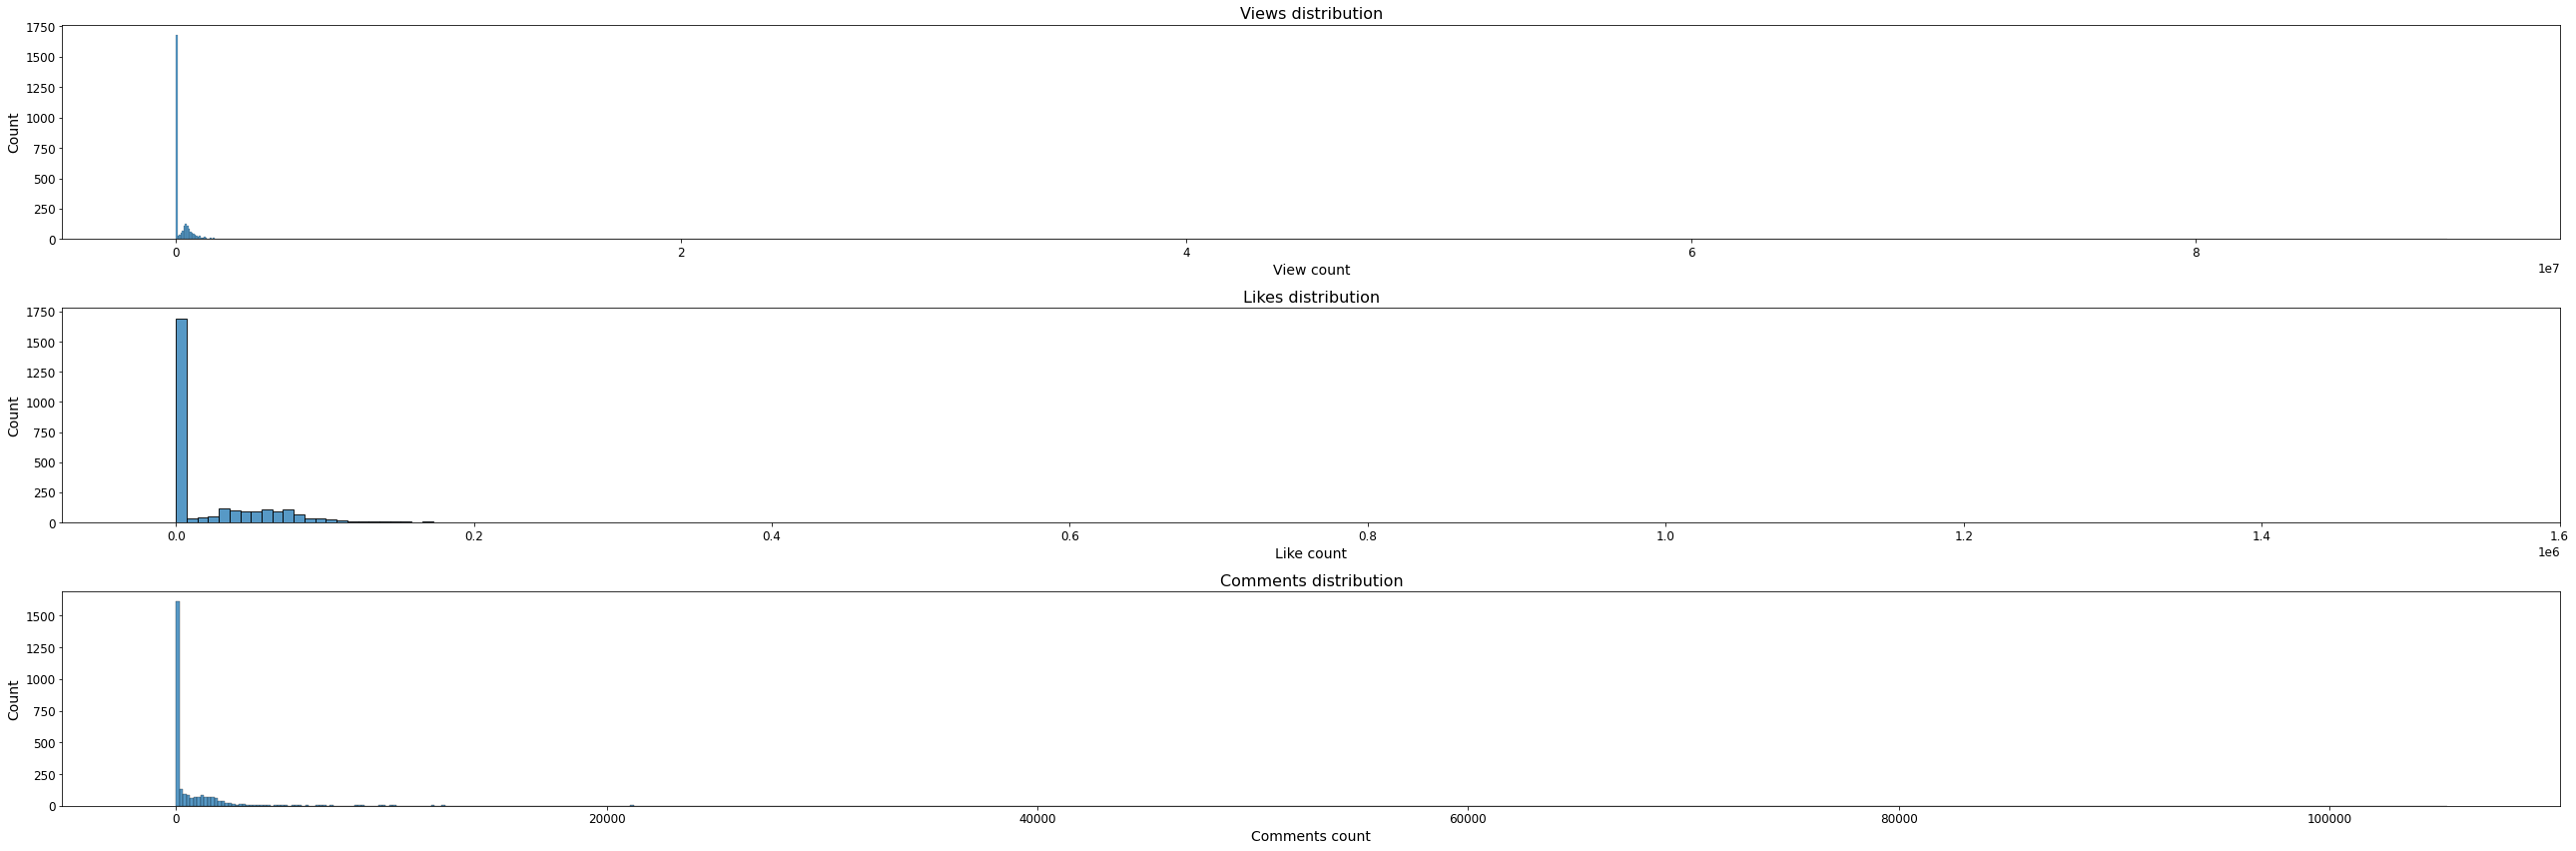

In [32]:
def histplot_views_likes_comments(df, channel_name="", bins="auto"):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(36,12))

    plt.subplot(311)
    sp1 = sns.histplot(data=df['view_count'], bins=bins)

    plt.subplot(312)
    sp2 = sns.histplot(data=df['like_count'], bins=bins)
    
    plt.subplot(313)
    sp3 = sns.histplot(data=df['comment_count'], bins=bins)
    
    if channel_name == "":
        sp1.set(xlabel="View count", title="Views distribution")
        sp2.set(xlabel="Like count", title="Likes distribution")
        sp3.set(xlabel="Comments count", title="Comments distribution")
    else:
        sp1.set(xlabel="View count", title=f"Views distribution of {channel_name}")
        sp2.set(xlabel="Like count", title=f"Likes distribution of {channel_name}")
        sp3.set(xlabel="Comments count", title=f"Comments distribution of {channel_name}")

    fig.tight_layout()

histplot_views_likes_comments(youtube_df)

It was already expected that plotting everything together would actually produce a poor chart. This is because some channels are way more watched than others, so we can try to divide videos in two groups:

*   many videos with a small amount of views, likes and comments, corresponding to the big spike around 0 on each chart
*   a smaller amount of videos with way more views, likes and comments, corresponding to what look like the normal distributions after the big spike 

I think that we can observe the behaviour of our data better if we analyze each channel individually (we will also do this).

More than that, <b>apparently it seems that there is a strong correlation between views and likes, and a not so big correlation between views and comments</b>. We will inspect this later on.




### 2.2.2) Log distribution

Now we will analyze the data after a log transformation. This will give us the distribution of the data on **scales of magnitude**, that is, for two bins next to each other **the bin on the right is one scale of magnitude larger than the left one**.

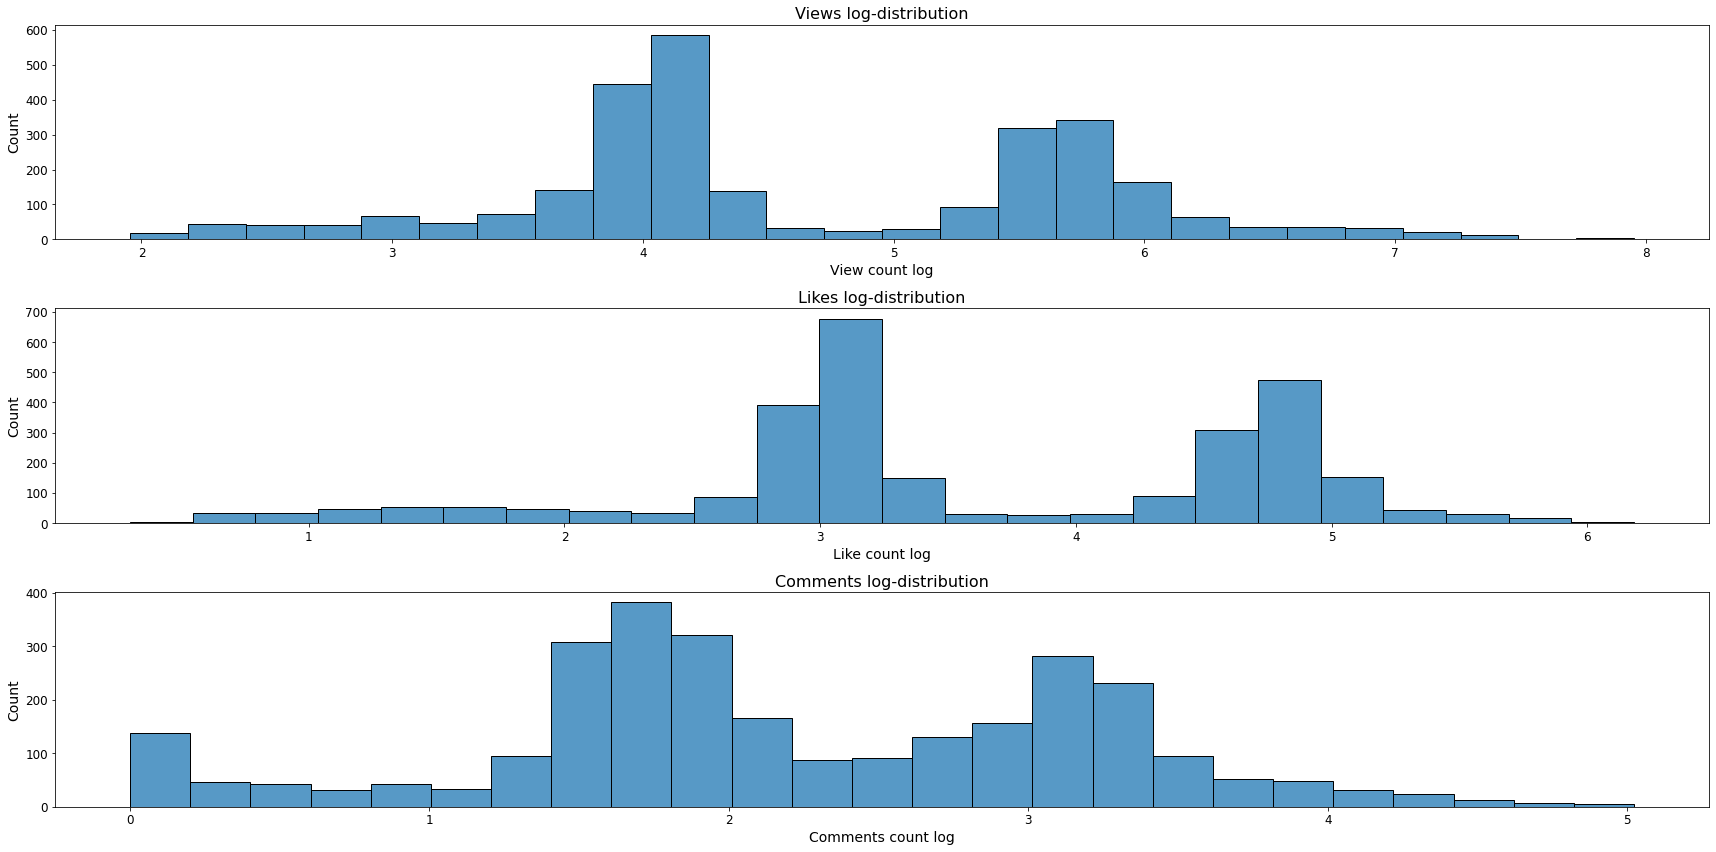

In [19]:
def log_histplot_views_likes_comments(df, channel_name=""):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(24,12))

    plt.subplot(311)
    sp1 = sns.histplot(data=np.log10(df['view_count']+1))

    plt.subplot(312)
    sp2 = sns.histplot(data=np.log10(df['like_count']+1))

    plt.subplot(313)
    sp3 = sns.histplot(data=np.log10(df['comment_count']+1))

    if channel_name == "":
        sp1.set(xlabel="View count log", title="Views log-distribution")
        sp2.set(xlabel="Like count log", title="Likes log-distribution")
        sp3.set(xlabel="Comments count log", title="Comments log-distribution")
    else:
        sp1.set(xlabel="View count log", title=f"Views log-distribution of {channel_name}")
        sp2.set(xlabel="Like count log", title=f"Likes log-distribution of {channel_name}")
        sp3.set(xlabel="Comments count log", title=f"Comments log-distribution of {channel_name}")

    fig.tight_layout()

log_histplot_views_likes_comments(youtube_df)

Wow! We can see the behaviour of our data way better now!

**Indeed, videos are divided in two groups.** It appears that we have two normal distributions next to each other on all 3 charts (they overlap). Also, the left distribution is taller (it contains more videos) than the right one.

This is interpreted as following: 

*  The left distribution corresponds to the group with many videos and a small amount of views, likes and comments. It has a mean of views log around 4 (10.000 views).
*  The right distribution corresponds to the group with not as many videos but with a large amount of views, likes and comments. It has a mean of views log around 5.8 (~630.000 views). 






### 2.2.3) What day and hour of the week videos were published?

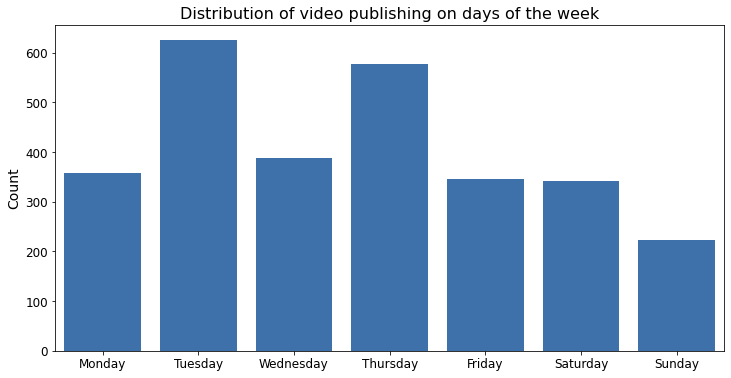

In [20]:
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def plot_week_days(df, channel_name=""):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    weekday = sns.countplot(x='upload_day_name', data=df, order=weekdays_order, palette=['#2c6fbb'])
    
    if channel_name=="":
        weekday.set(xlabel=None, ylabel="Count", title="Distribution of video publishing on days of the week")
    else:
        weekday.set(xlabel=None, ylabel="Count", title=f"Distribution of video publishing on days of the week of channel {channel_name}")

plot_week_days(youtube_df)

It's clear from the graph that most videos are posted on Tuesday and Thursday, while weekends are usually not utilized as much.

I've seen Youtubers saying that a lot of those videos are consumed around lunch time when people get a break from work OR after work.

Let's check if videos really are posted around these hours.

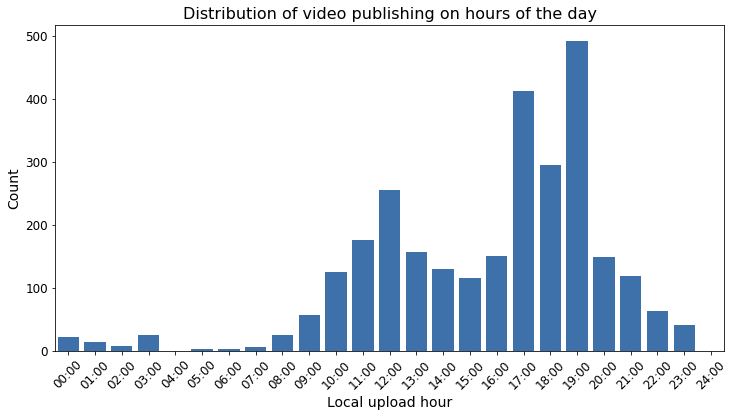

In [21]:
hours_order = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
               '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
               '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
               '21:00', '22:00', '23:00', '24:00']

def plot_hour_of_day(df, channel_name=""):

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    hour = sns.countplot(x='local_upload_hour', data=df, order=hours_order, palette=['#2c6fbb'])
    axes.tick_params(axis='x', labelrotation = 45)

    if channel_name=="":
        hour.set(xlabel="Local upload hour", ylabel="Count", title="Distribution of video publishing on hours of the day")
    else:
        hour.set(xlabel="Local upload hour", ylabel="Count", title=f"Distribution of video publishing on hours of the day of channel {channel_name}")

plot_hour_of_day(youtube_df)

The plot clearly confirms that videos are posted around lunch (between 10:00 and 13:00) or at night (between 17:00 and 19:00). Almost no videos are posted in the morning or late at night.

## 2.3) Numerical vs categorical
Is view count correlated with some categorical variables? How many videos each channel has?

### 2.3.1) Video count by channel

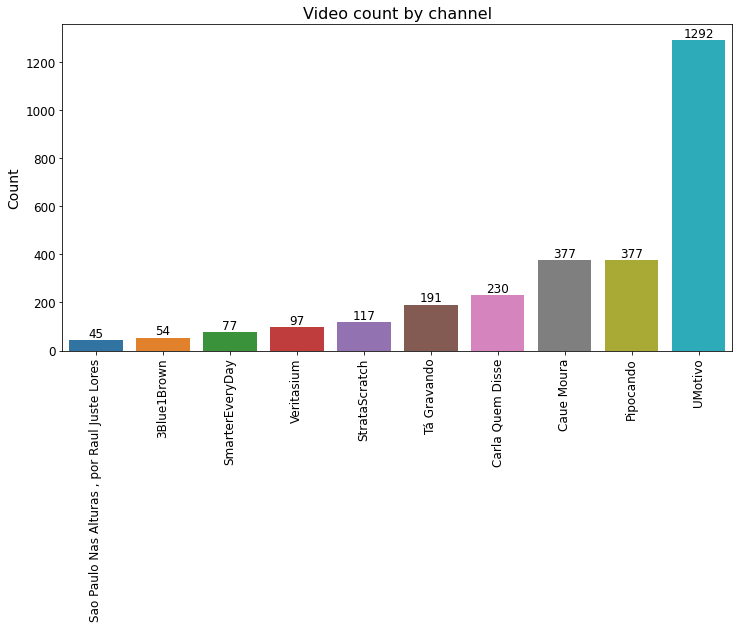

In [22]:
def plot_video_count_channel_title(df, channel_name=""):
    grouped = df.groupby('channel_title')
    video_count_order = pd.DataFrame({col: vals['video_id'] for col, vals in grouped}).count().sort_values(ascending=True)

    f, ax = plt.subplots(figsize=(12, 6))
    countplot = sns.countplot(x='channel_title', data=df, order=video_count_order.index)
    plt.xticks(rotation=90)
    countplot.bar_label(countplot.containers[0])
    countplot.set(xlabel=None, ylabel="Count", title="Video count by channel")


plot_video_count_channel_title(youtube_df)

The first thing we need to consider is that UMotivo has so many videos that it can (and probably will) insert some bias on all analysis and machine learning models. We need to account for that. This is why we will analyze each channel individually further ahead.

### 2.3.1) View count by channel
Ordered by view count.

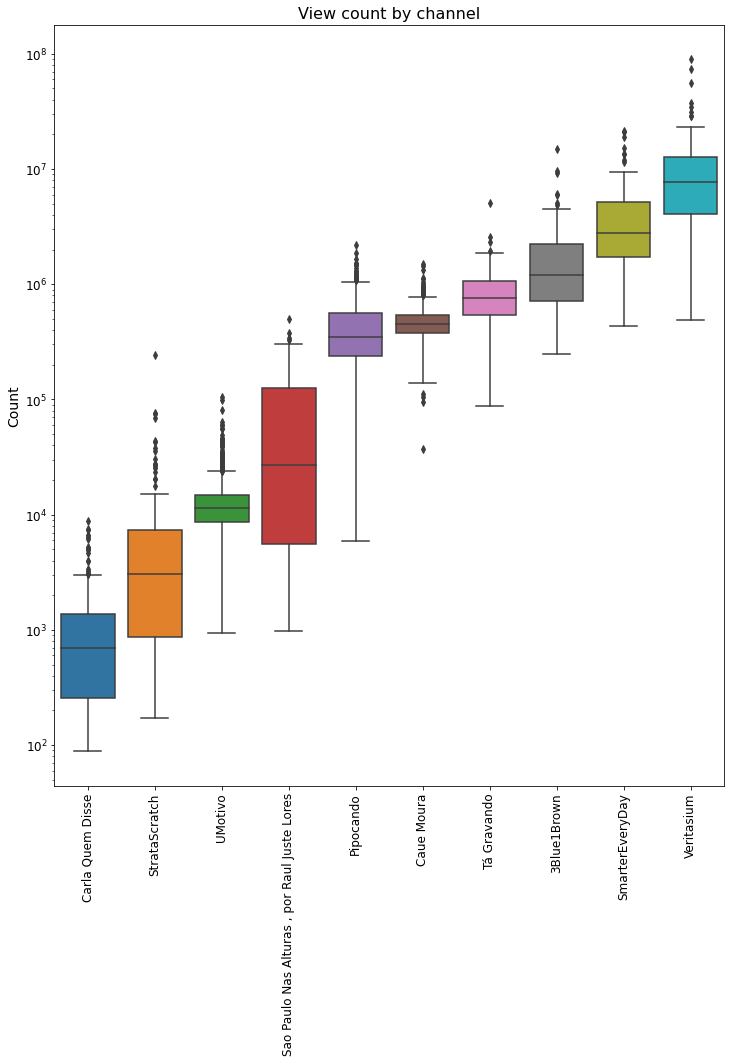

In [23]:
def plot_view_count_channel_title(df, channel_name=""):
    grouped = df.groupby('channel_title')
    channel_median_order = pd.DataFrame({col: vals['view_count'] for col, vals in grouped}).median().sort_values(ascending=True)

    f, ax = plt.subplots(figsize=(12, 14))
    boxplot = sns.boxplot(data=df, x='channel_title', y='view_count', order=channel_median_order.index)
    ax.set(yscale="log")
    plt.xticks(rotation=90)

    boxplot.set(xlabel=None, ylabel="Count", title="View count by channel")


plot_view_count_channel_title(youtube_df)

All three US channels have higher view count than the BR channels. It's something expected, because the channel list contain only big US channel and doesn't contain big BR channel (like "Porta dos Fundos" for example). Also, we can see the division of channels here as well.


1.   Channels "Carla Quem Disse" to "Sao Paulo nas Alturas, por Raul Juste Lores" with a median of views around 10^4, and
2.   Channels "Pipocando" to "Veritasium", all have more than 10^5 median of views on its videos.




### 2.3.2) View count by day of the week a video was published

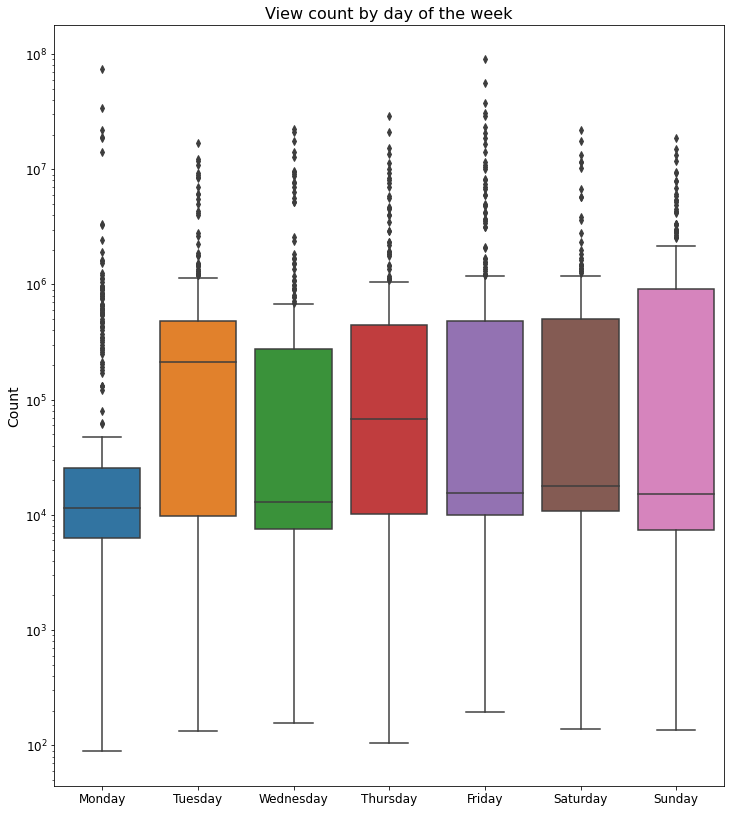

In [24]:
def plot_view_count_day_name(df, channel_name=""):
    f, ax = plt.subplots(figsize=(12, 14))
    boxplot = sns.boxplot(data=df, x='upload_day_name', y='view_count', order=weekdays_order)
    ax.set(yscale="log")

    if channel_name=="":
        boxplot.set(xlabel=None, ylabel="Count", title="View count by day of the week")
    else:
        boxplot.set(xlabel=None, ylabel="Count", title=f"View count by day of the week of channel {channel_name}")

plot_view_count_day_name(youtube_df)

Videos appear to have more views when published on Tuesday and Thursday. But it's important to notice that since we have diverse channels on our dataset, it would be better to analyze this plot by individual channel. Why? Some channels probably focus publishing on specific days, so we can't have an "overall" rule here.

For example, if Veritasium publishes all videos on Thursday, we don't know if publishing on Thursday gives a higher view count or it's simply because a huge channel publishes on Thursday and pushes view count up.

If the dataset included tens of thousands of videos from hundredes of channels than maybe we could extract something regardless of the channel it was published on. 

### 2.3.3) View count by hour of the day a video was published

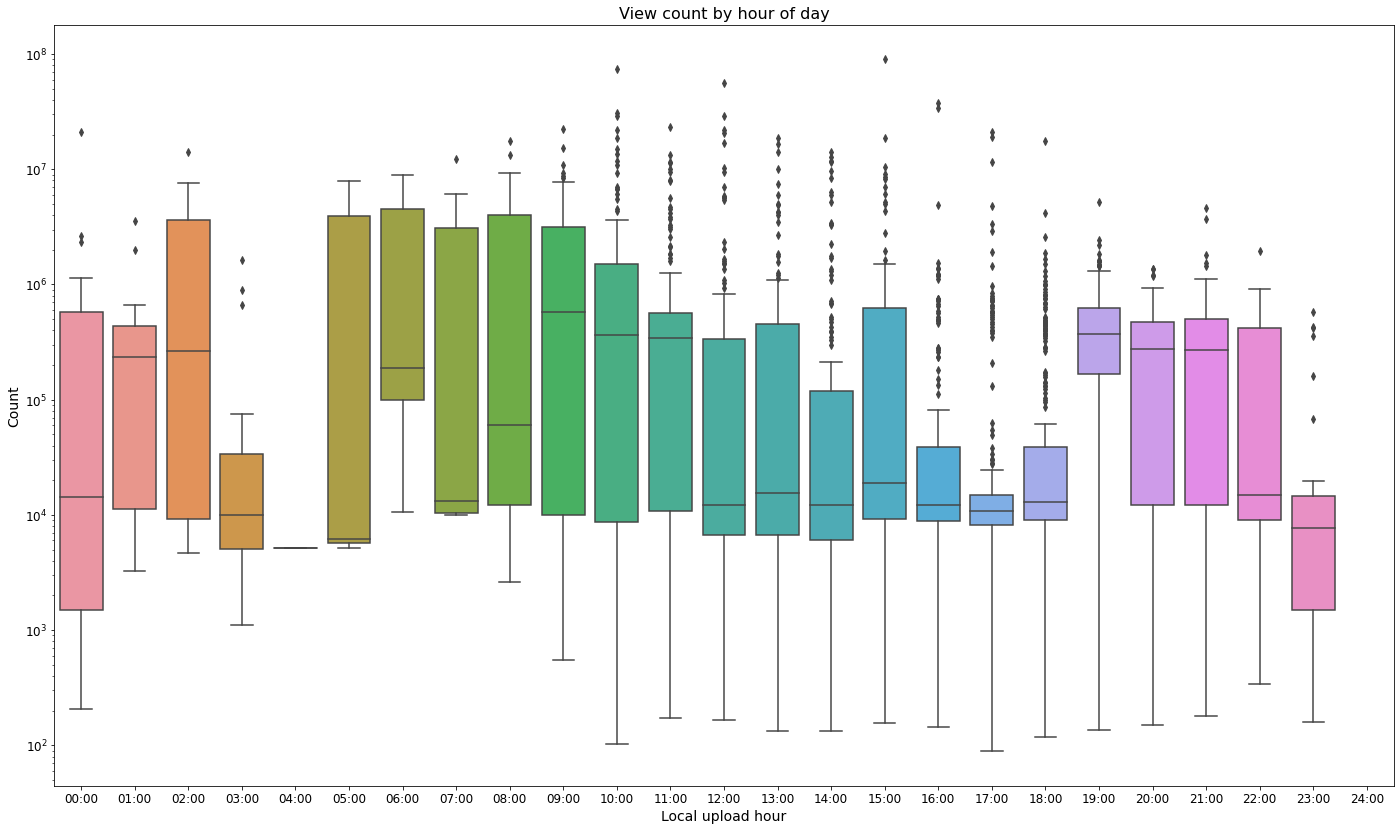

In [25]:
def plot_view_count_hour(df, channel_name=""):
    f, ax = plt.subplots(figsize=(24, 14))
    boxplot = sns.boxplot(data=df, x='local_upload_hour', y='view_count', order=hours_order)
    ax.set(yscale="log")

    if channel_name=="":
        boxplot.set(xlabel="Local upload hour", ylabel="Count", title="View count by hour of day")
    else:
        boxplot.set(xlabel="Local upload hour", ylabel="Count", title=f"View count by hour of day of channel {channel_name}")

plot_view_count_hour(youtube_df)

Videos published between 09:00 and 11:00 or between 19:00 and 21:00 have a higher view count median. But the same observation from before can be made here. We will analyze this plot only by individual channel.

## 2.4) Visualizing correlations

As we said, it's expected that the correlation between views and likes is high, while the correlation between views and comments is not as high. Let's plot the correlation matrix to check this.

In [26]:
youtube_df[num].corr()

,view_count,like_count,comment_count,n_words_title,n_question_marks_title,n_exclamation_marks_title,n_ellipsis_title,thumb_red,thumb_green,thumb_blue,video_duration,subscriber_count,video_count,total_view_count
view_count,1.000000,0.833566,0.738114,-0.016135,0.050259,-0.138388,-0.018792,0.013418,0.043249,0.065655,-0.058764,0.500285,-0.222937,0.493788
like_count,0.833566,1.000000,0.797464,-0.126283,0.048105,-0.226457,-0.026267,0.136969,0.139272,0.139853,-0.152035,0.716396,-0.361607,0.719408
comment_count,0.738114,0.797464,1.000000,-0.030117,0.059688,-0.185892,-0.018180,0.036616,0.066996,0.091795,-0.078500,0.586690,-0.264619,0.581382
n_words_title,-0.016135,-0.126283,-0.030117,1.000000,0.040114,0.224748,-0.031170,0.005840,0.087880,0.111180,0.138599,-0.202195,0.197707,-0.247265
n_question_marks_title,0.050259,0.048105,0.059688,0.040114,1.000000,-0.177002,0.014071,0.037662,0.051534,0.069369,-0.057048,0.078203,0.003341,0.060485
n_exclamation_marks_title,-0.138388,-0.226457,-0.185892,0.224748,-0.177002,1.000000,-0.038147,0.130930,0.096099,0.067910,0.243370,-0.291243,0.633258,-0.252106
n_ellipsis_title,-0.018792,-0.026267,-0.018180,-0.031170,0.014071,-0.038147,1.000000,-0.014978,-0.012004,-0.004444,0.058084,-0.034200,0.076440,-0.034550
thumb_red,0.013418,0.136969,0.036616,0.005840,0.037662,0.130930,-0.014978,1.000000,0.837779,0.666159,-0.055371,0.257286,0.075808,0.305875
thumb_green,0.043249,0.139272,0.066996,0.087880,0.051534,0.096099,-0.012004,0.837779,1.000000,0.877906,-0.020776,0.202704,0.070952,0.237917
thumb_blue,0.065655,0.139853,0.091795,0.111180,0.069369,0.067910,-0.004444,0.666159,0.877906,1.000000,-0.014010,0.173623,0.092767,0.204231


Indeed, there's a stronger correlation between view_count and like_count, and a slightly less strong correlation between view_count and comment_count.

But it would be better to visualize this correlation using a heatmap, so let's do this:

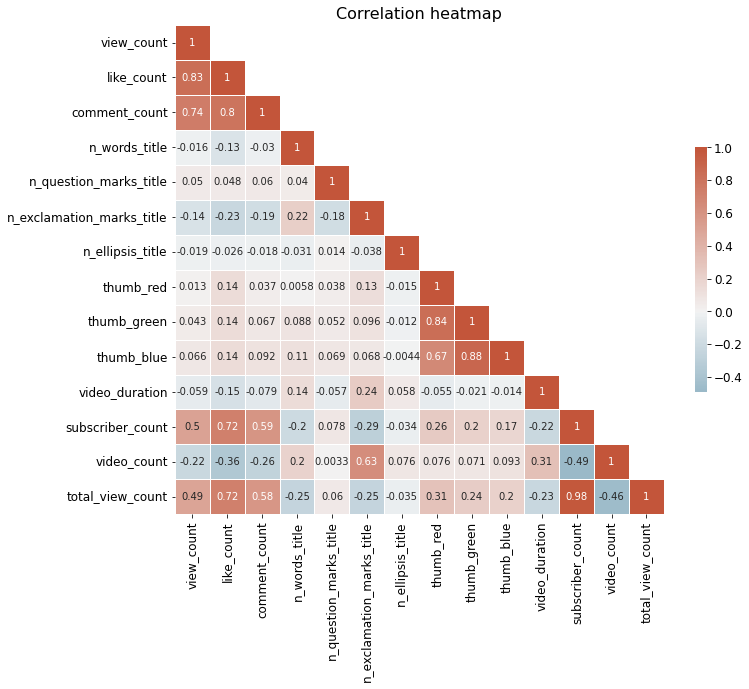

In [27]:
def plot_corr_heatmap(df, channel_name=""):
    #  adapted from official Seaborn website: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Drop NaN values on columns and rows. NaN will appear if a given variable doesn't vary (check correlation formula to convince yourself)
    df_corr = df.corr().dropna(axis=1, how='all').dropna(how='all')

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df_corr, dtype=bool),1)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=1., center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":10})
    
    if channel_name=="":
        ax.set_title("Correlation heatmap")
    else:
        ax.set_title(f"Correlation heatmap of channel {channel_name}")
    
plot_corr_heatmap(youtube_df)


**View count**

View count is not correlated with the number of words, number of question marks or ellipses in a title. But it is **slightly negatively correlated with the number of exclamation marks in a title (more exclamation marks, less views)**. It's also **not correlated with the main color in a thumbnail.**

It's obviously positively correlated with the number of subscribers in the channel (more subscribers, more views).

And it's slightly negatively correlated with the number of videos in the channel, that is, more videos equals less views per video. I think that this is happening because of the channel UMotivo, since it has a lot of videos, but actually has few views per video (around 10.000).

**Others**

There are some obvious strong positive correlations (for example subscriber count and total view count of the channel), but other's are interesting to analyze.

Total view count and comment count have a positive correlation of 0.58. It means that channels with lots of views tend to have more comments on its videos. This is a positive result for Youtube creators, because it means that getting more views tends to increase user interaction.

Video count (the amout of videos a channel has published) is positively correlated with the number of exclamation marks on titles. Since video count is a feature that is constant for each channel, this can be analyzed as -> channels that publishes more tend to use more exclamation marks on video titles. That's precisely the case for the channel "UMotivo" for example.

# **3) Exploratory Data Analysis by channel**
As I said, most analyzes would make more sense if made individually by channel.

## 3.1) Visualizing distributions

### Are view counts, like counts and comment counts normally distributed per channel?

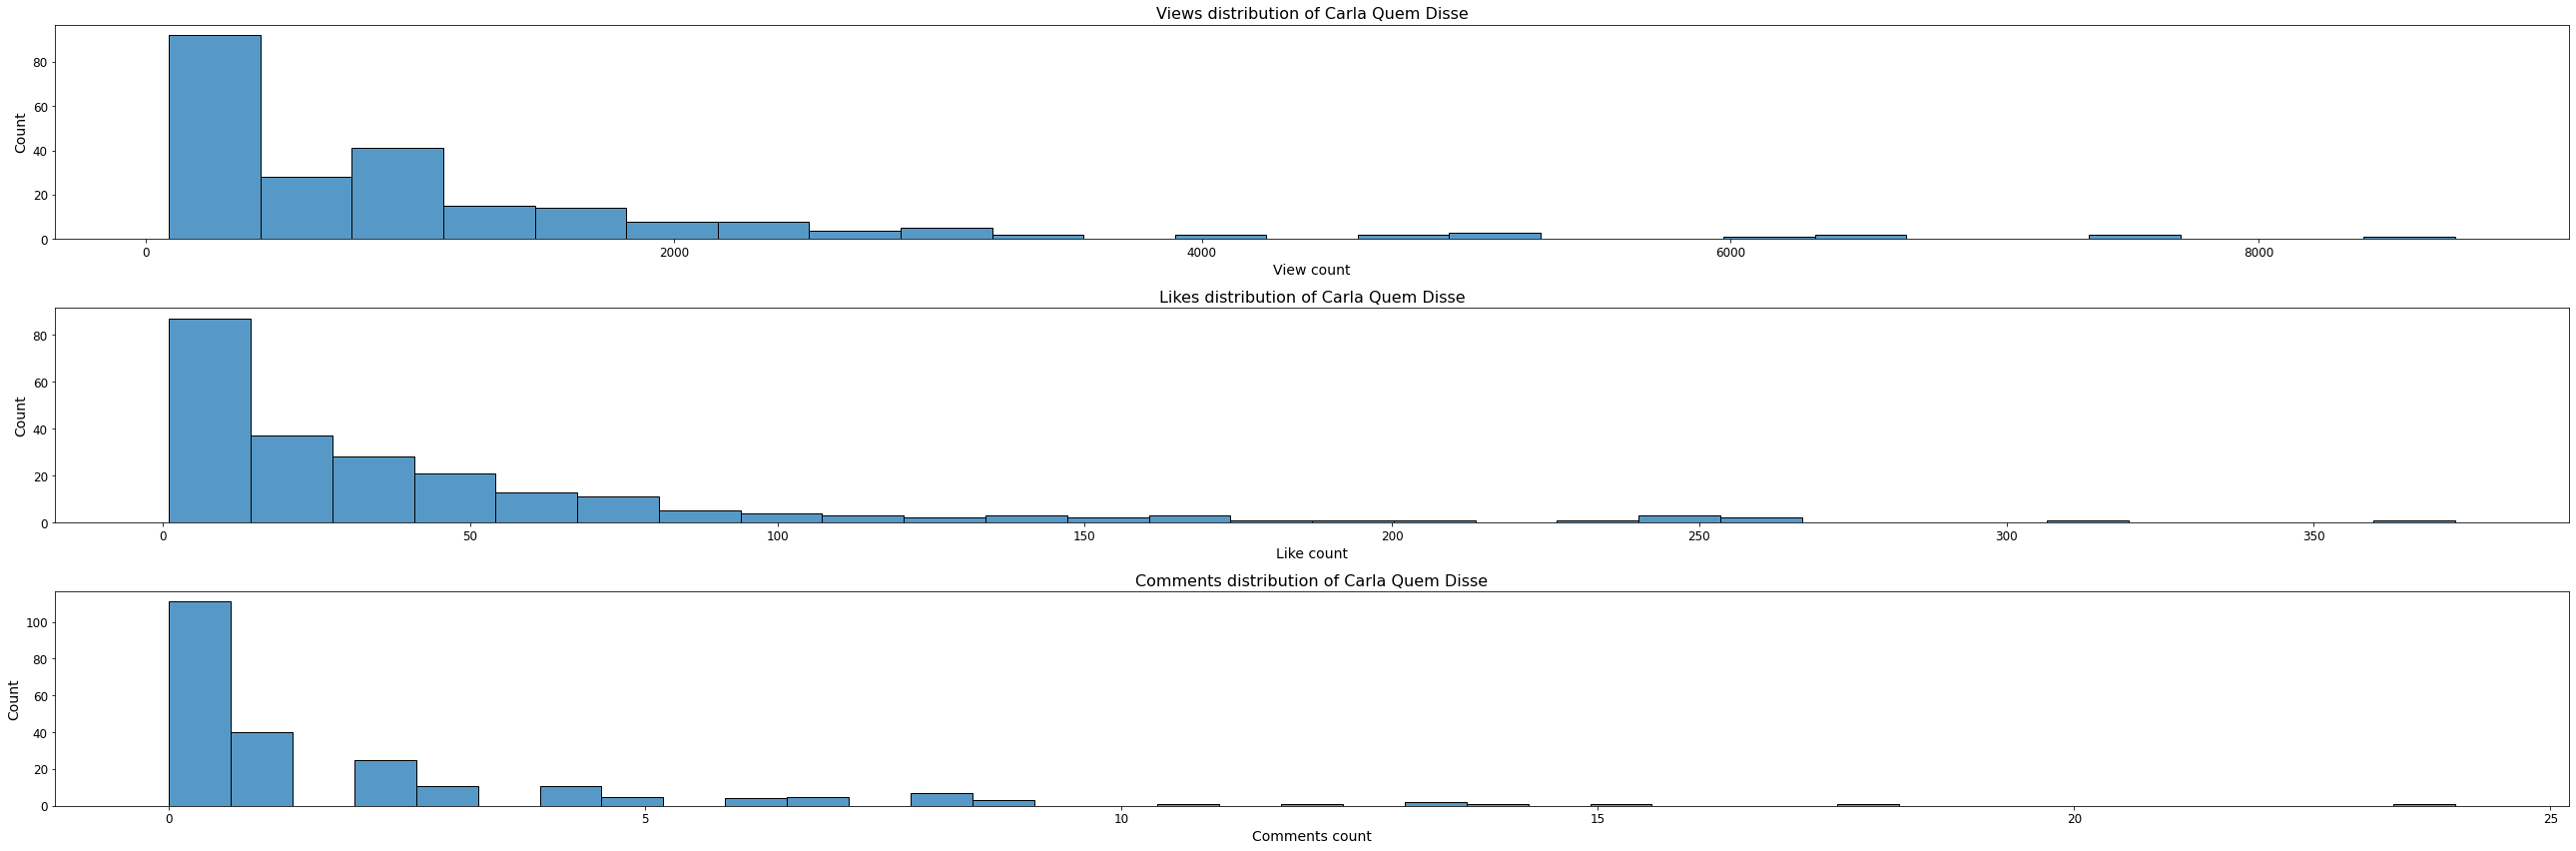

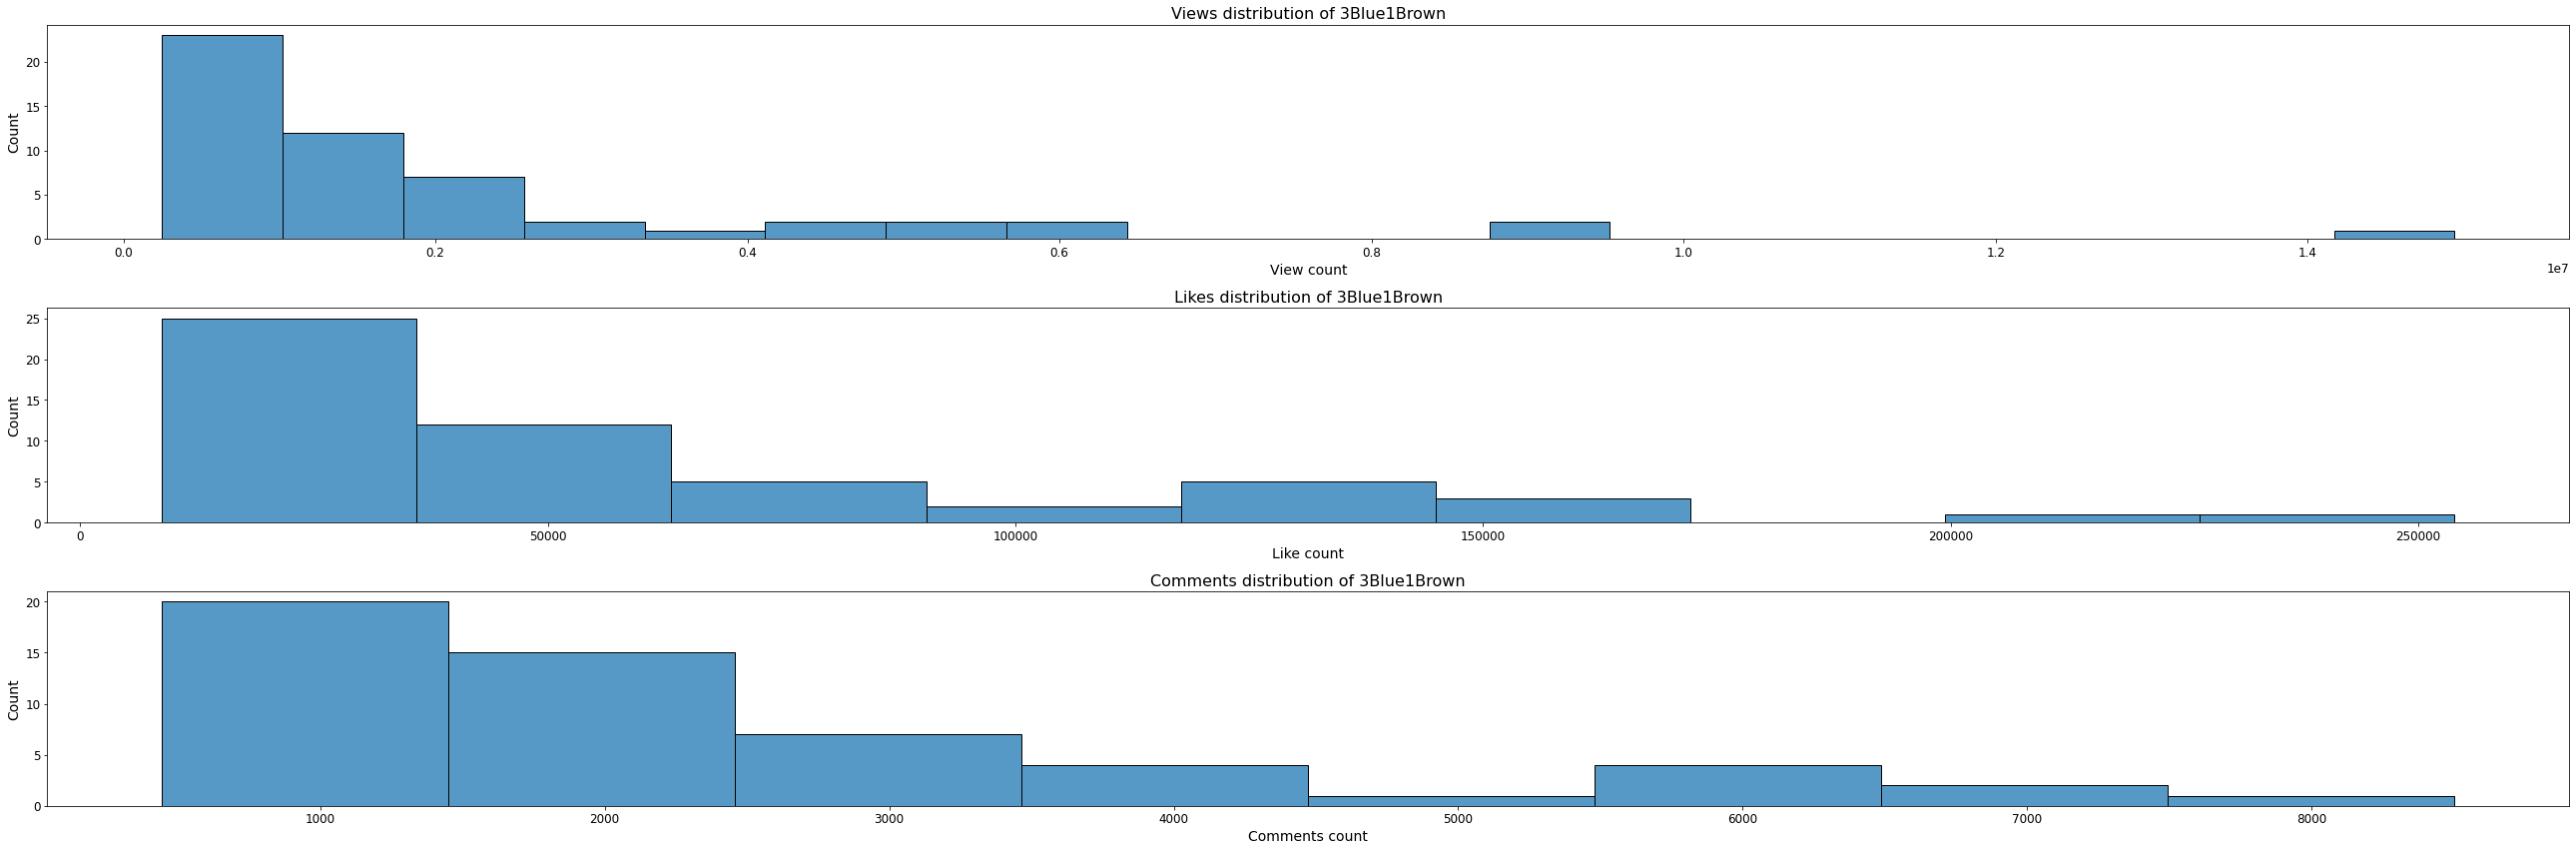

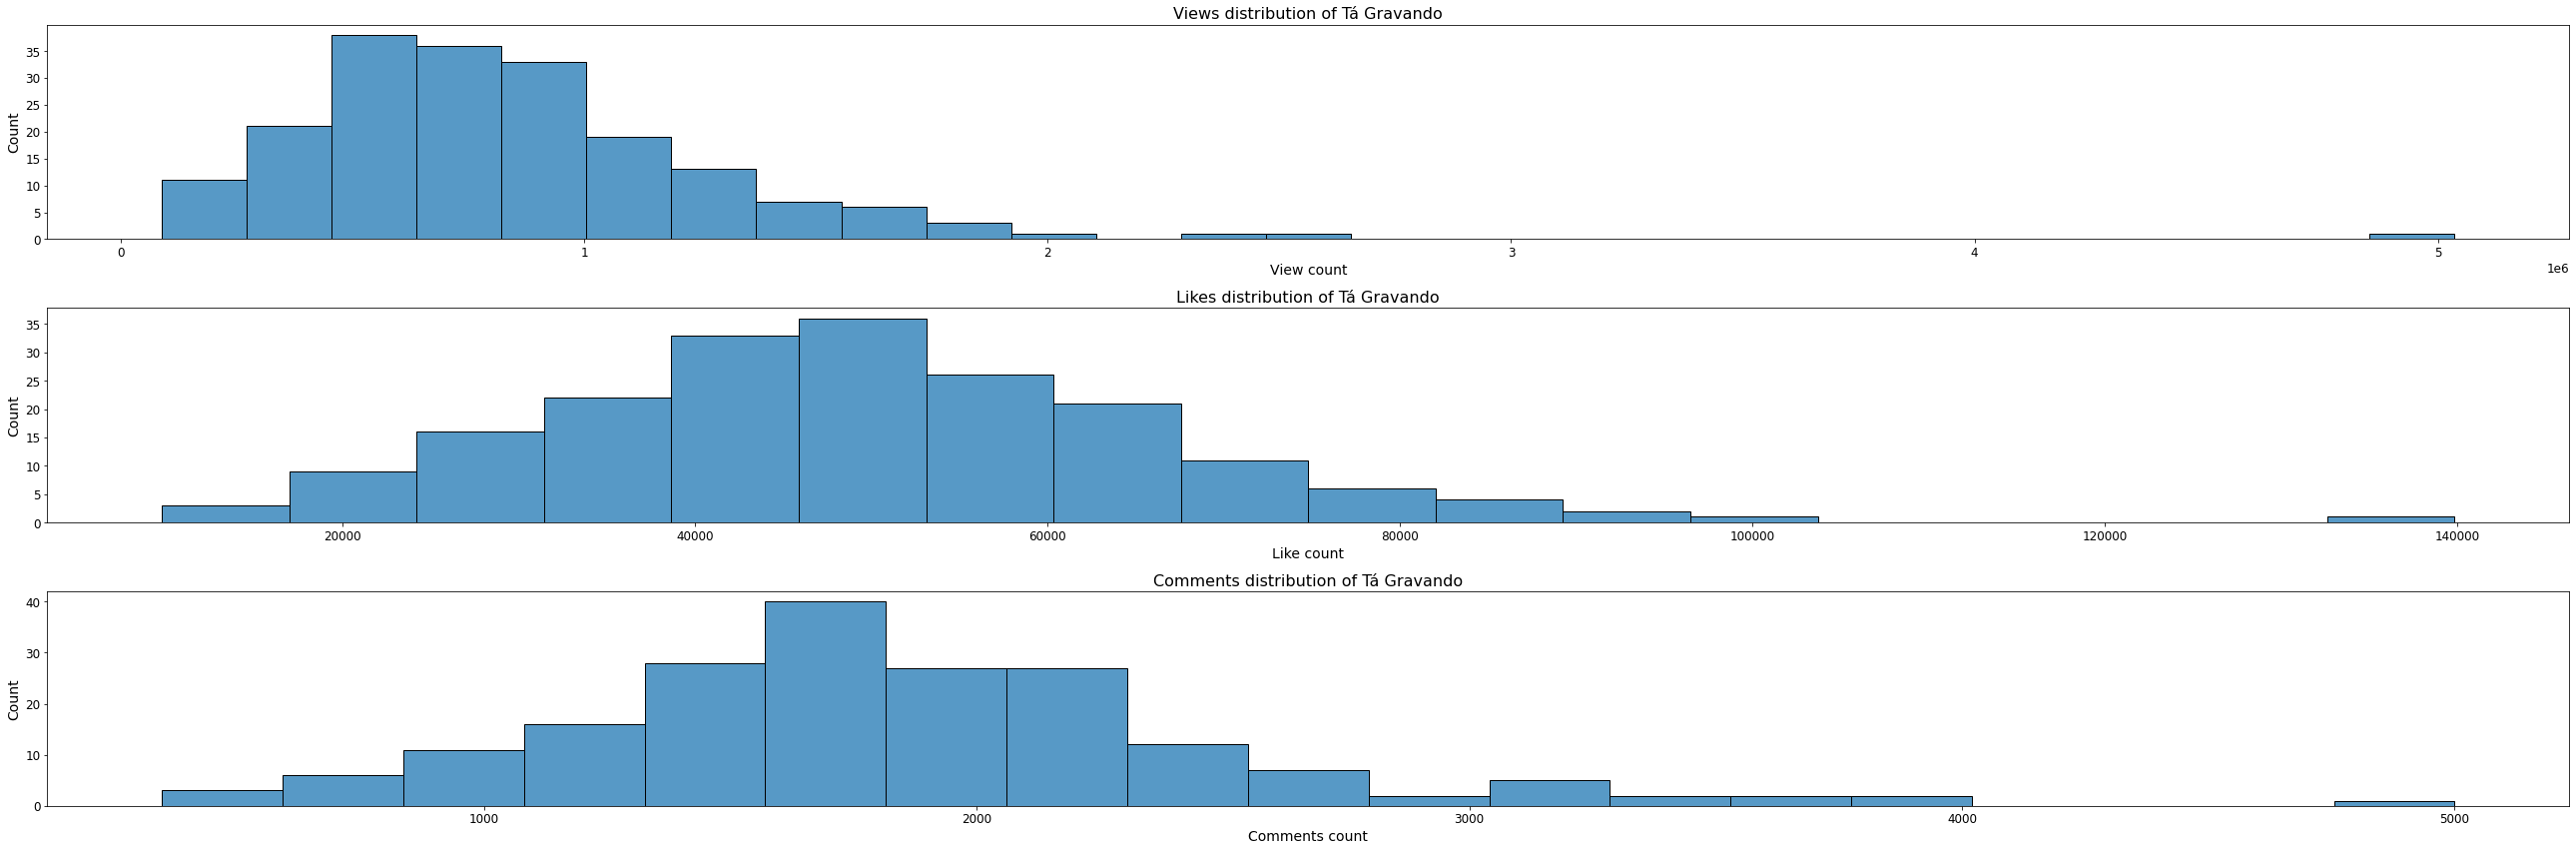

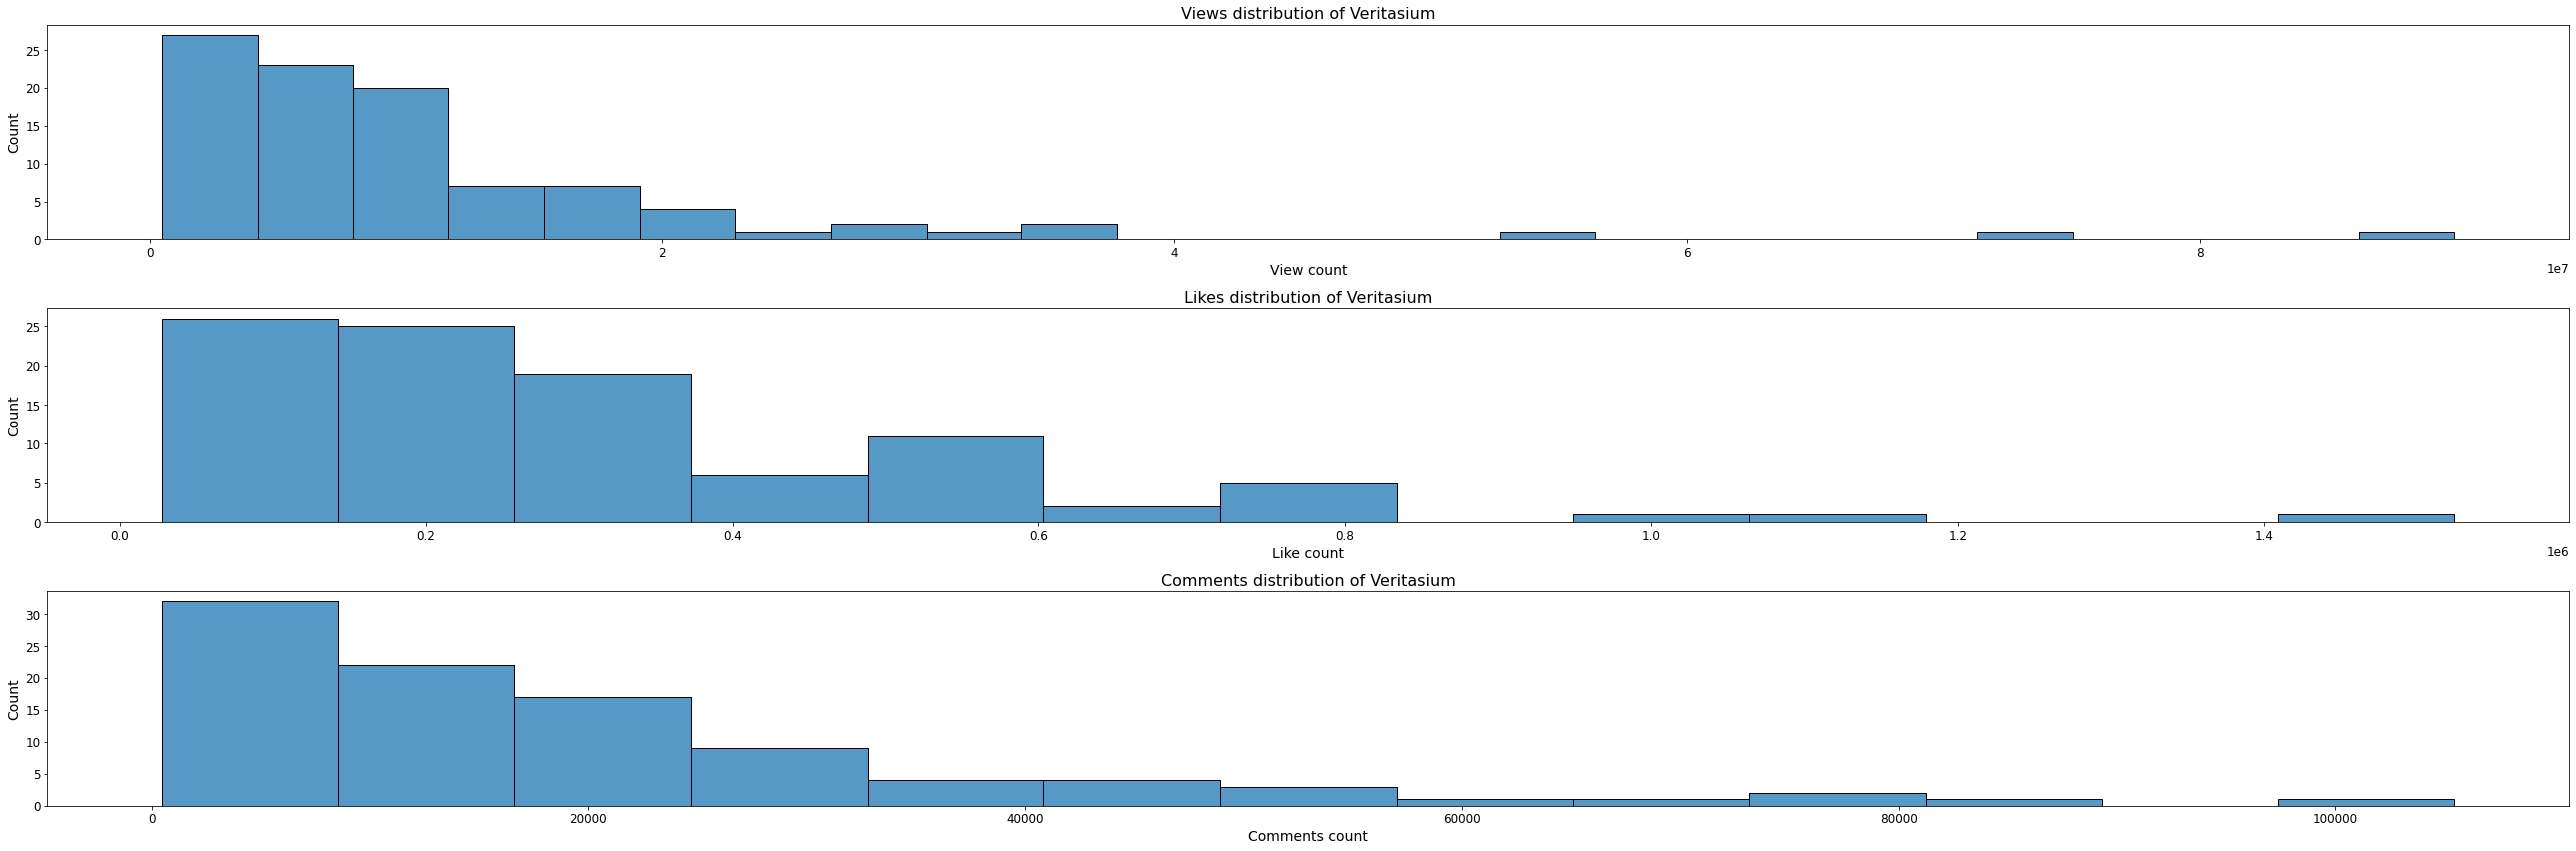

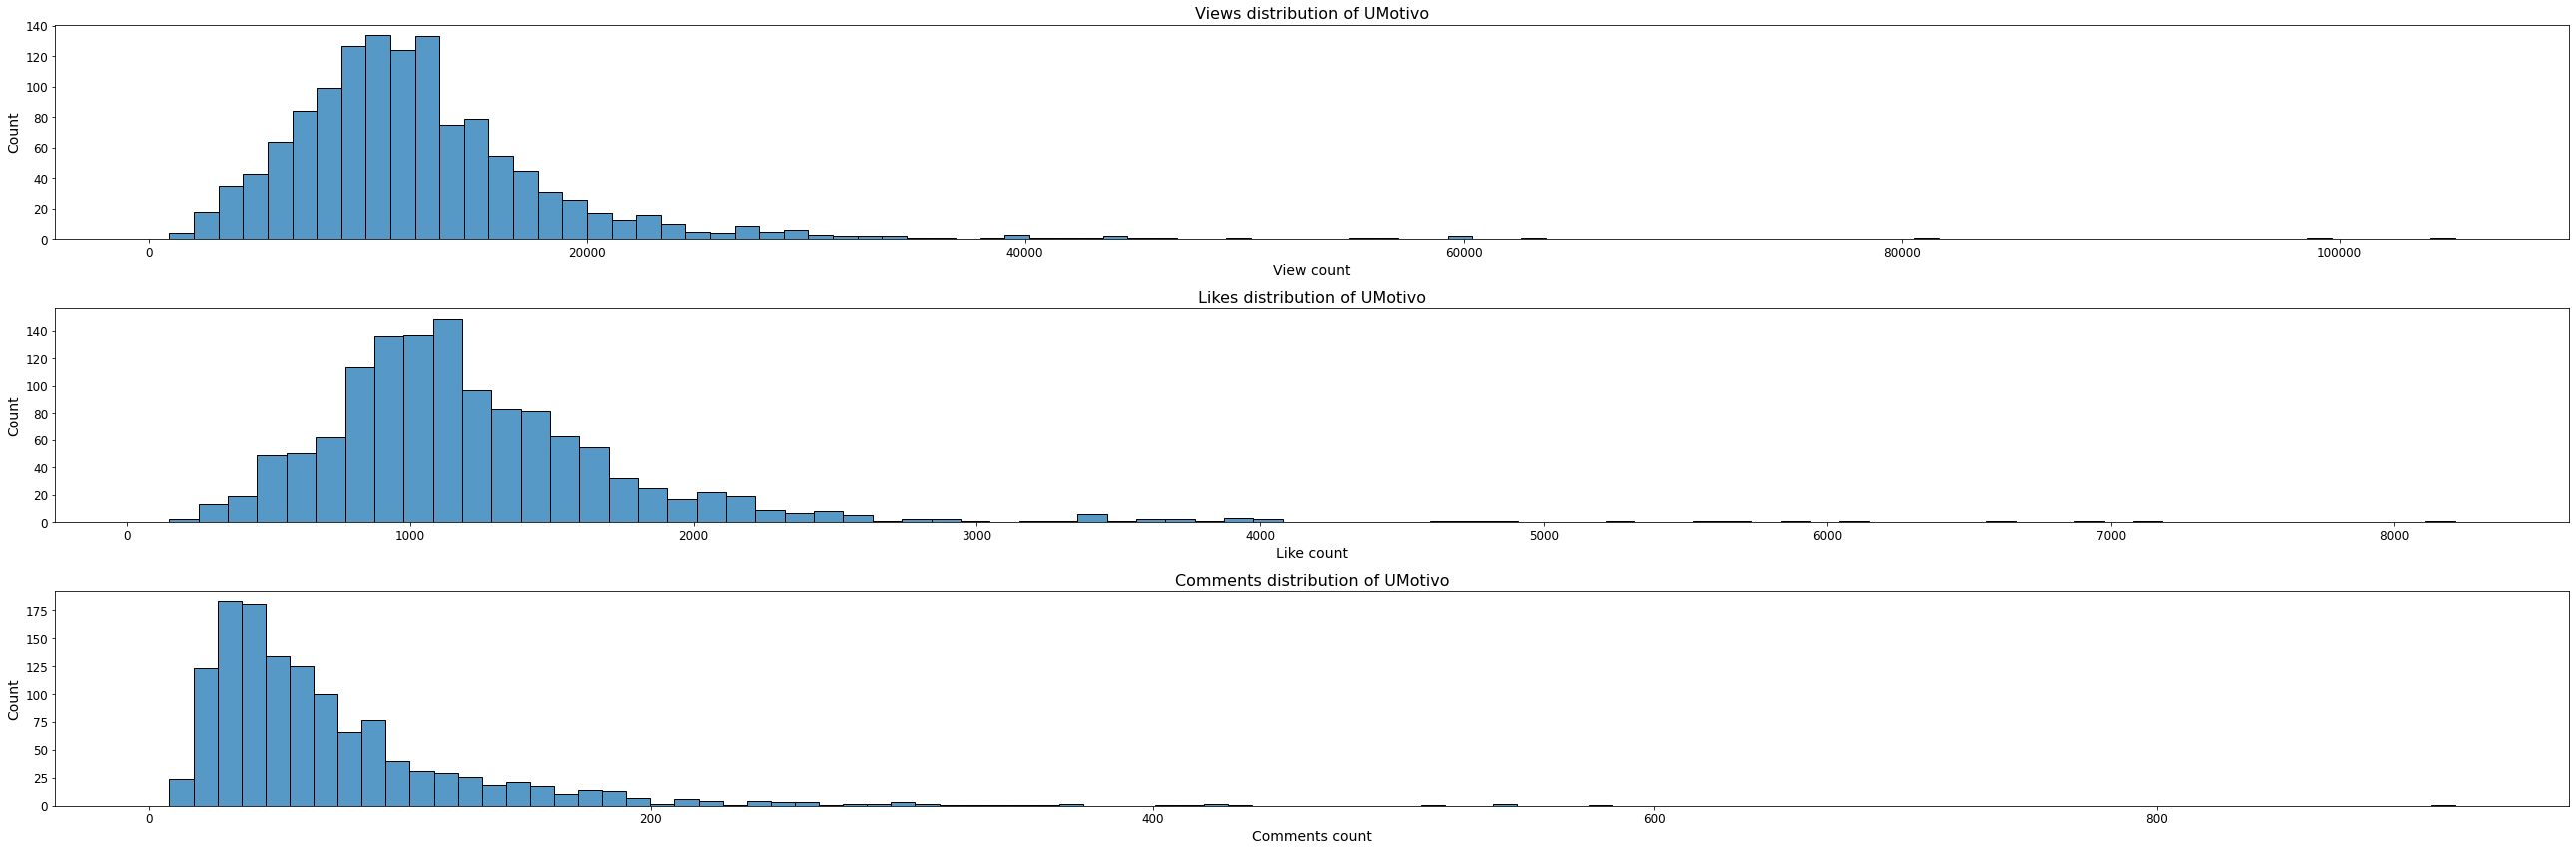

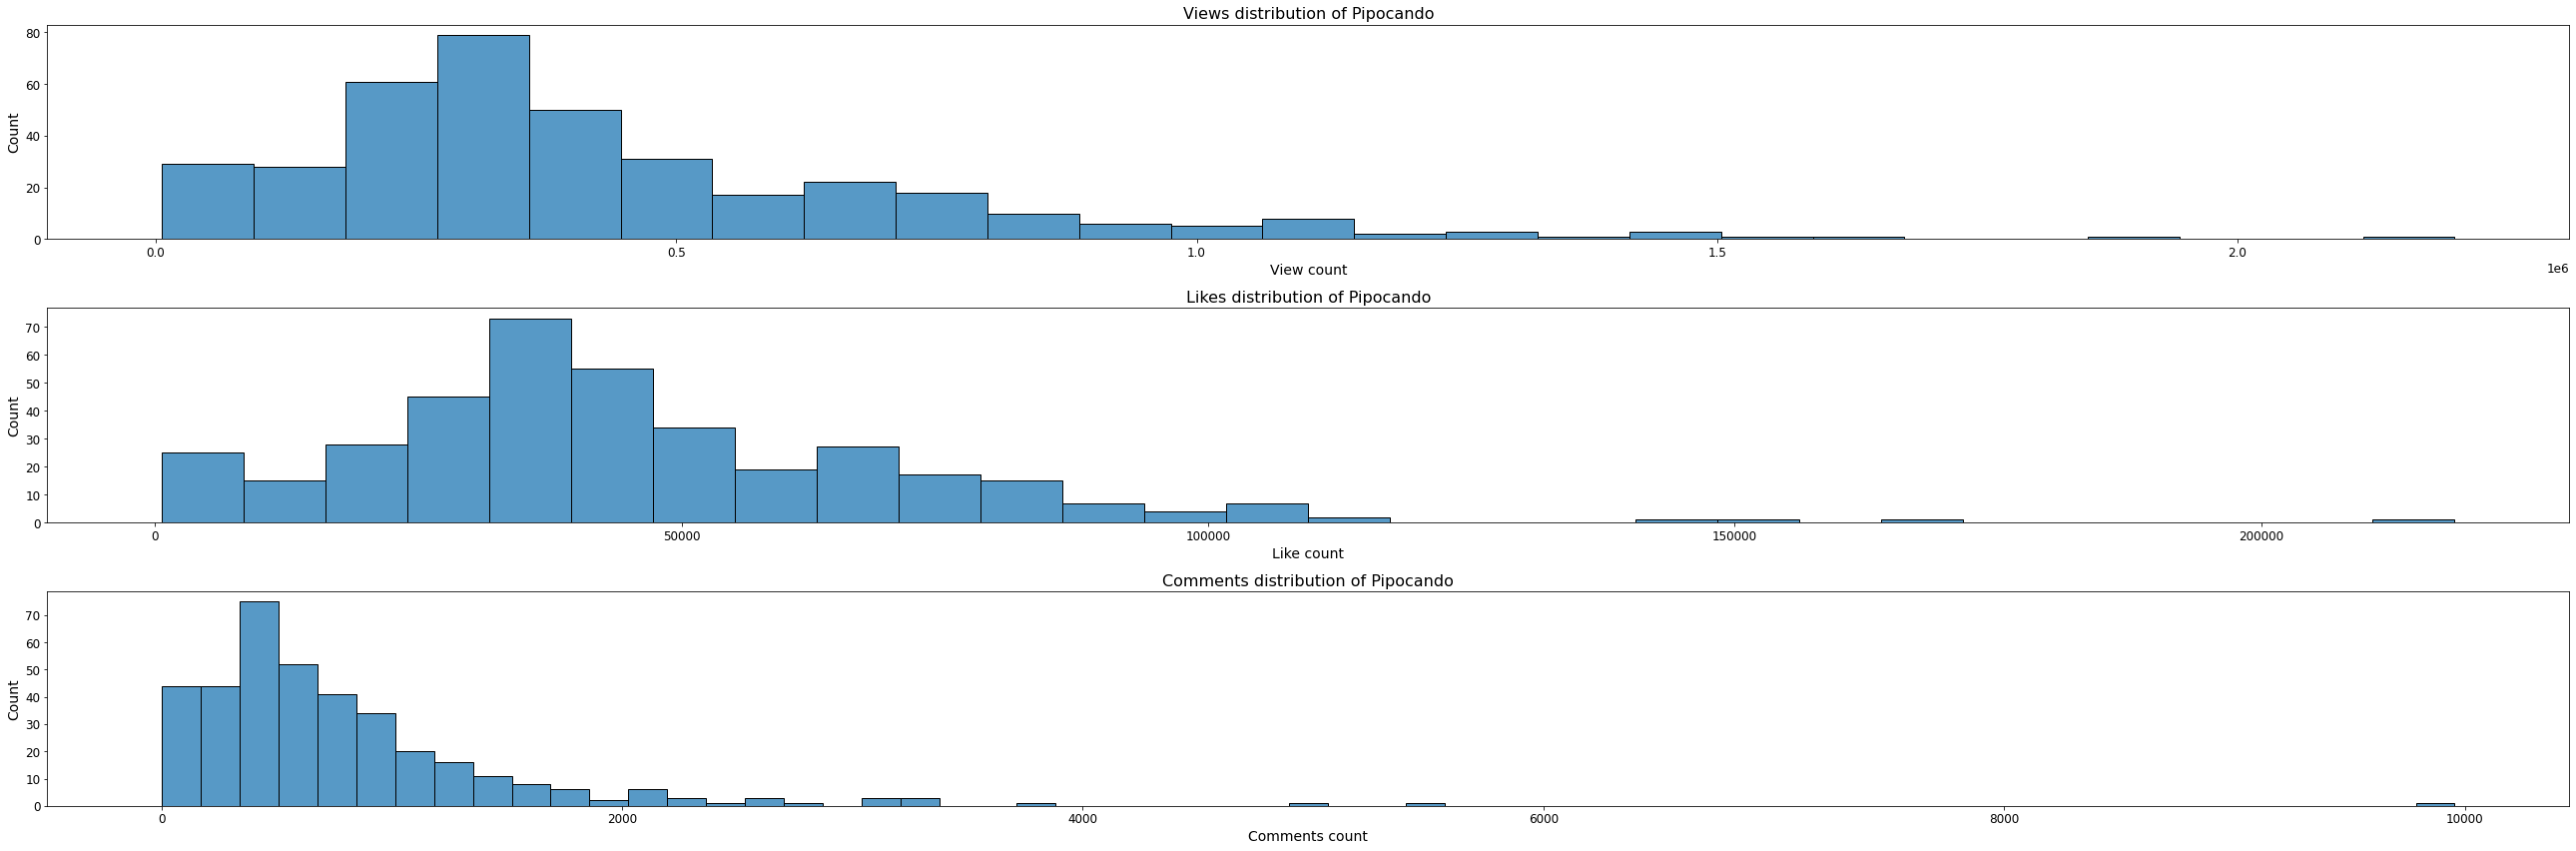

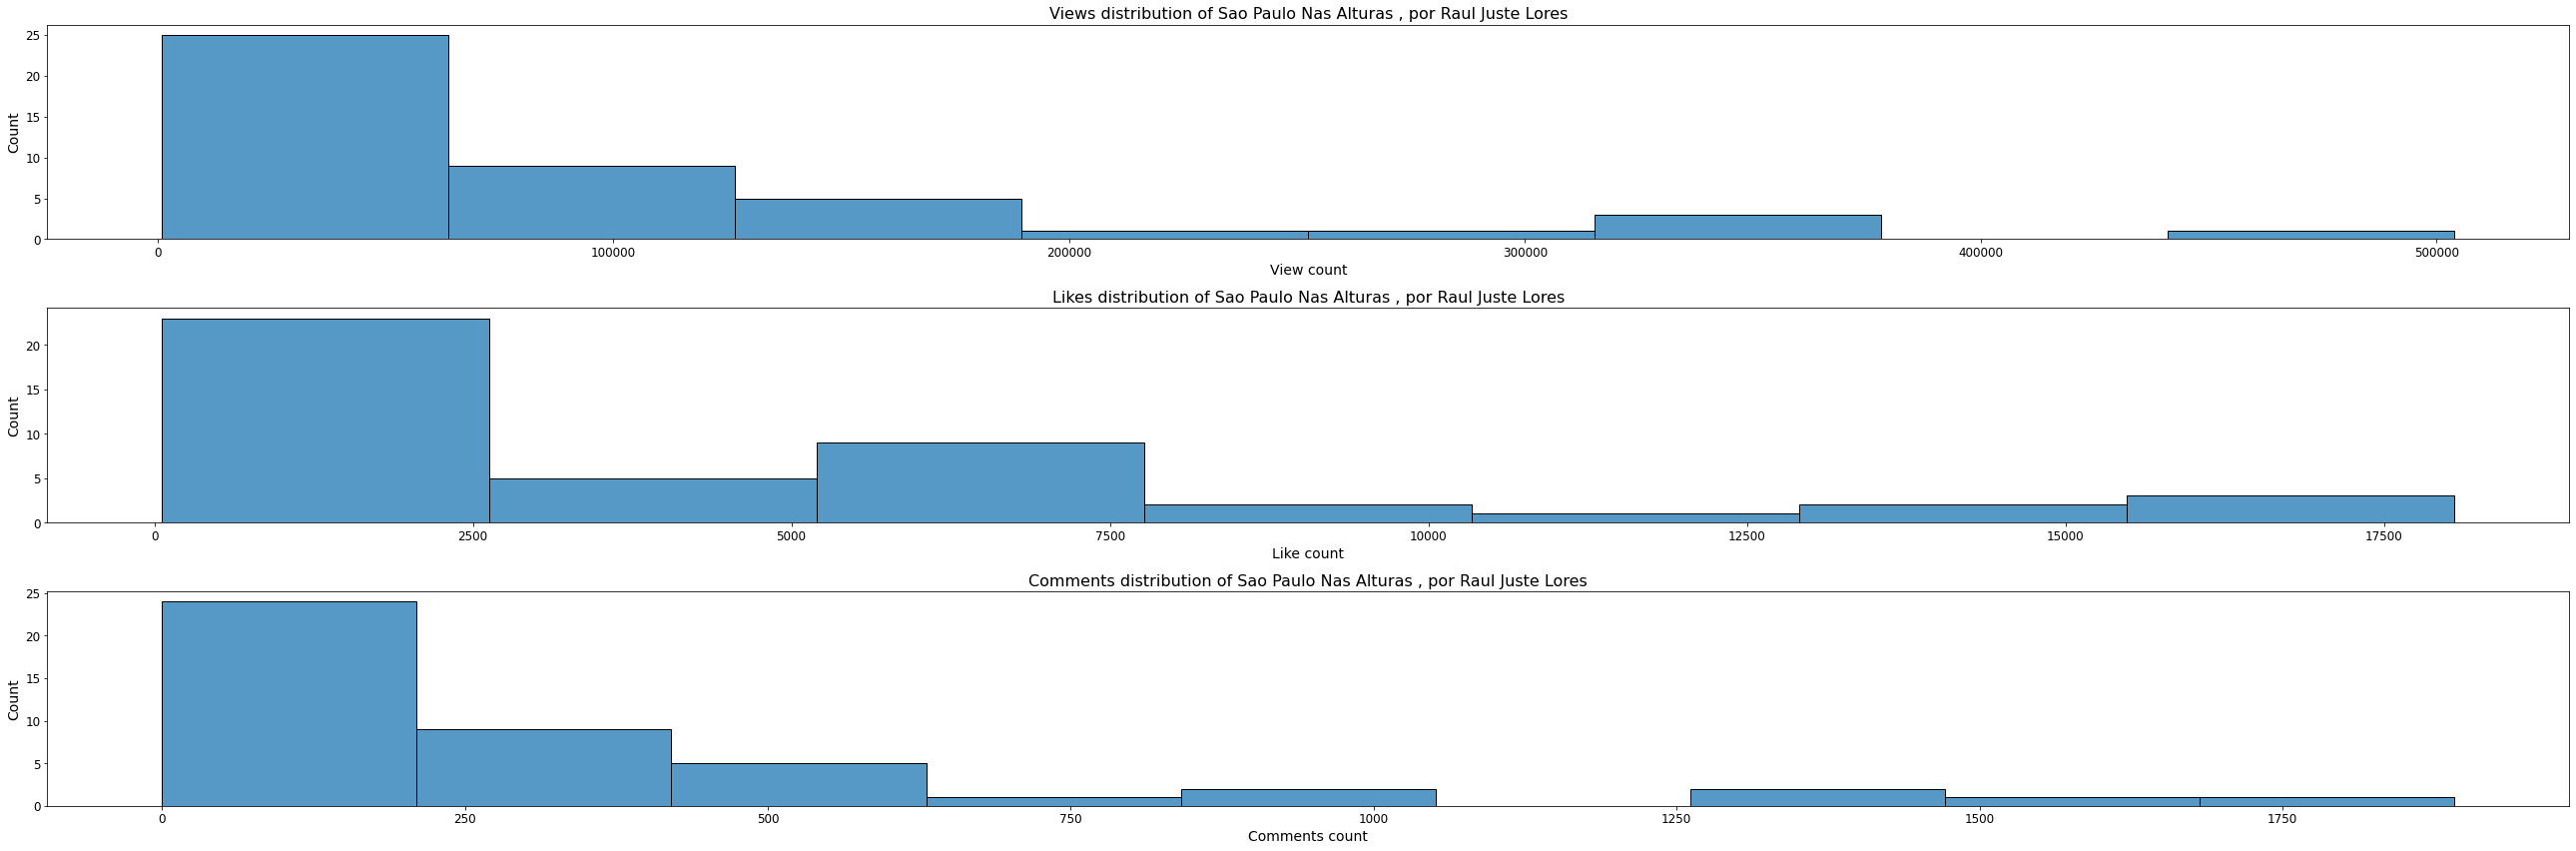

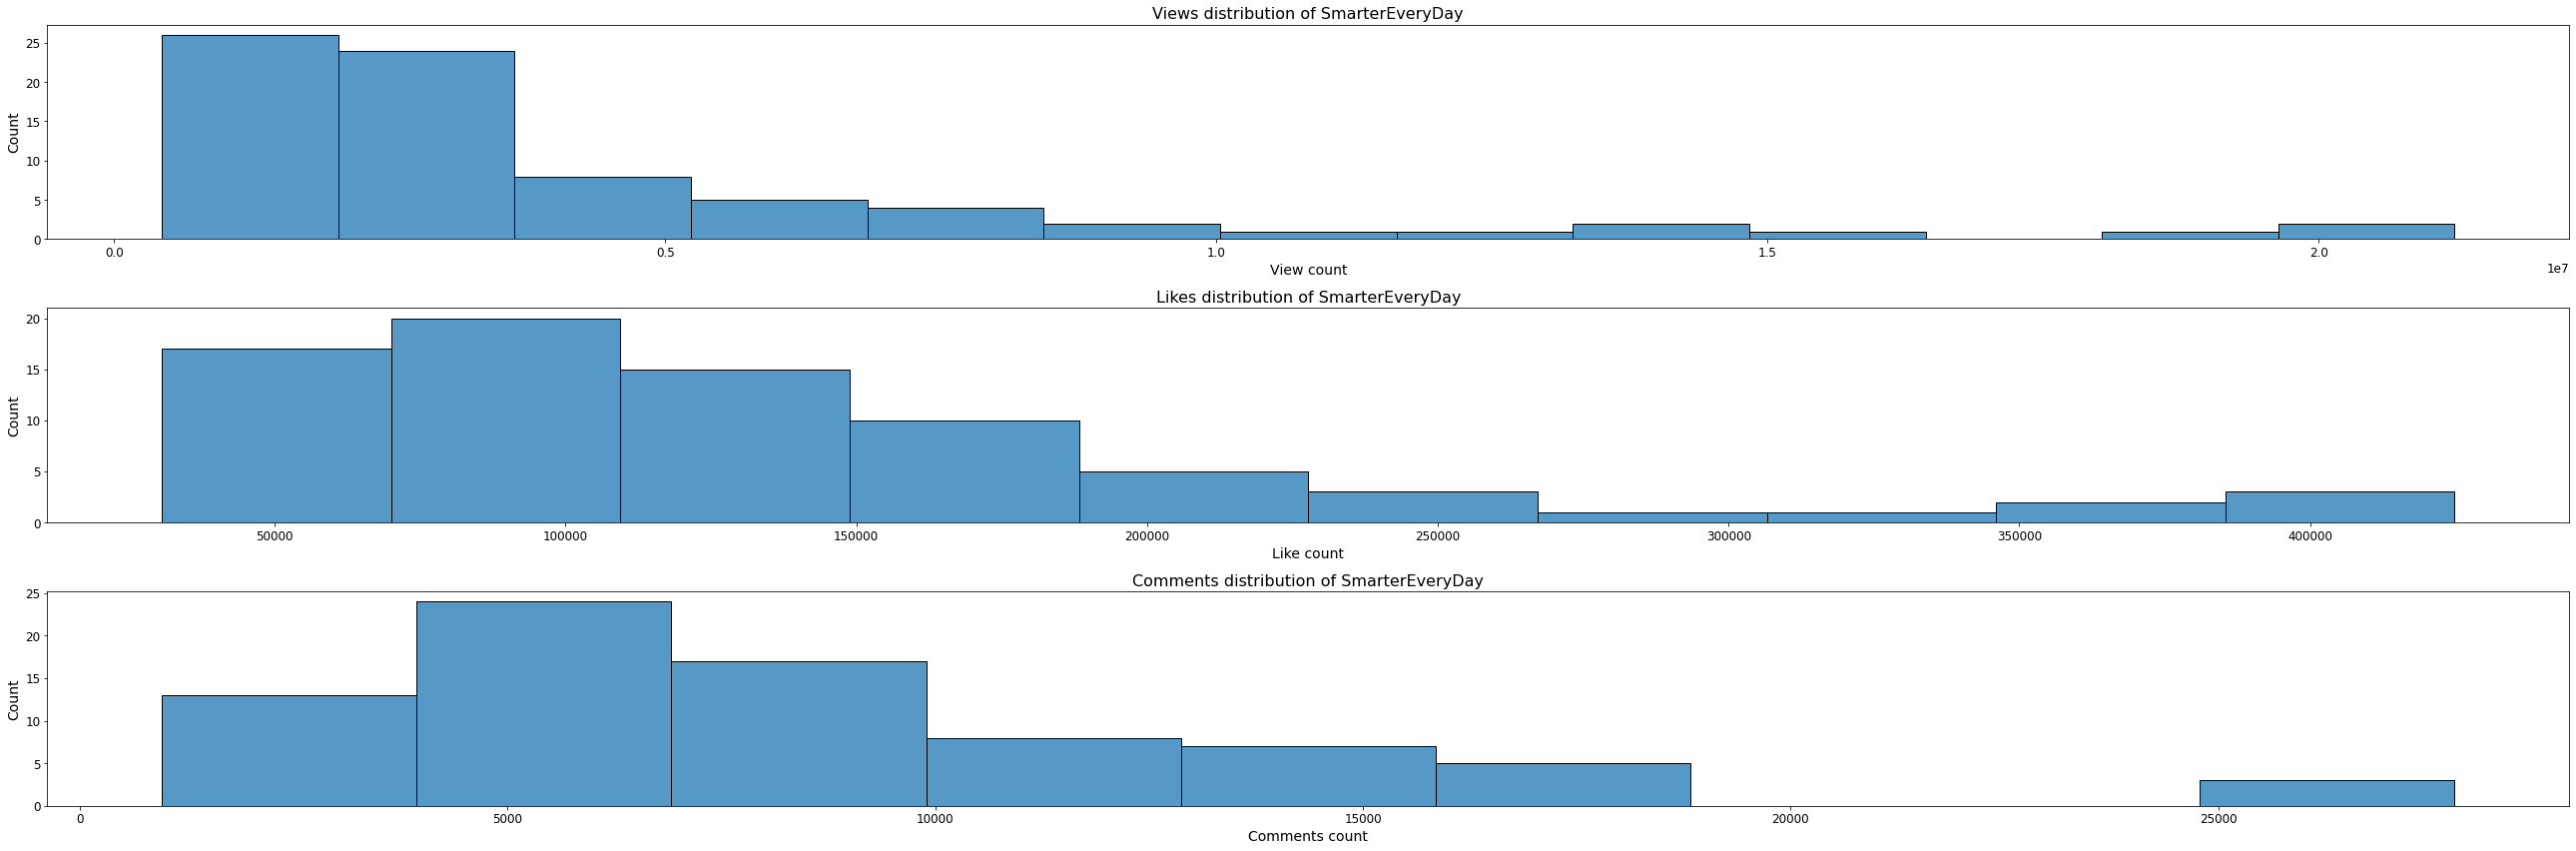

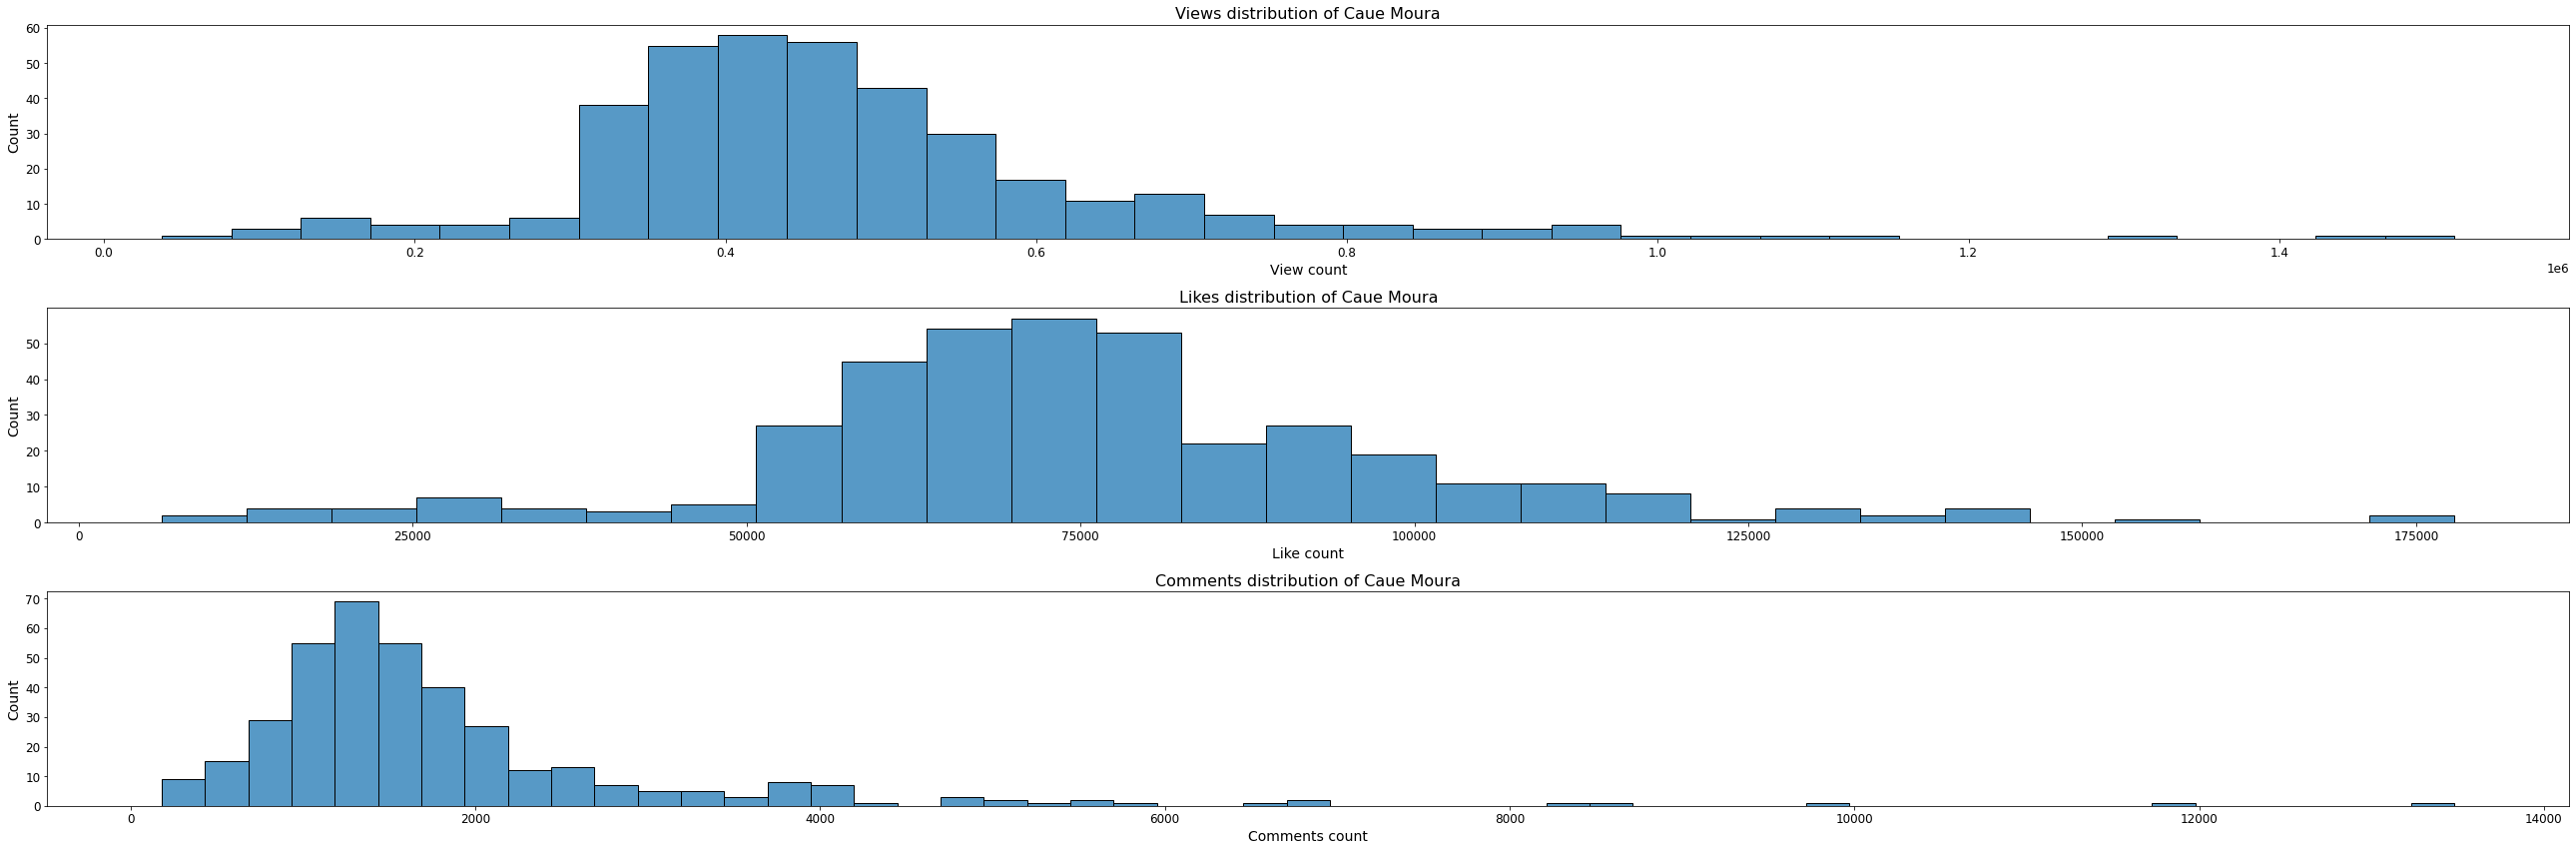

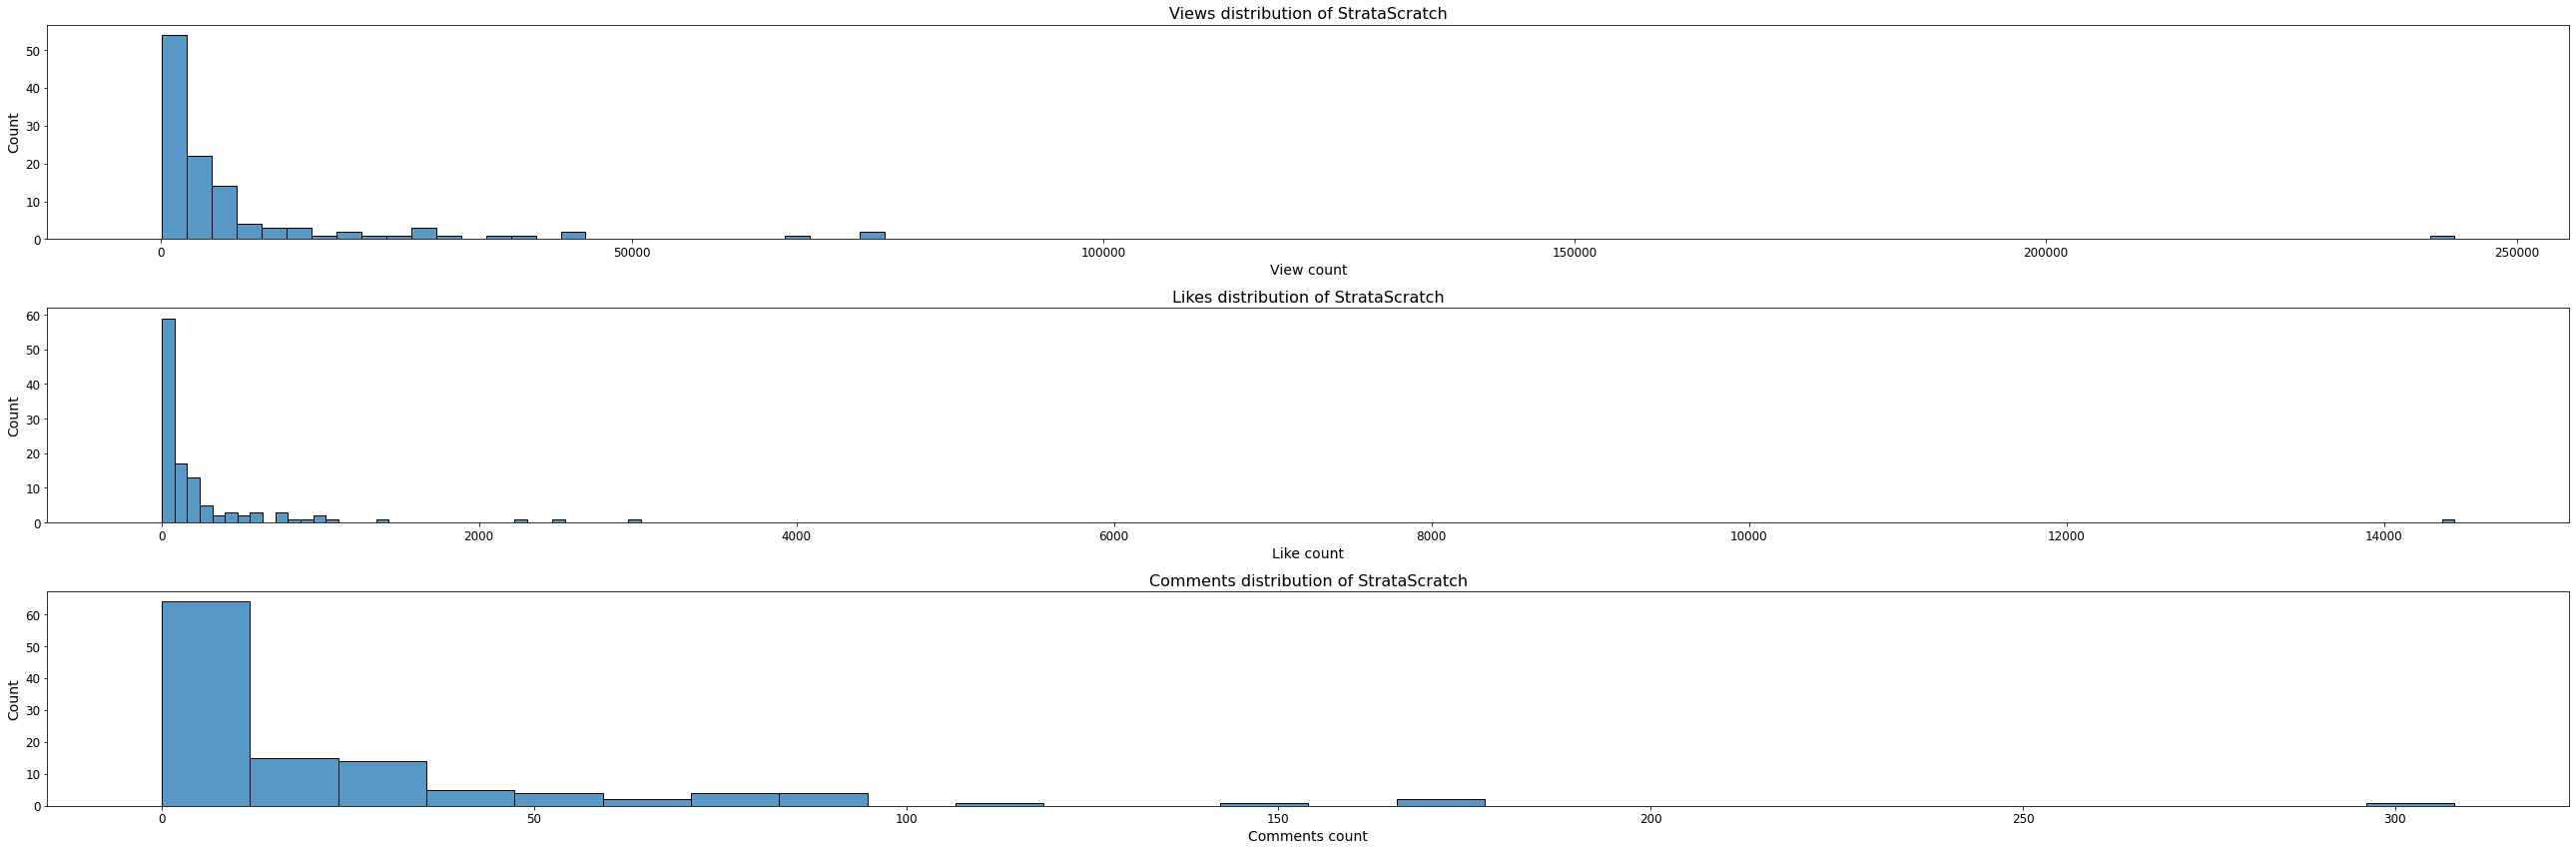

In [35]:
for channel_name in youtube_df['channel_title'].unique():
    histplot_views_likes_comments(youtube_df[youtube_df['channel_title']==channel_name], channel_name)

We can see the distributions more clearly now. Some channels have a normal distribution, while others actually follow a power law (I also tried increasing number of bins, but it is still a power law). The interesting thing is that there are small and big channels with normal and power law distributions.



### Log distribution per channel

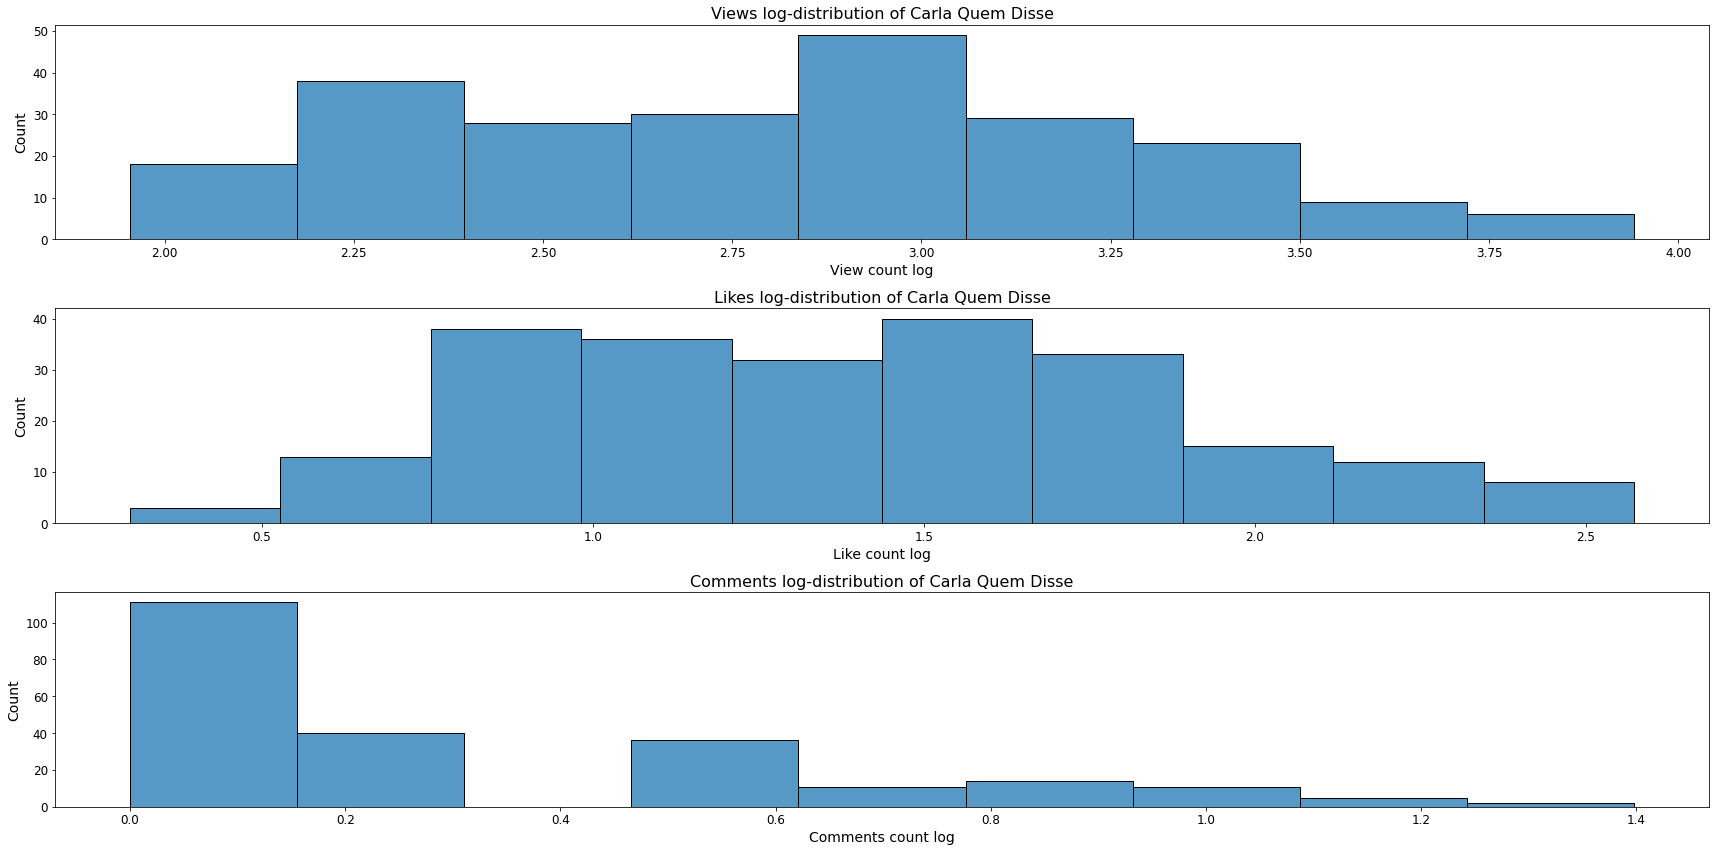

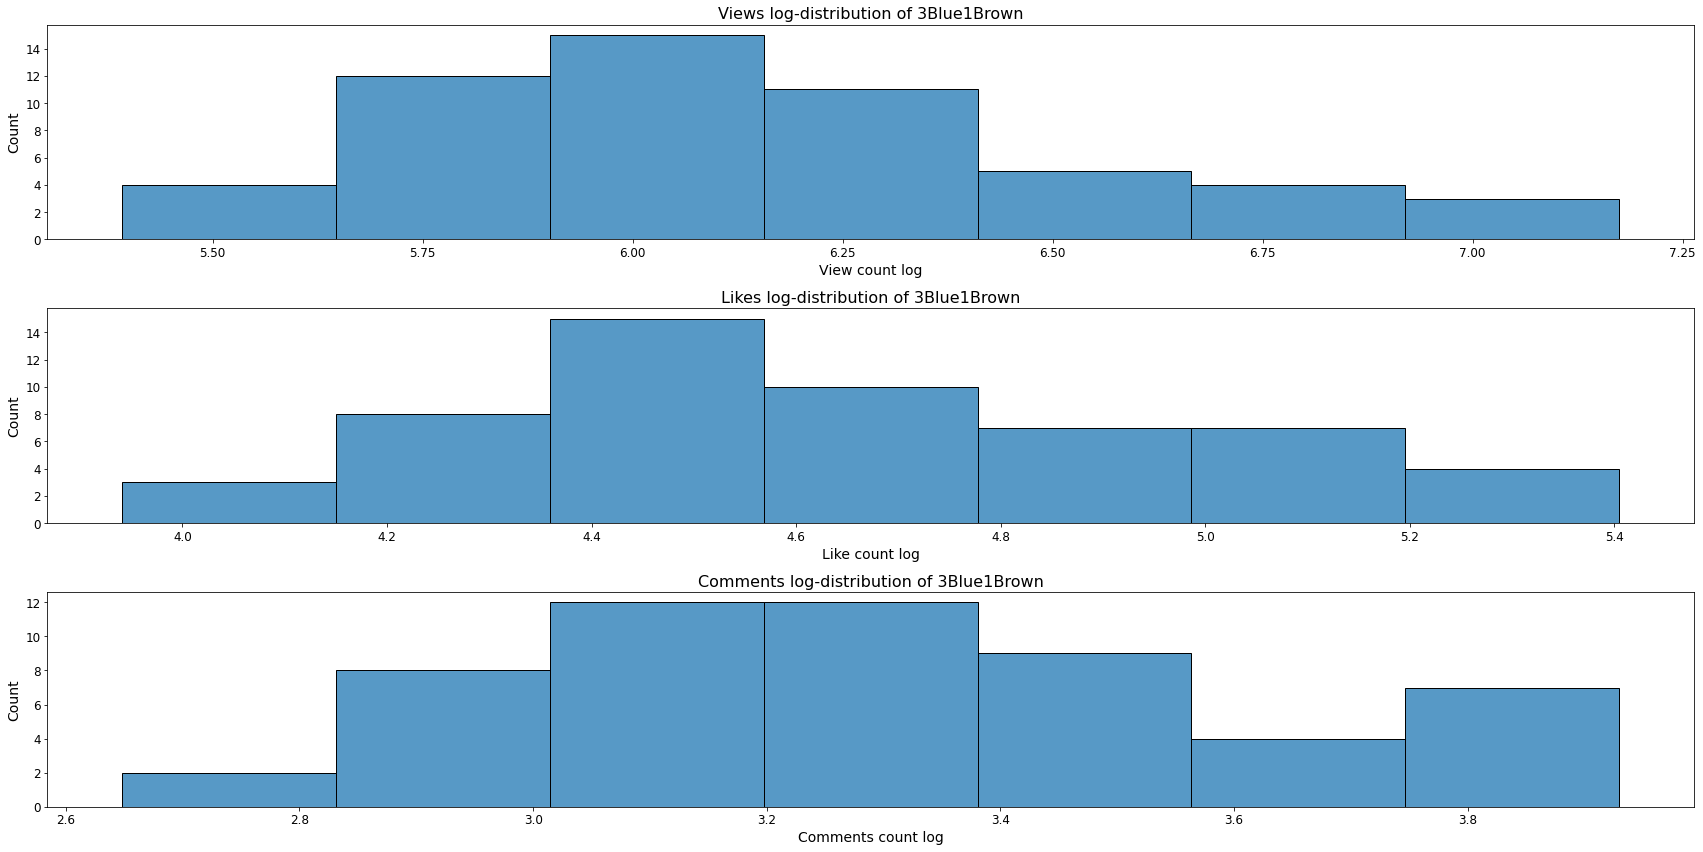

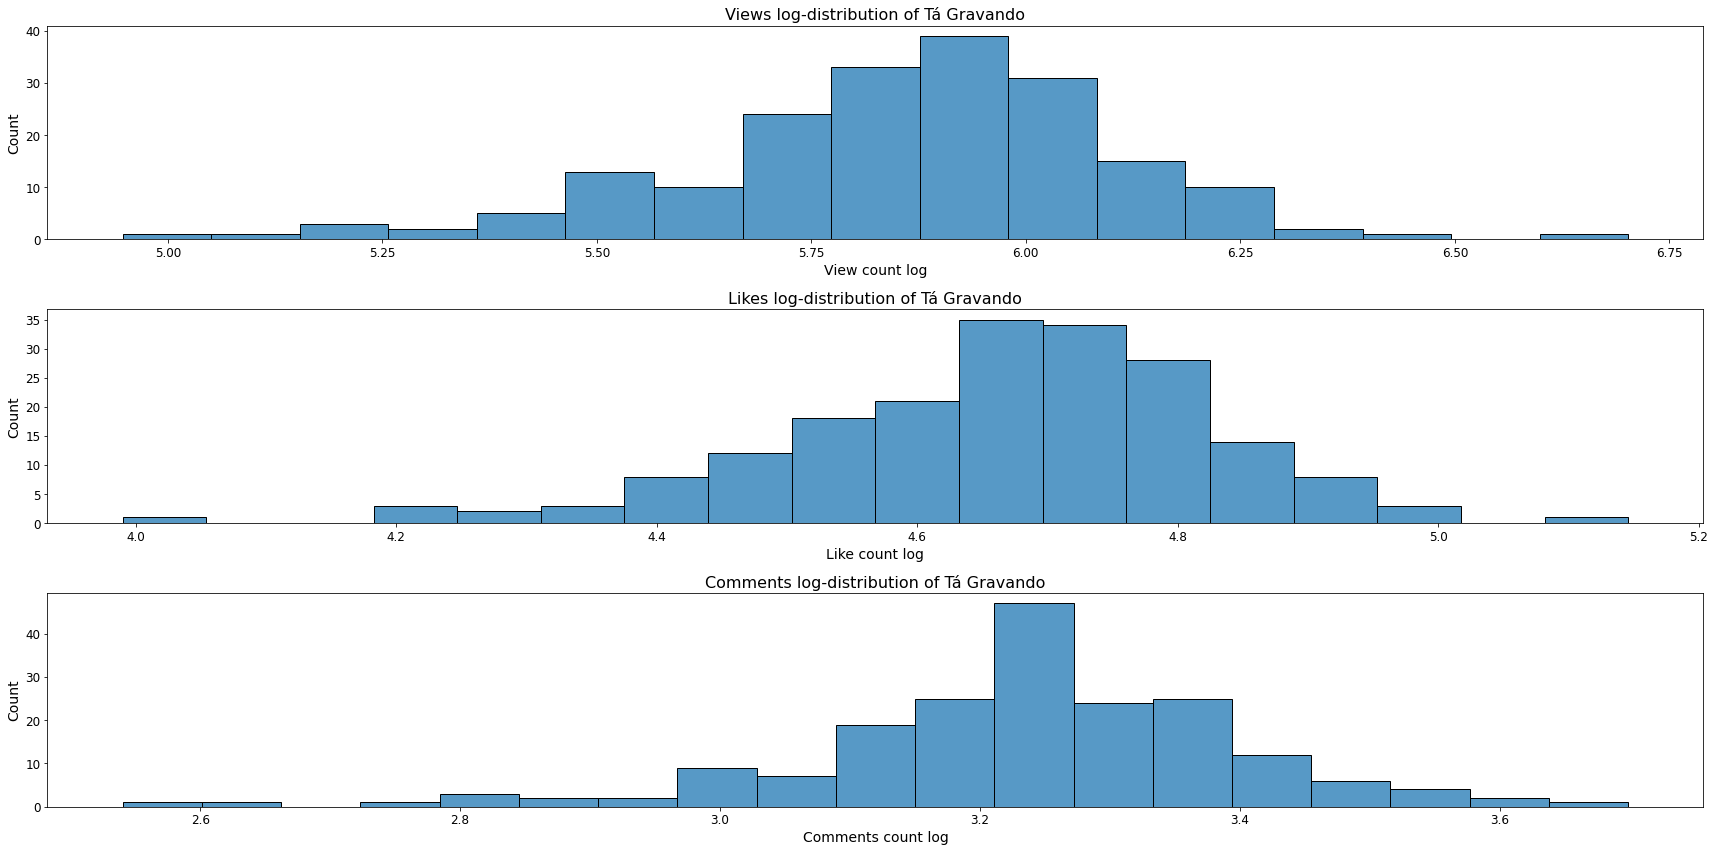

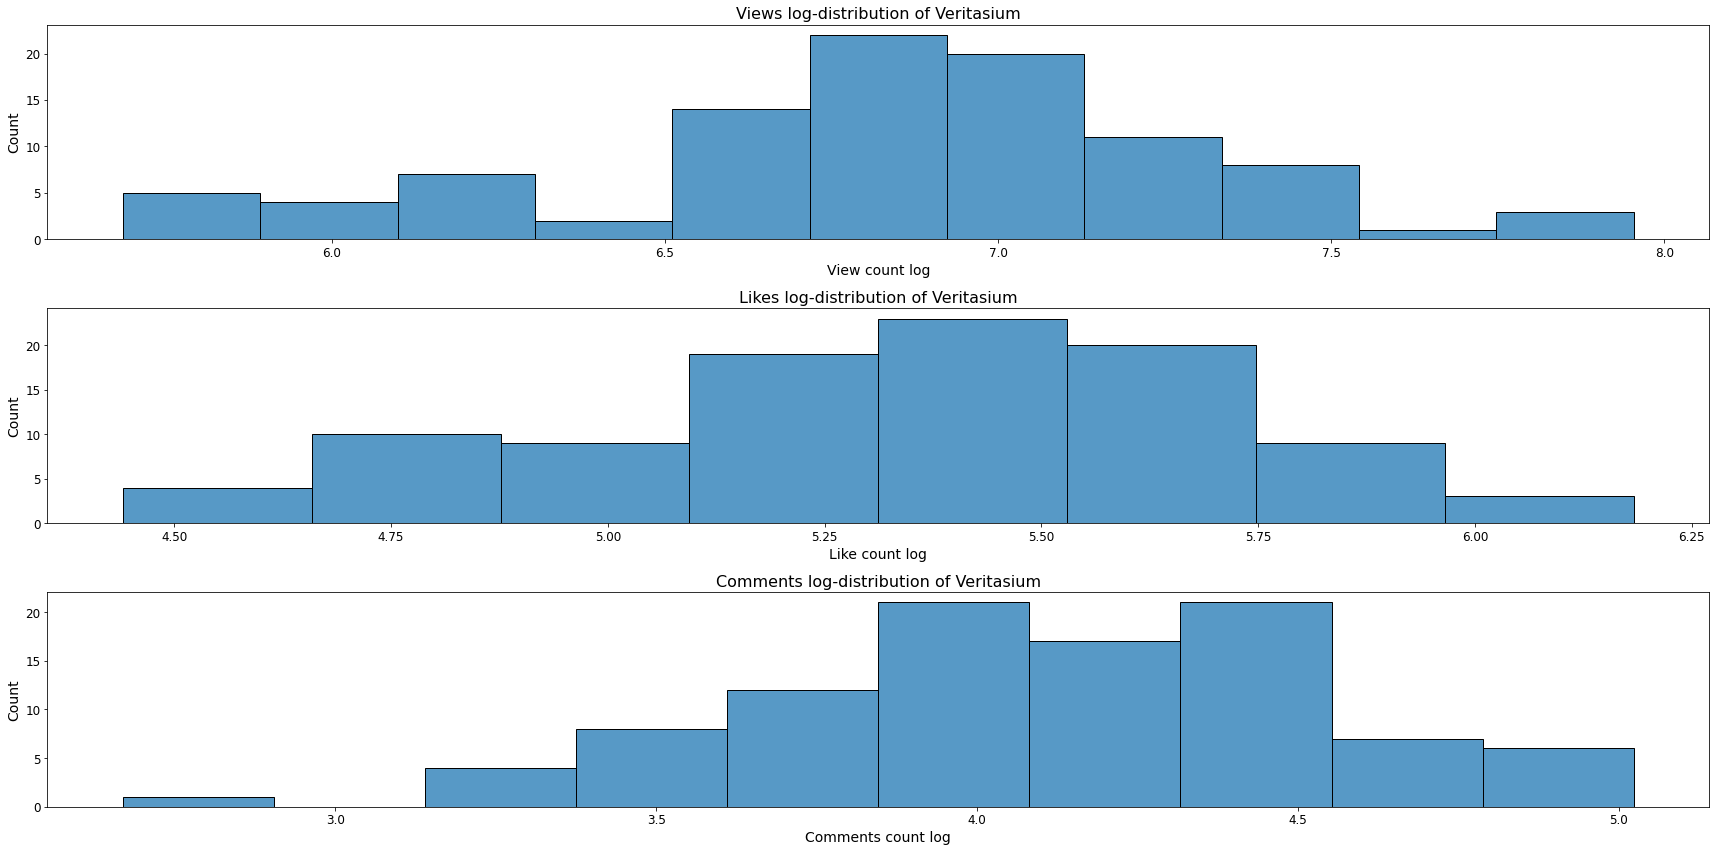

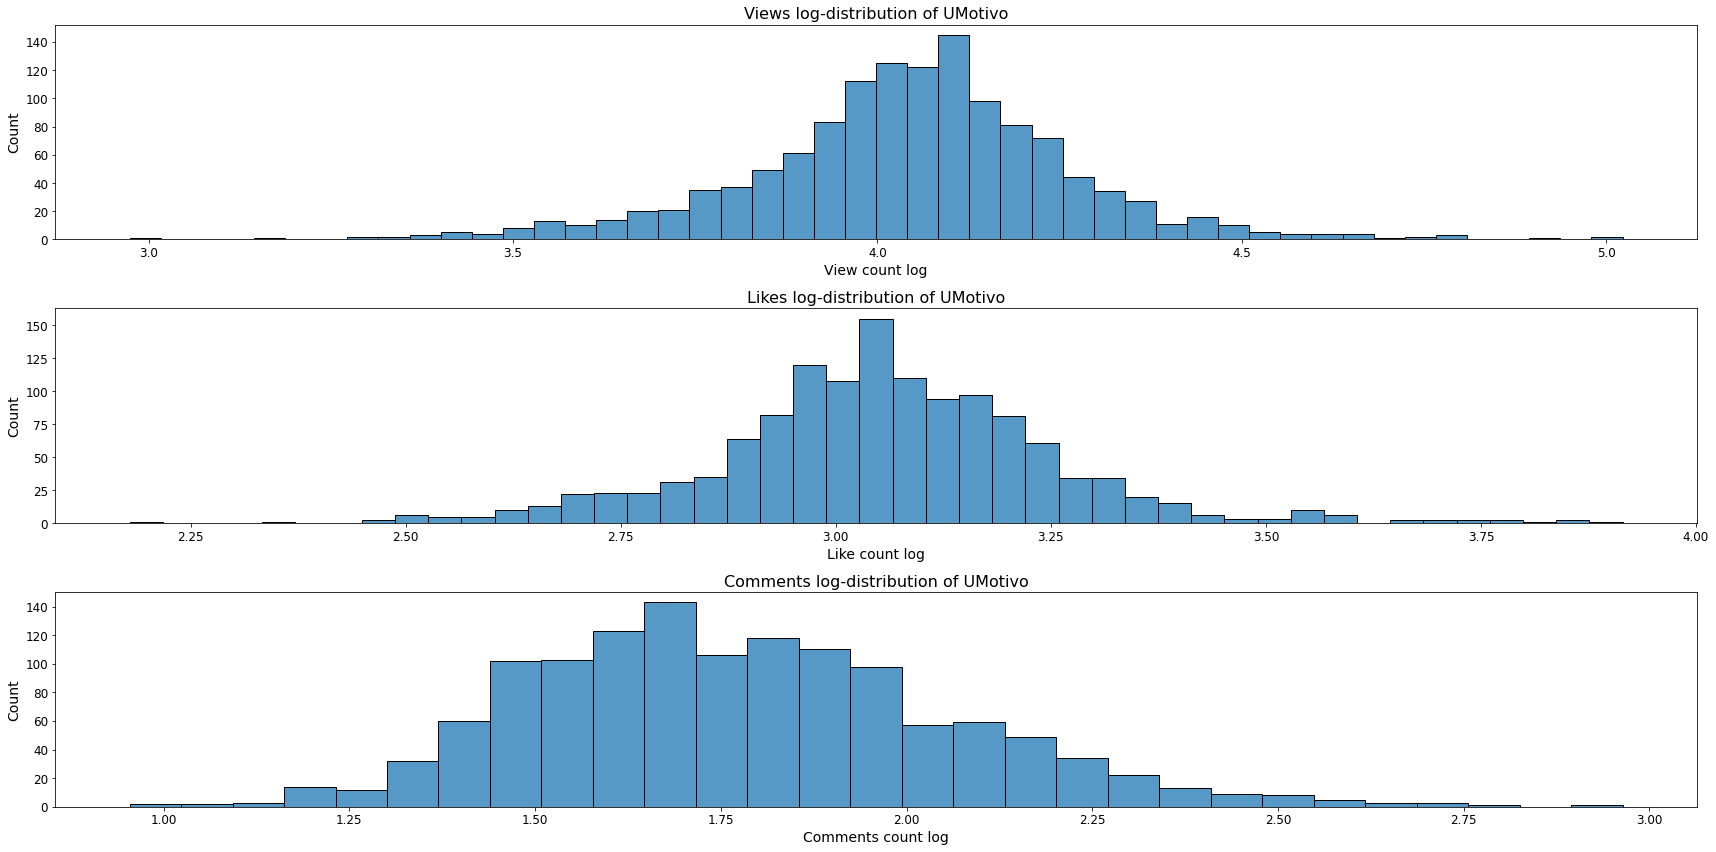

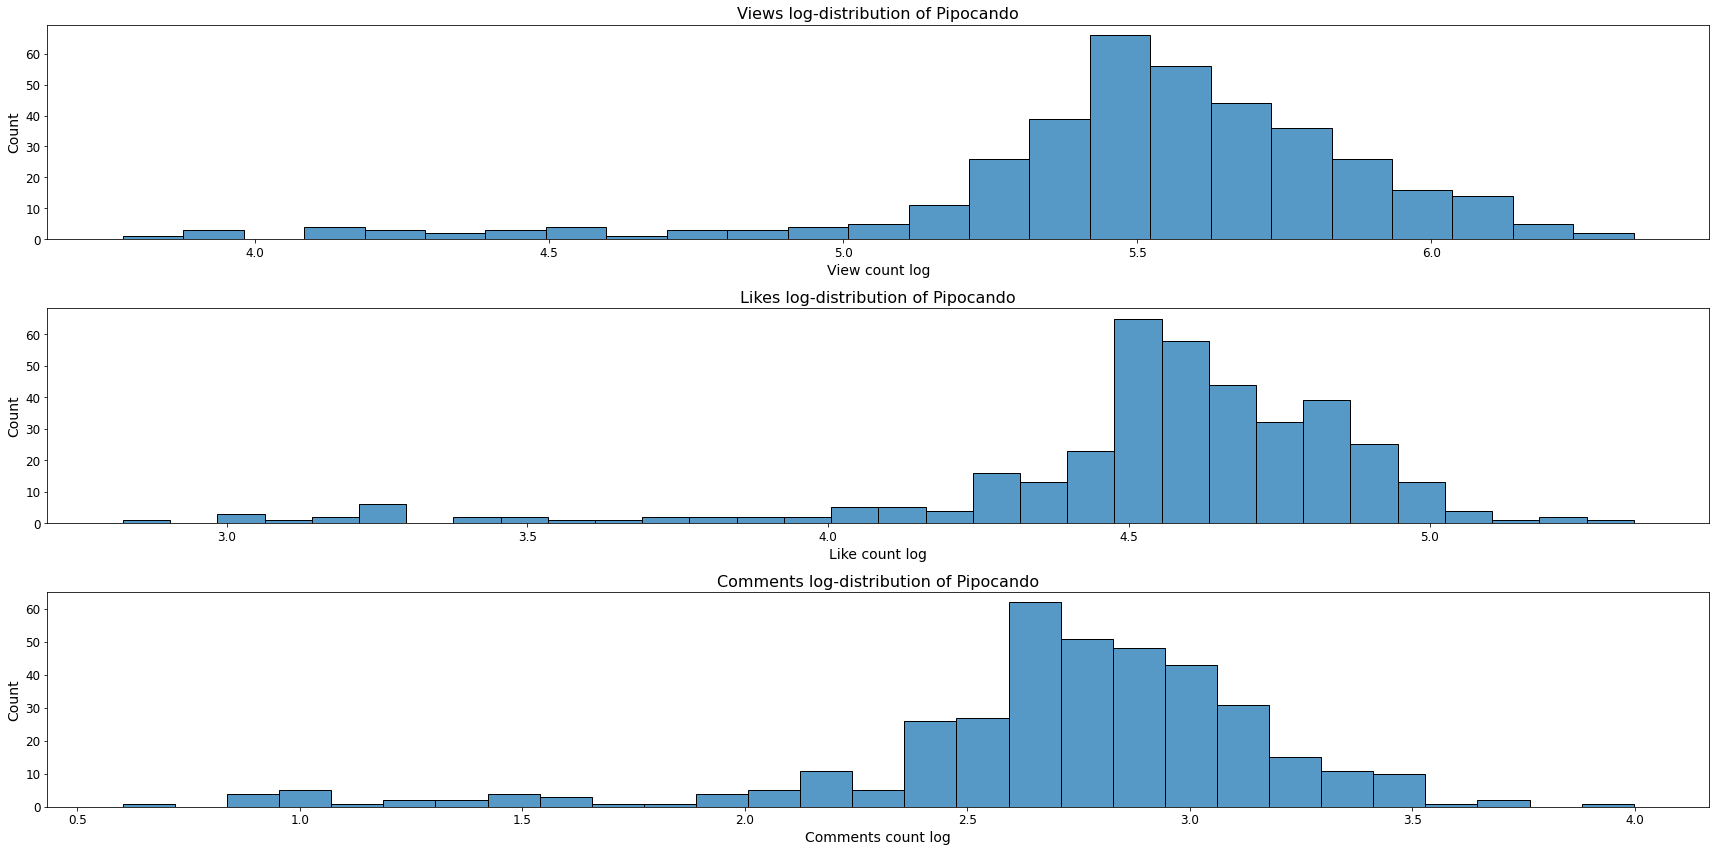

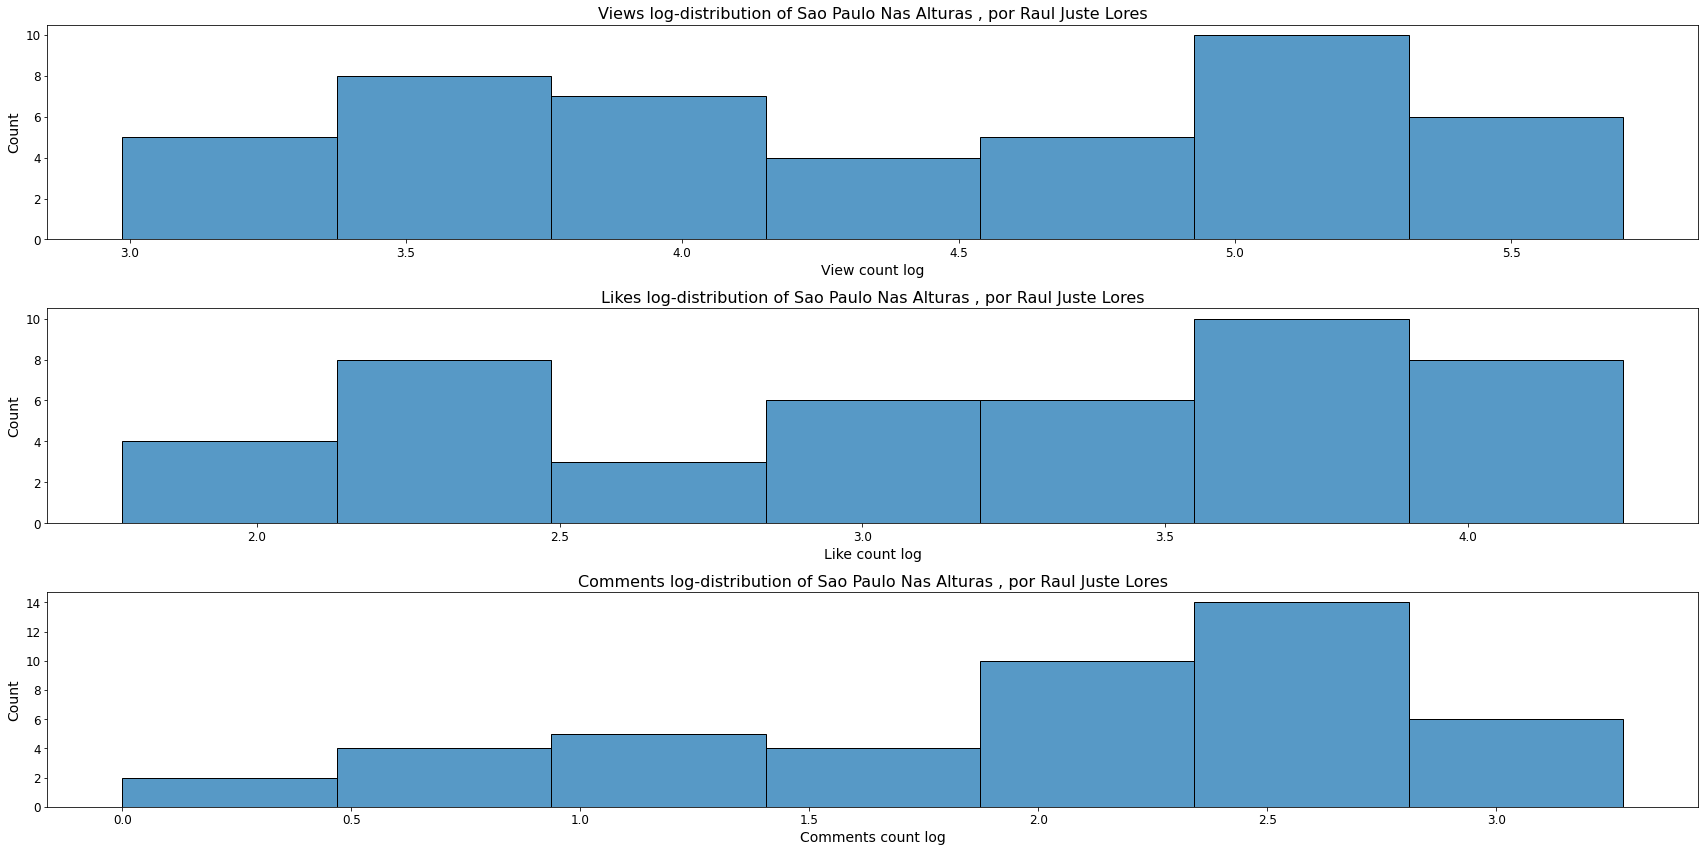

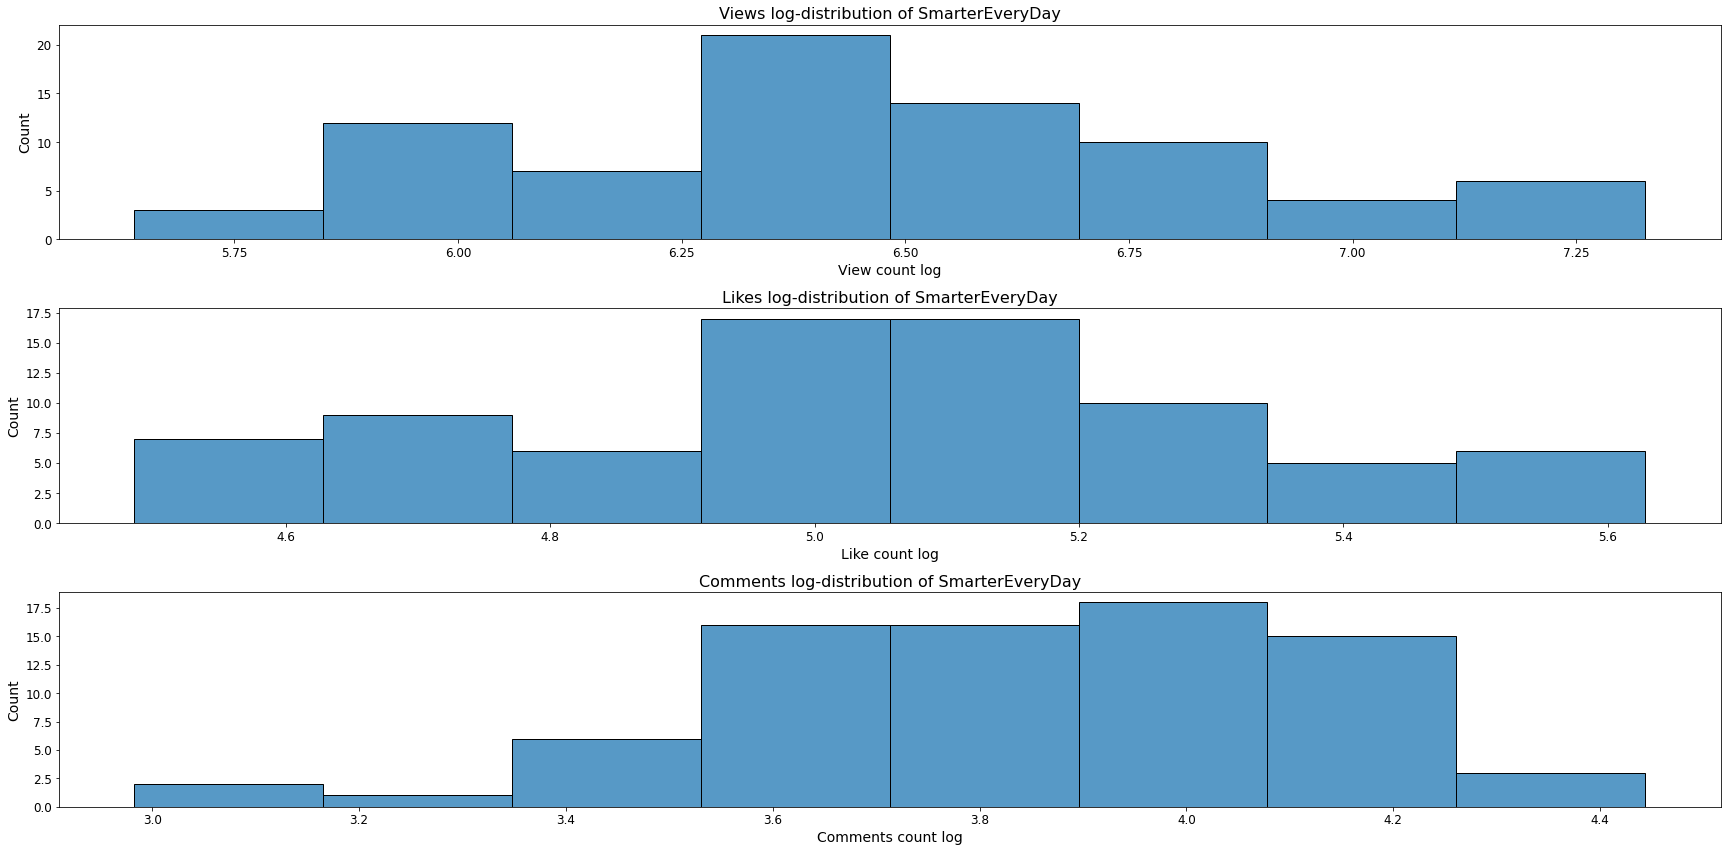

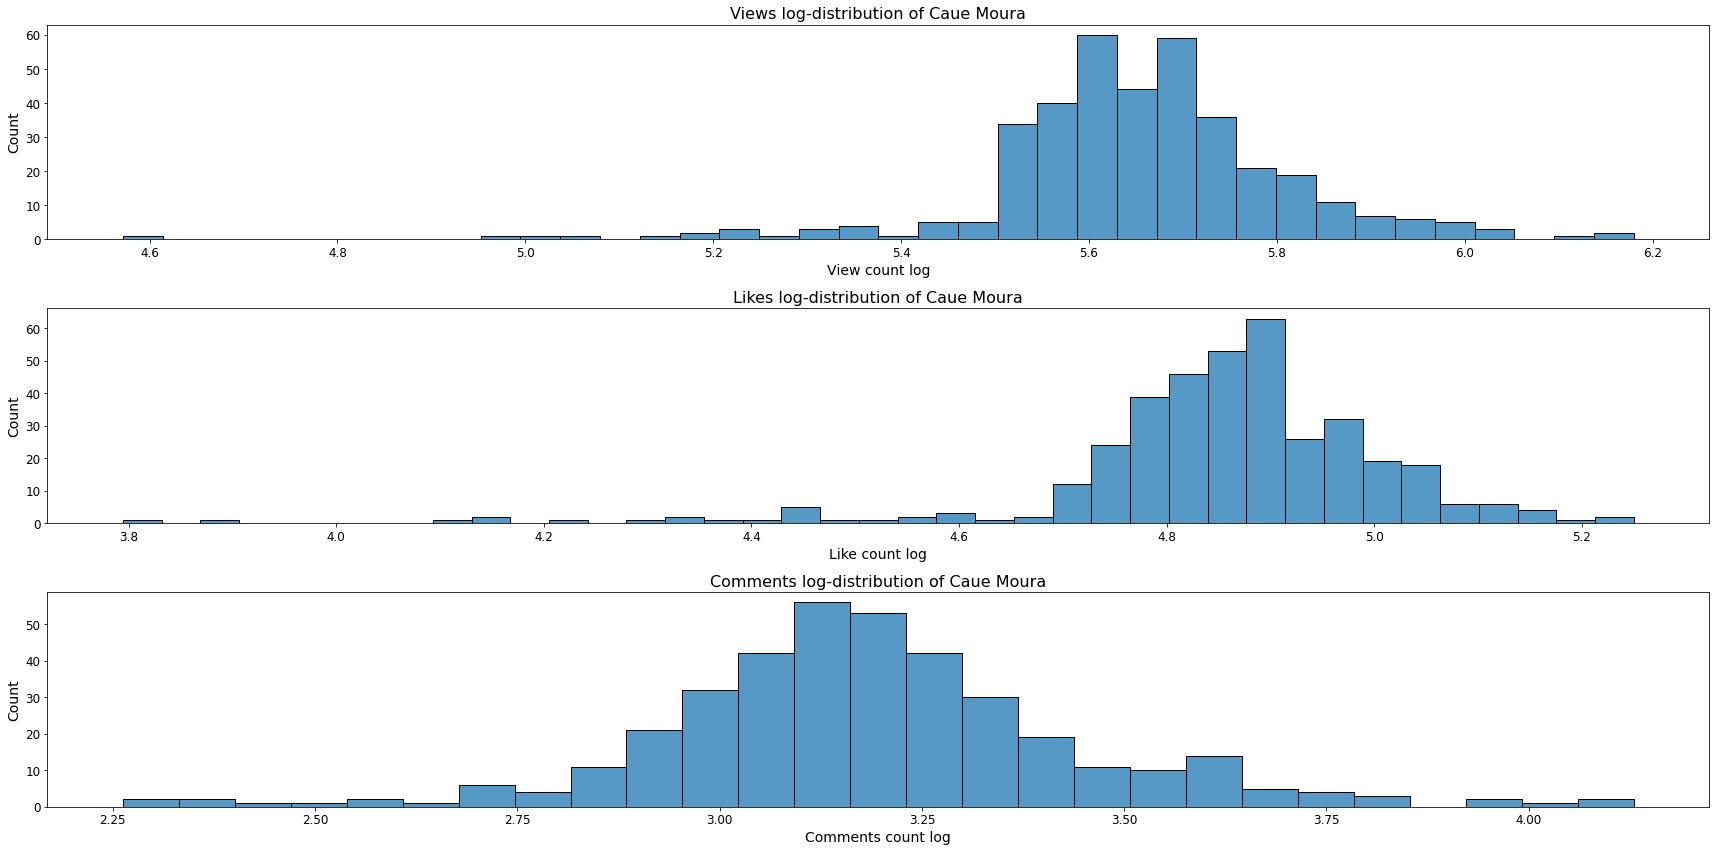

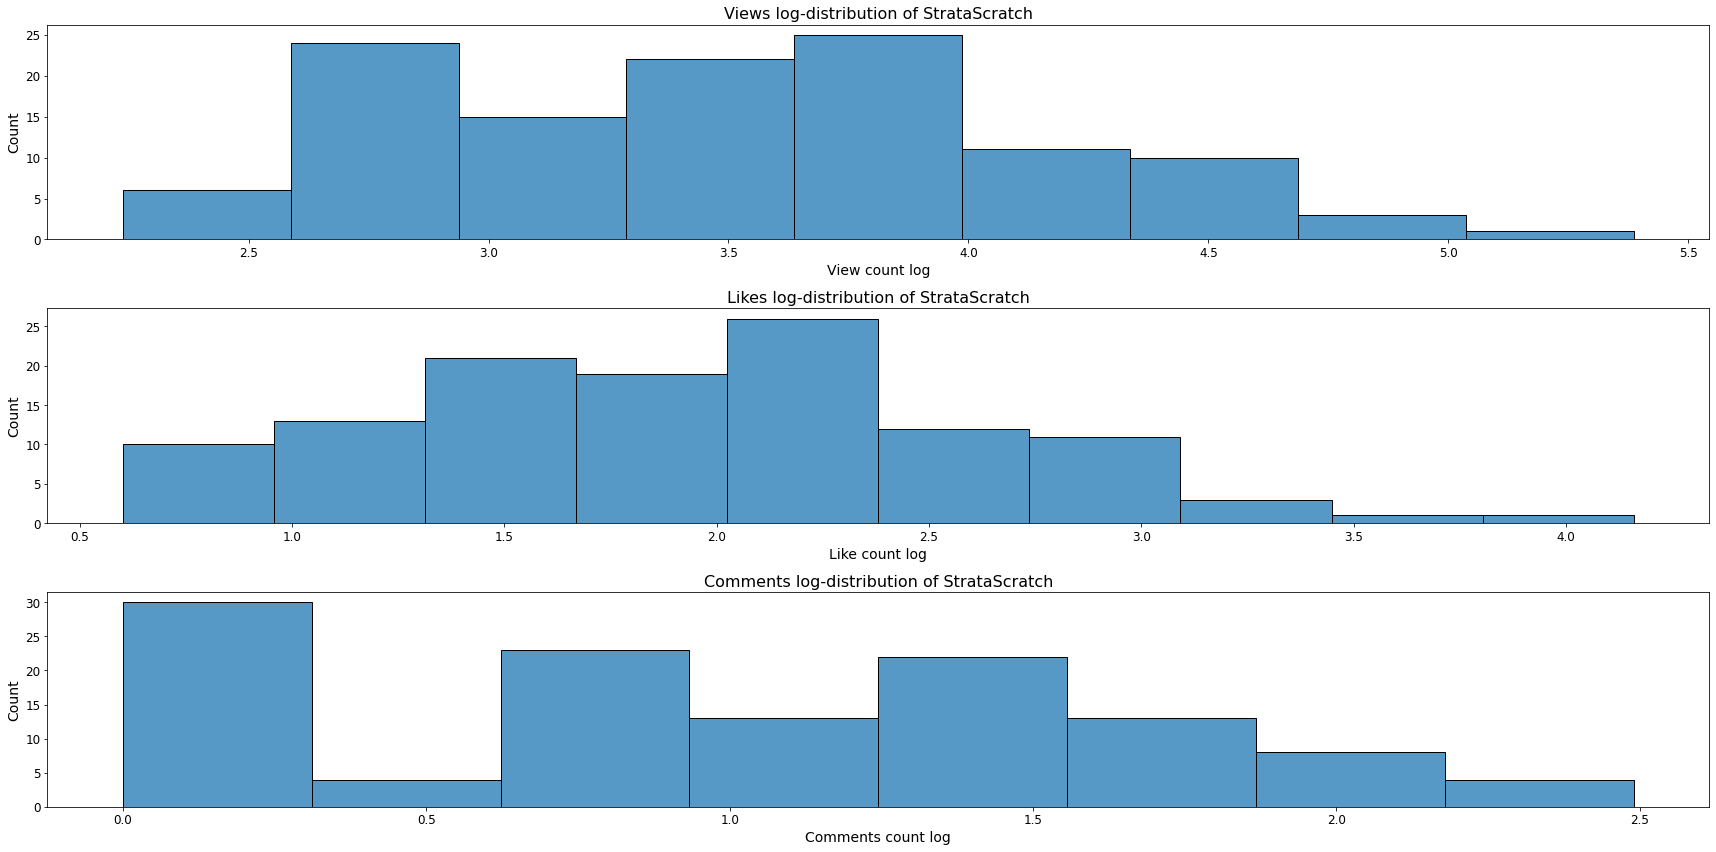

In [36]:
for channel_name in youtube_df['channel_title'].unique():
    log_histplot_views_likes_comments(youtube_df[youtube_df['channel_title']==channel_name], channel_name)

### What day and hour of the week videos were published?

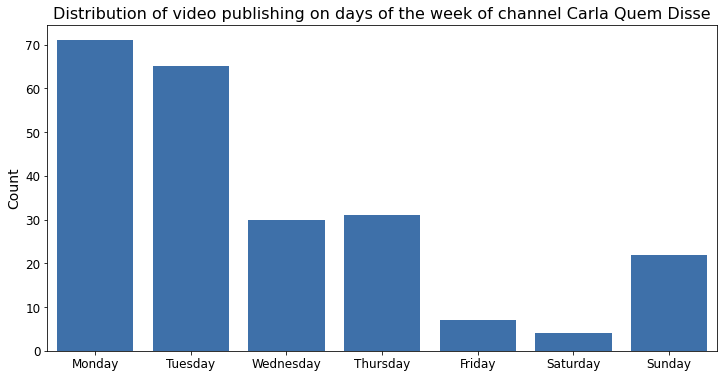

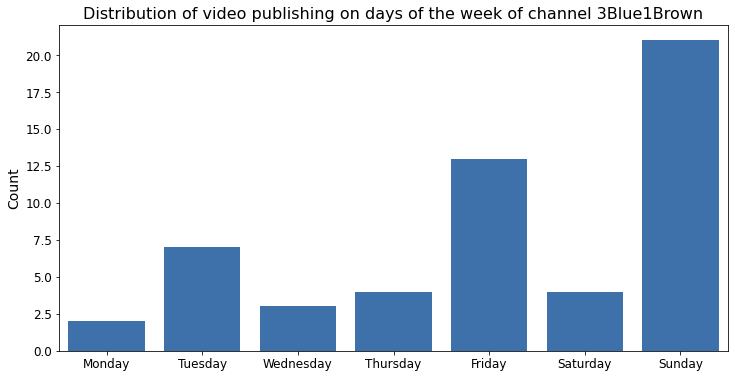

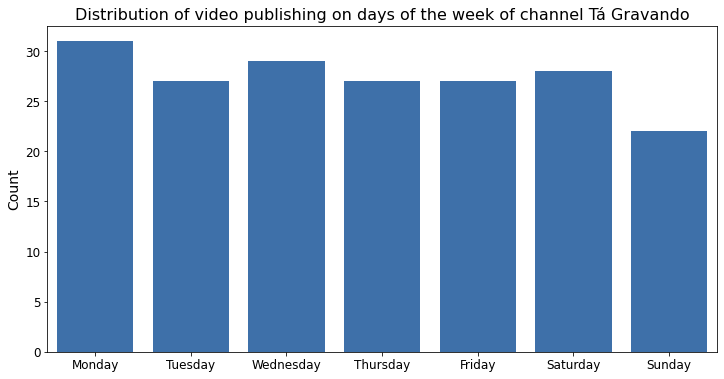

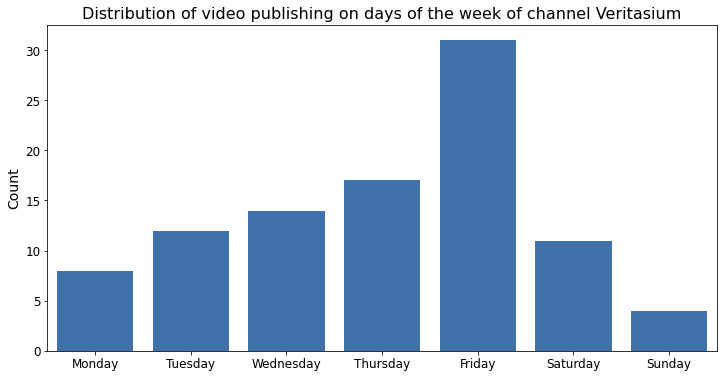

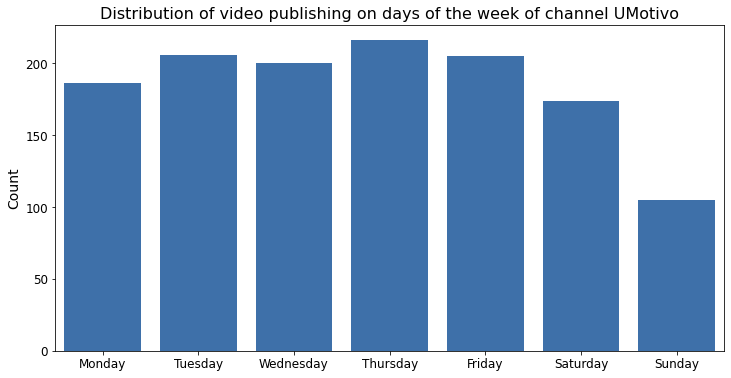

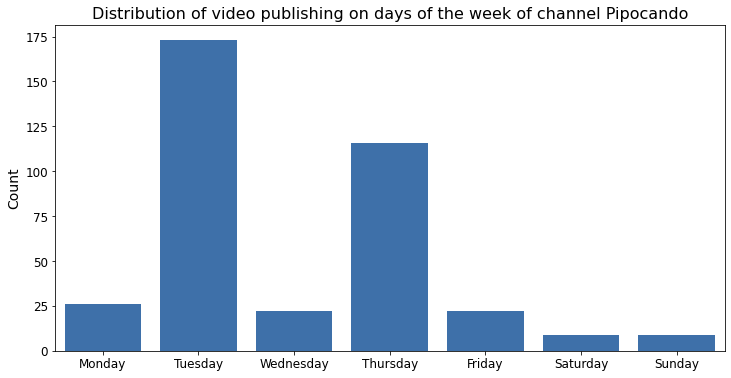

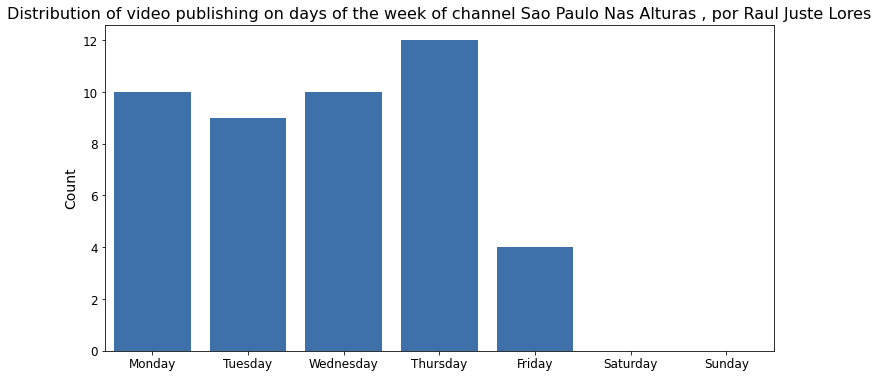

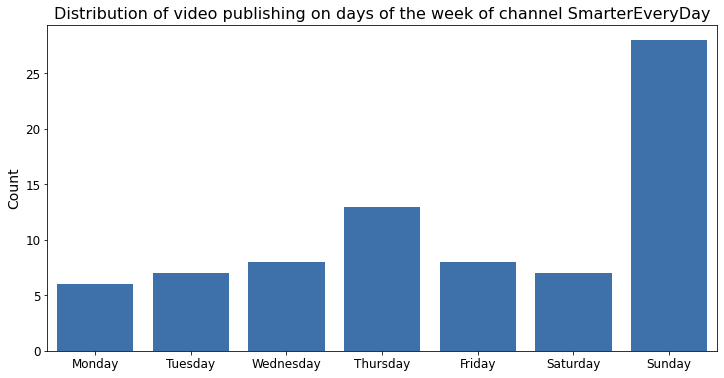

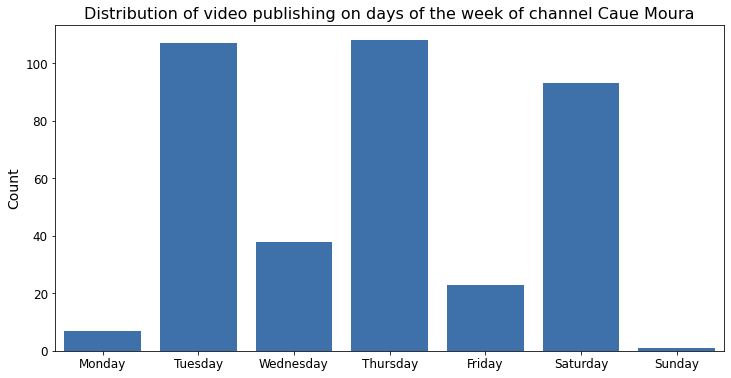

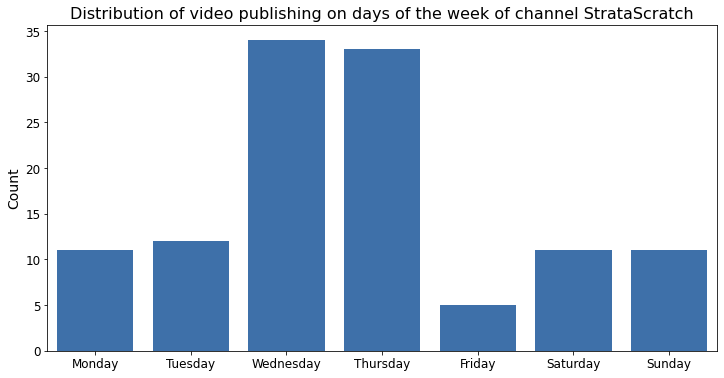

In [37]:
for channel_name in youtube_df['channel_title'].unique():
    plot_week_days(youtube_df[youtube_df['channel_title']==channel_name], channel_name)

I was expecting that channels would have at least a similar publishing pattern, but it isn't the case. 

SmarterEveryDay for example, a big channel in the US, chooses to publish most videos on Sunday. I wonder if its public watches videos on different hours (unfortunately I don't have the data).

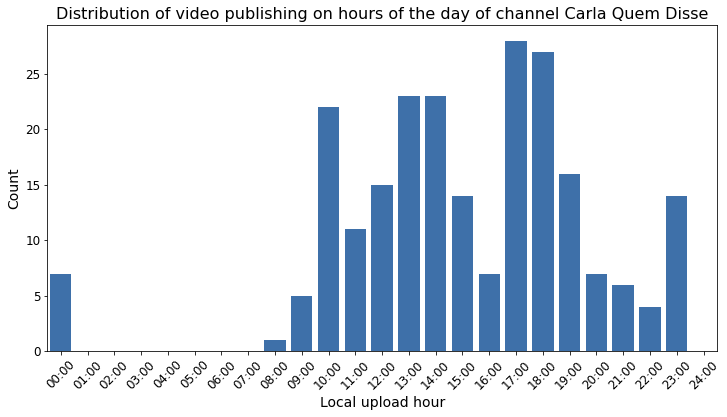

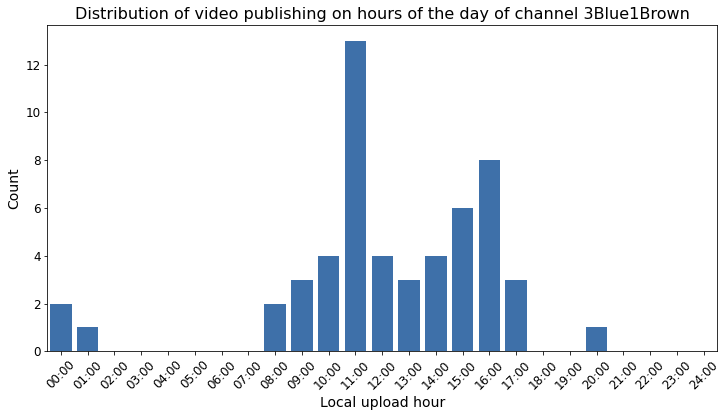

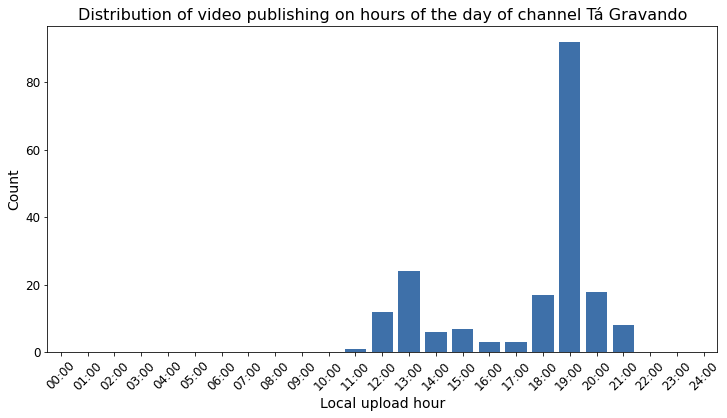

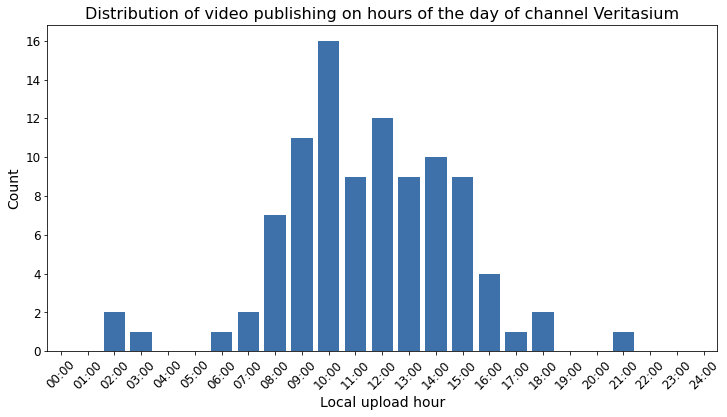

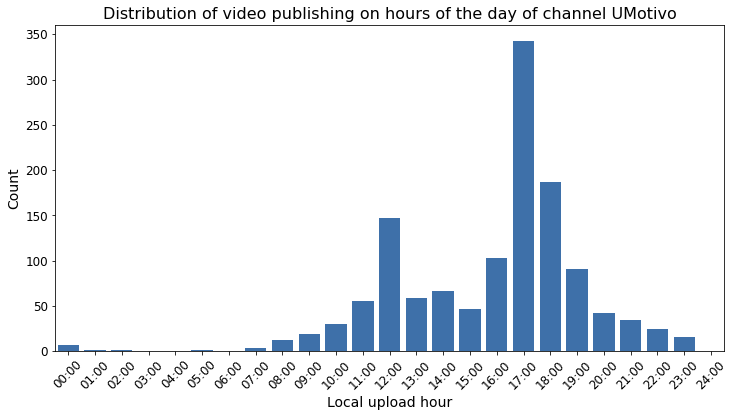

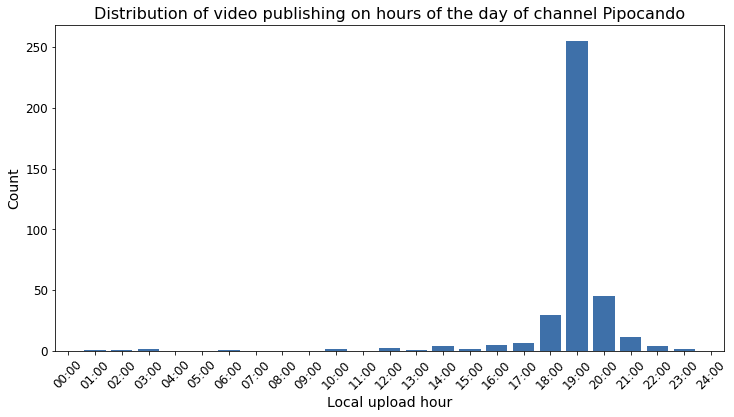

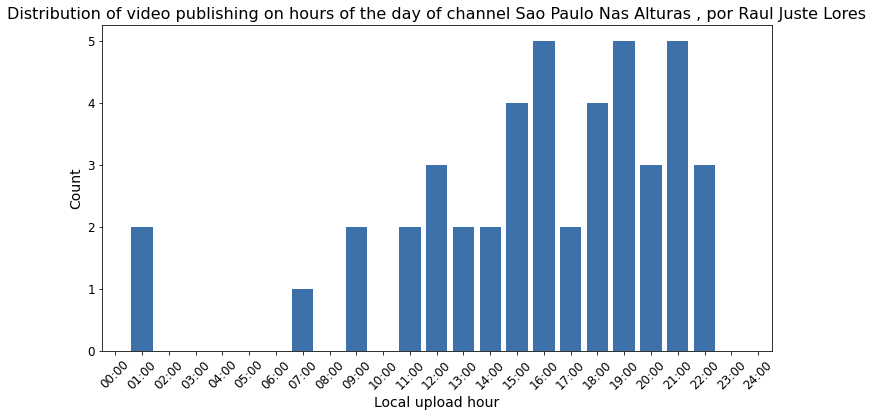

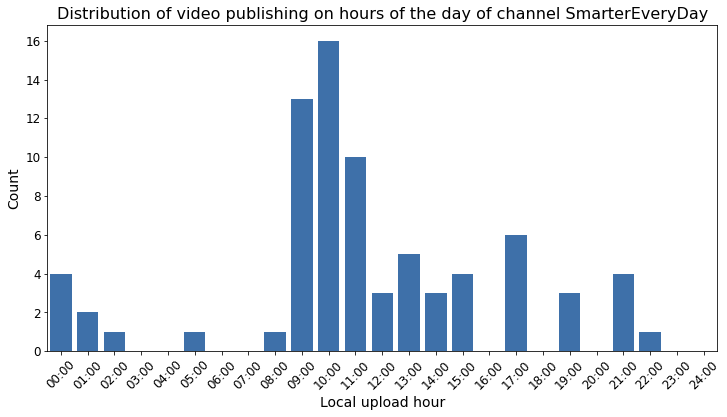

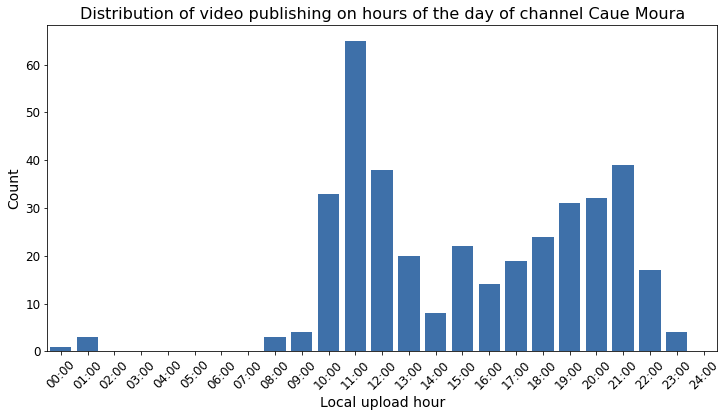

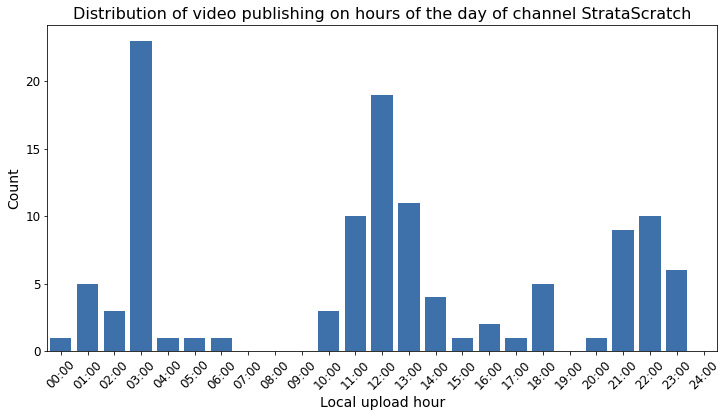

In [39]:
for channel_name in youtube_df['channel_title'].unique():
    plot_hour_of_day(youtube_df[youtube_df['channel_title']==channel_name], channel_name)

Publishing hours have a pattern around all channels: videos really are published around lunch time or at evening.

## 3.2) Numerical vs categorical


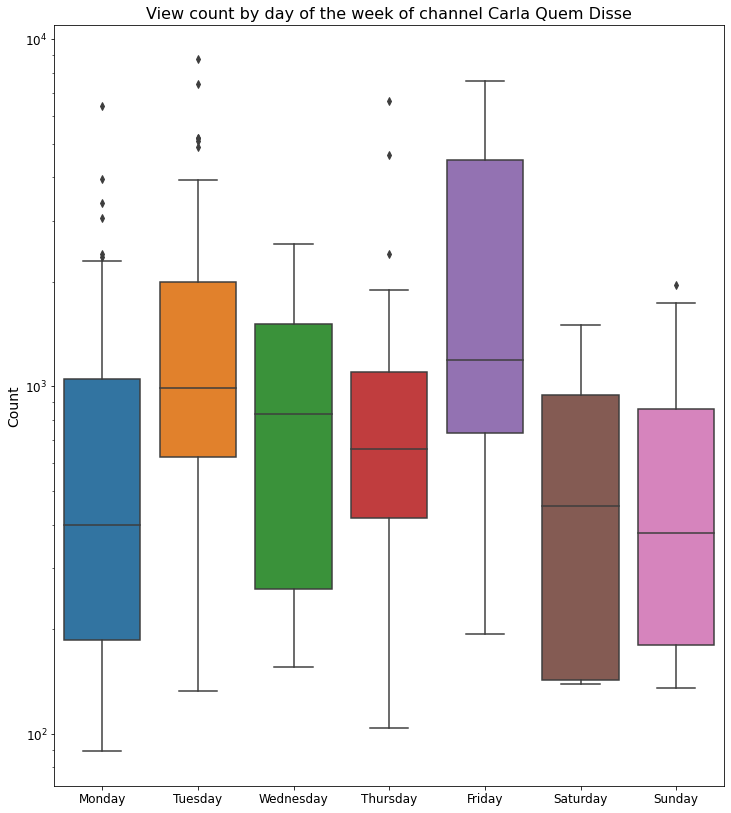

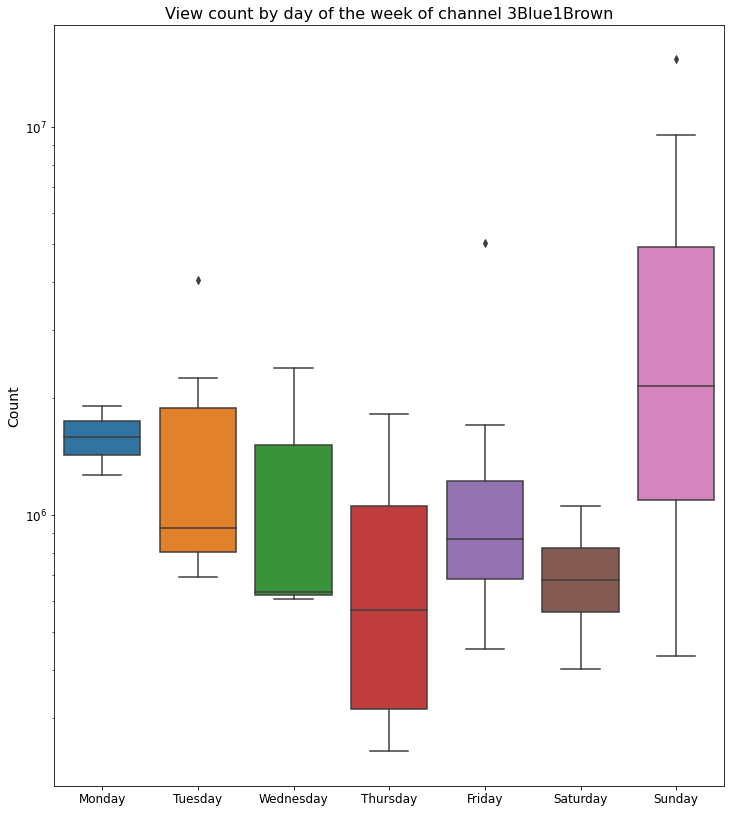

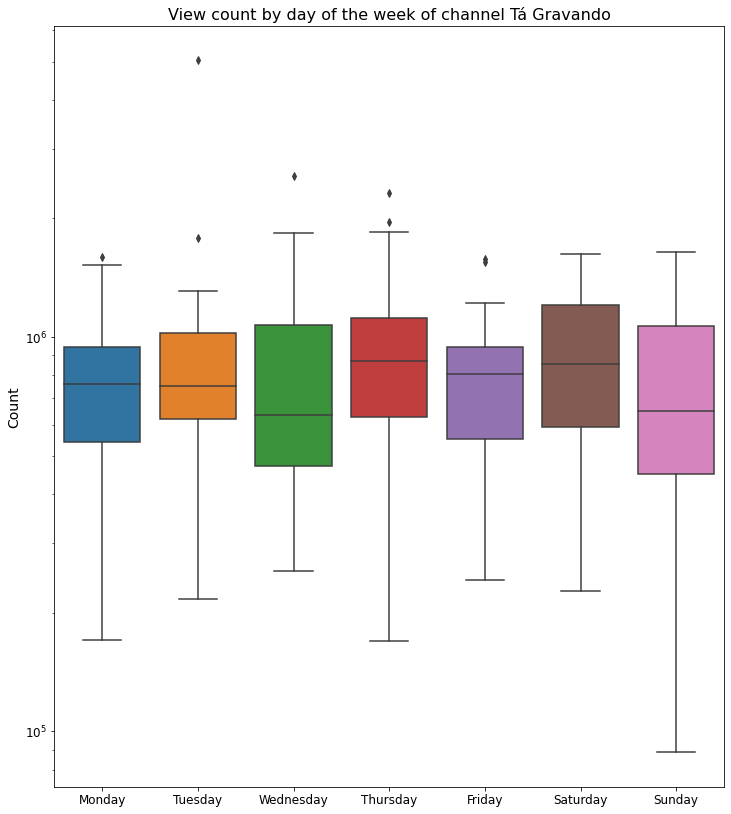

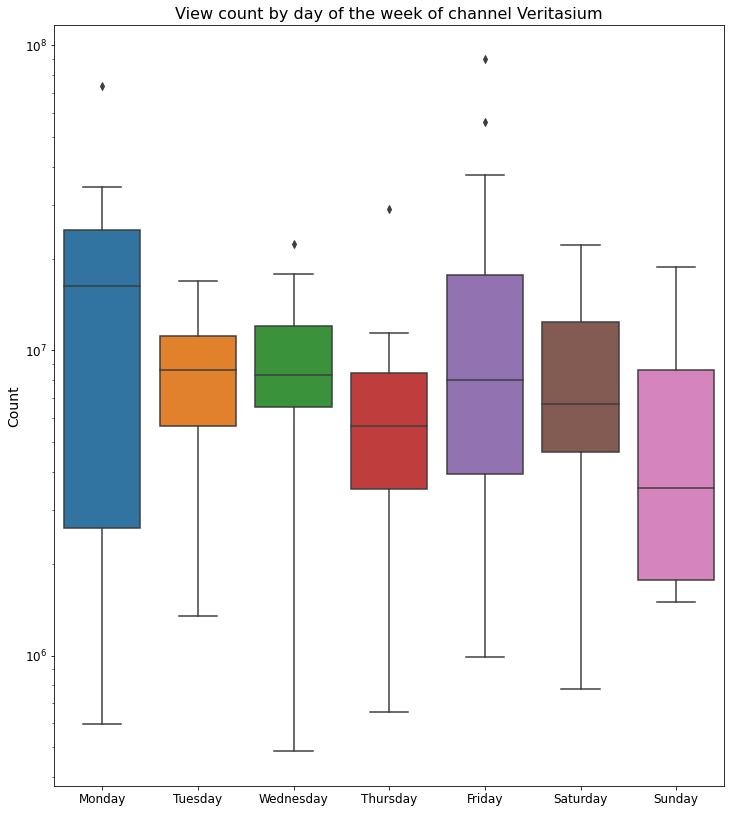

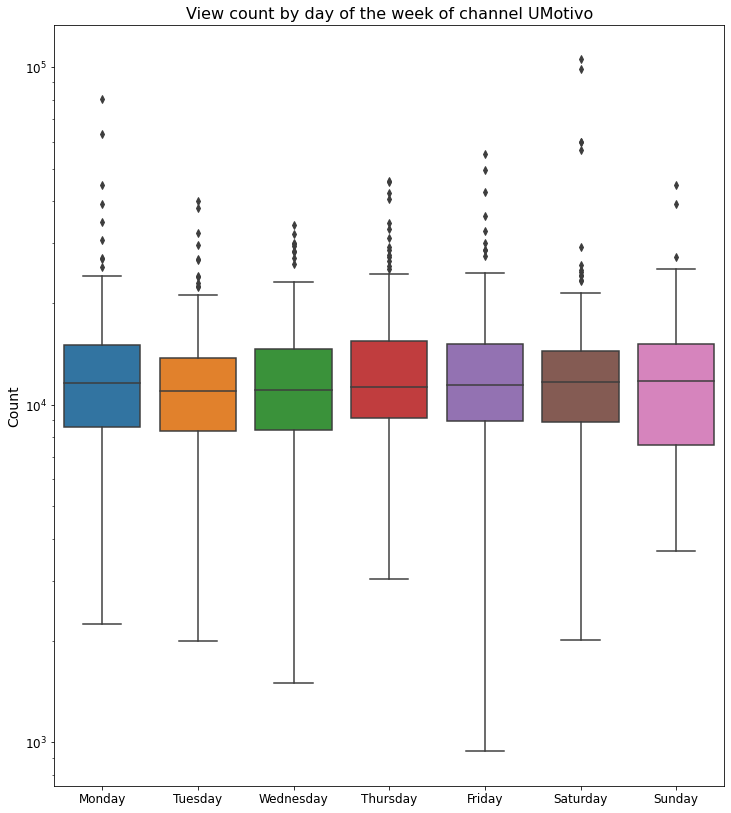

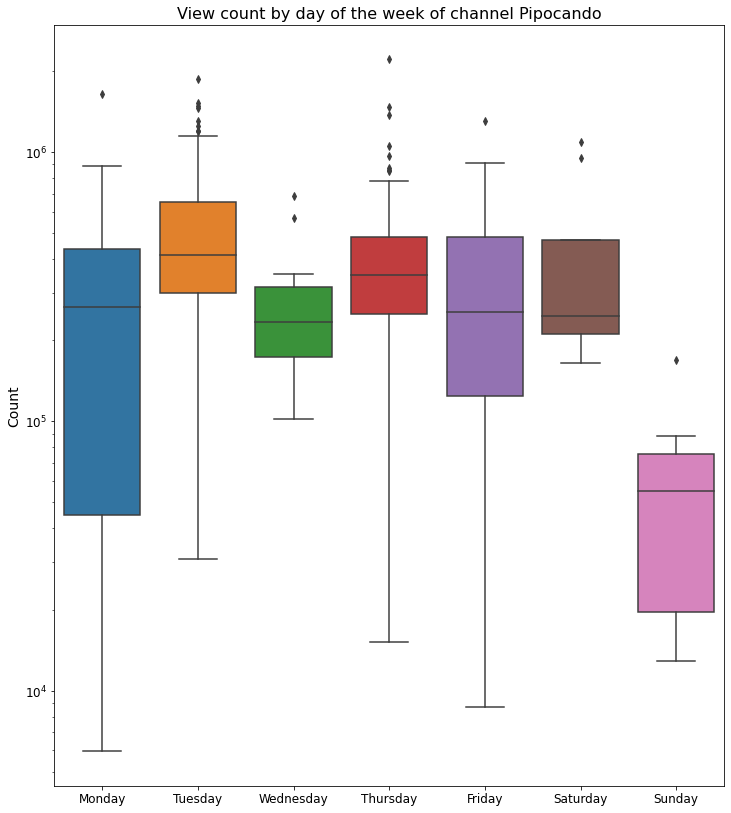

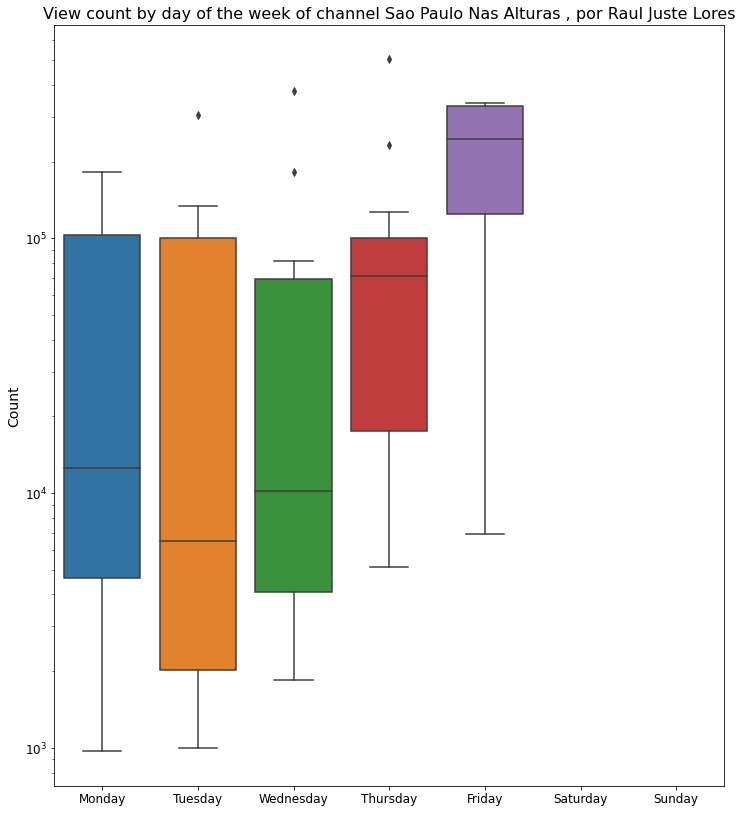

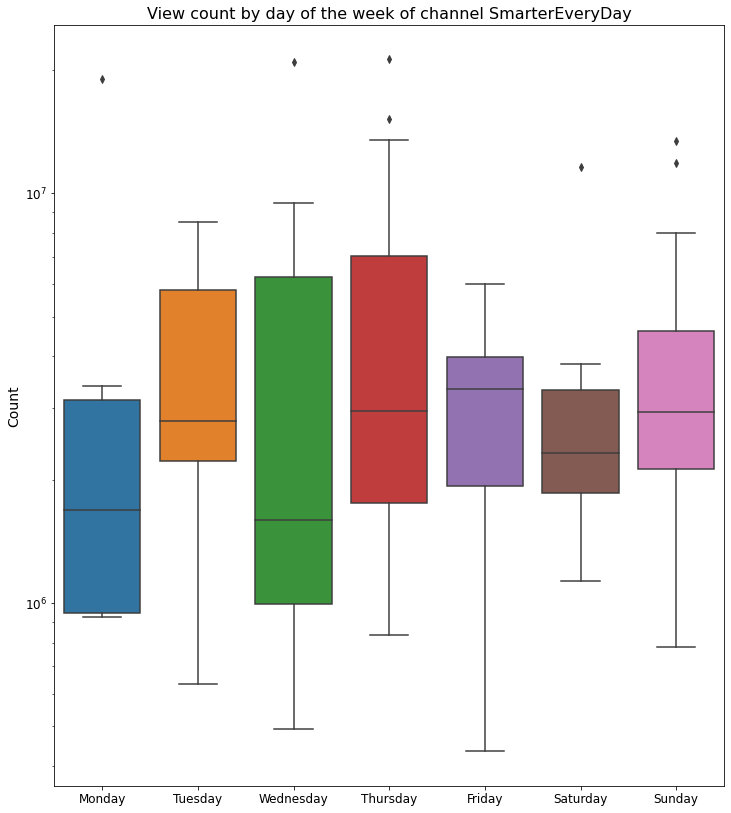

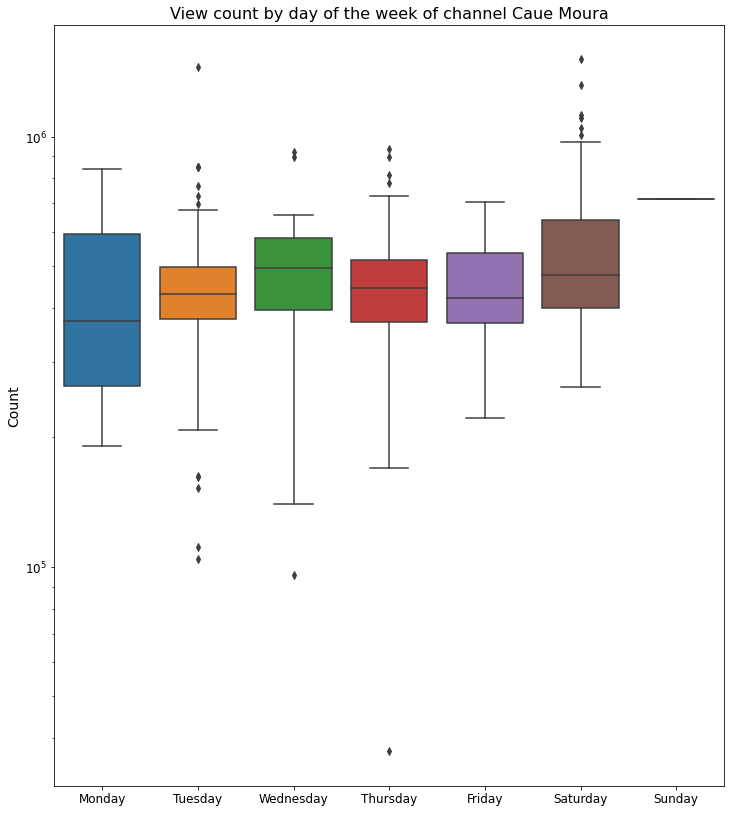

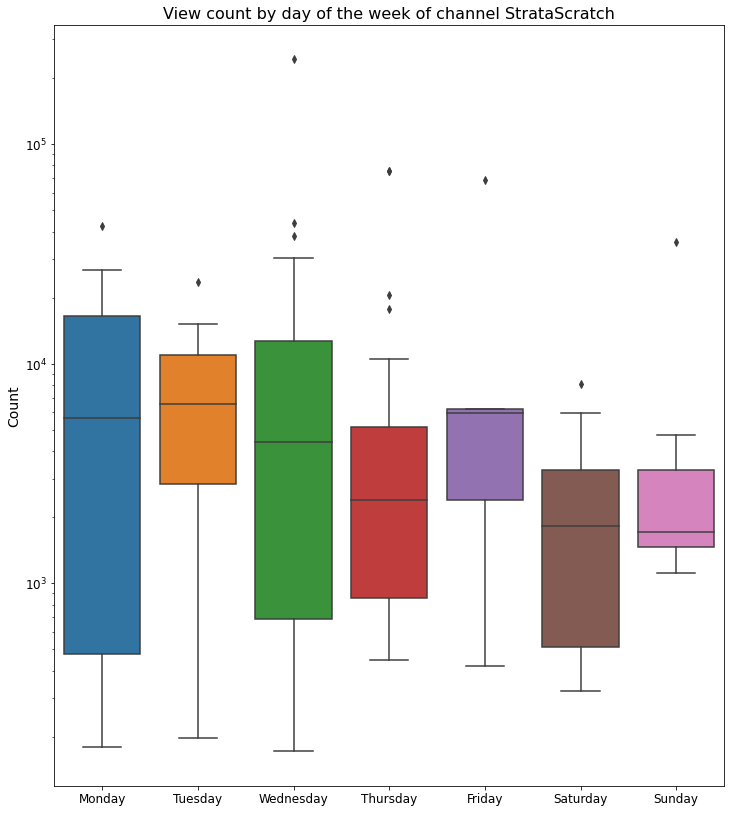

In [40]:
for channel_name in youtube_df['channel_title'].unique():
    plot_view_count_day_name(youtube_df[youtube_df['channel_title']==channel_name], channel_name)

Channel UMotivo: it's impressive how "day agnostic" the number of views are.

3Blue1Brown: one of the few channels that has a great result on sundays.

I don't see a trend that makes me believe that using the day of the week as a "view count" predictor would help. Each channel seems to have a relationship with its subscribers, so that people who watch "3Blue1Brown" are used to watch videos published on Sundays, while people who watch "UMotivo" knows that videos are published everyday and they tend to watch all of them. 

But it wouldn't hurt to add these features in our machine learning model and test it.



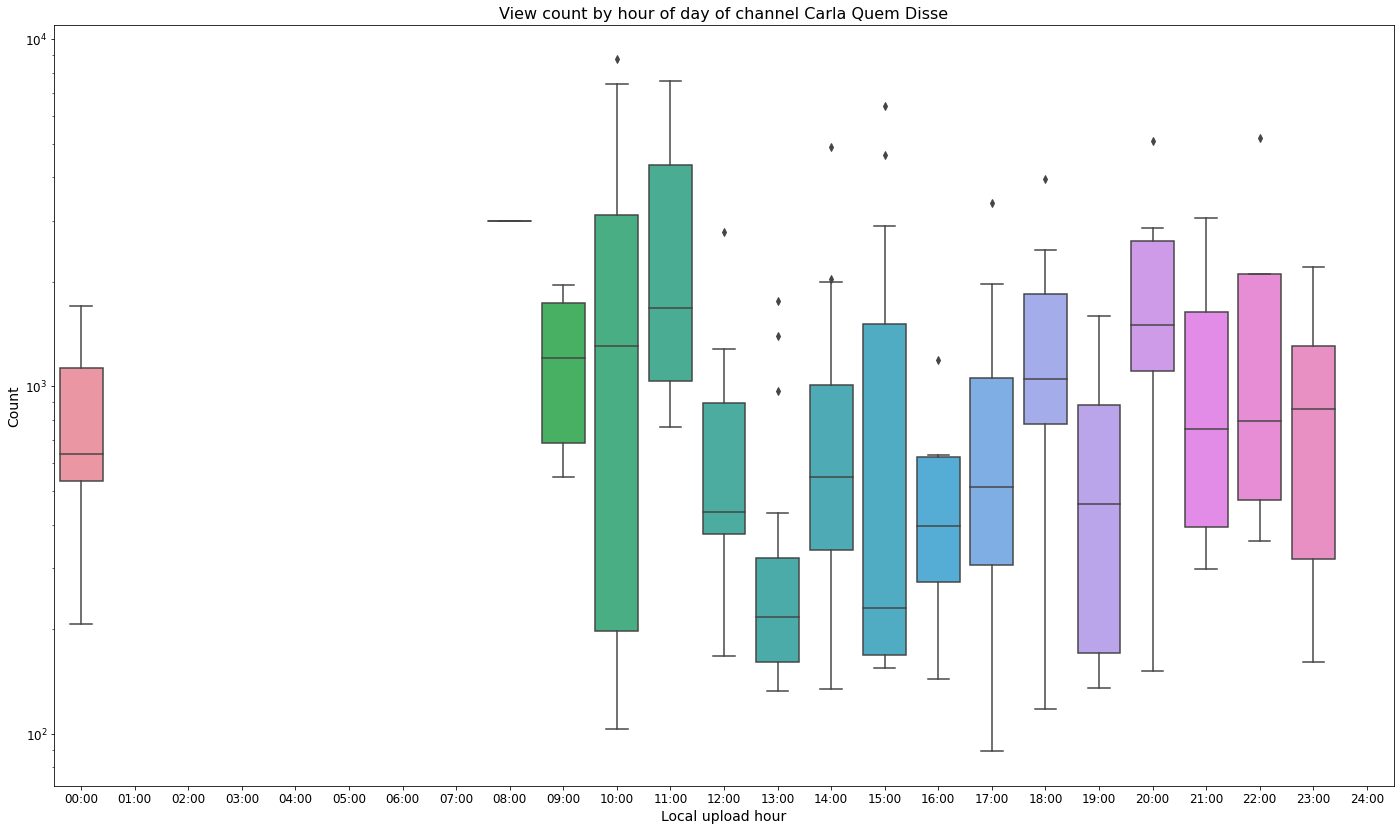

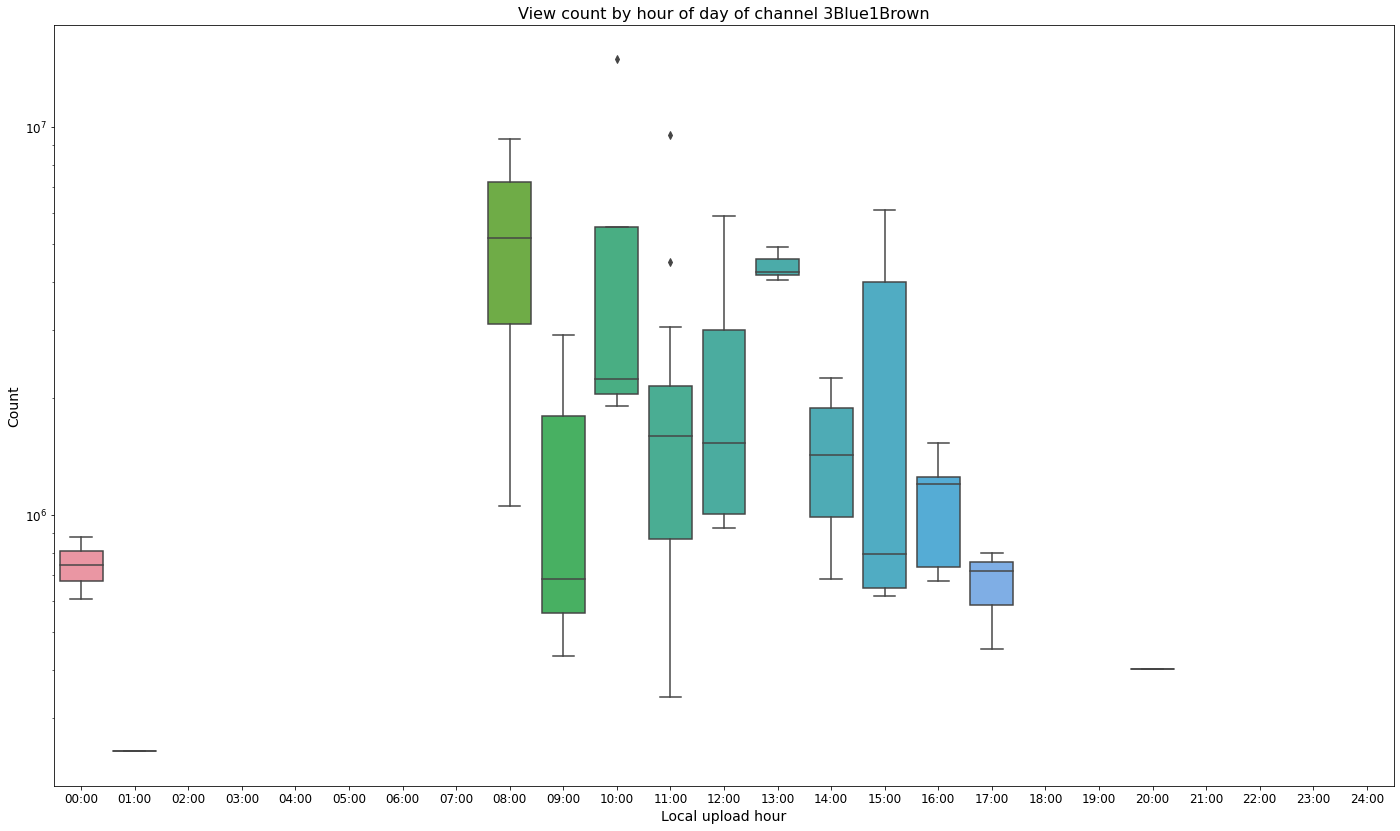

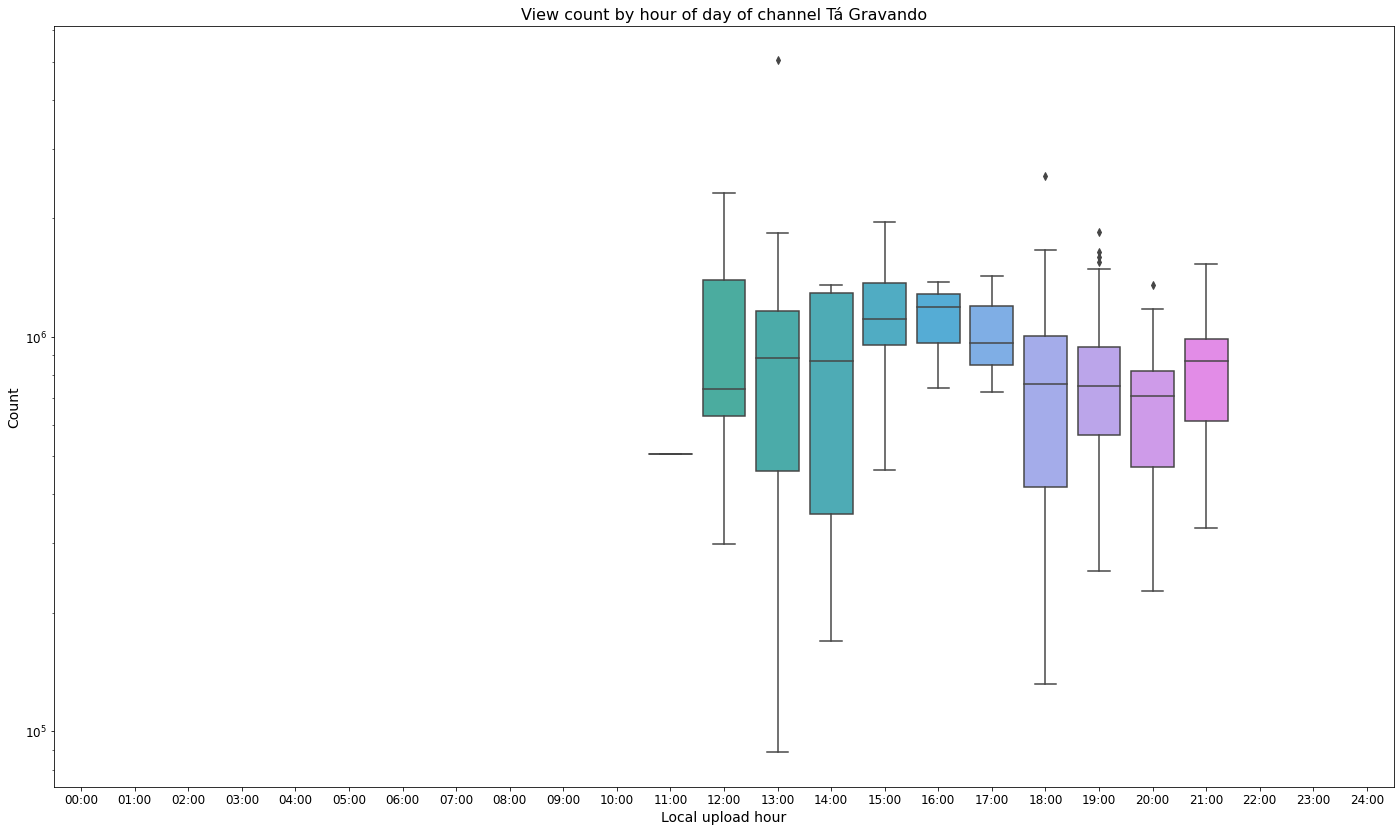

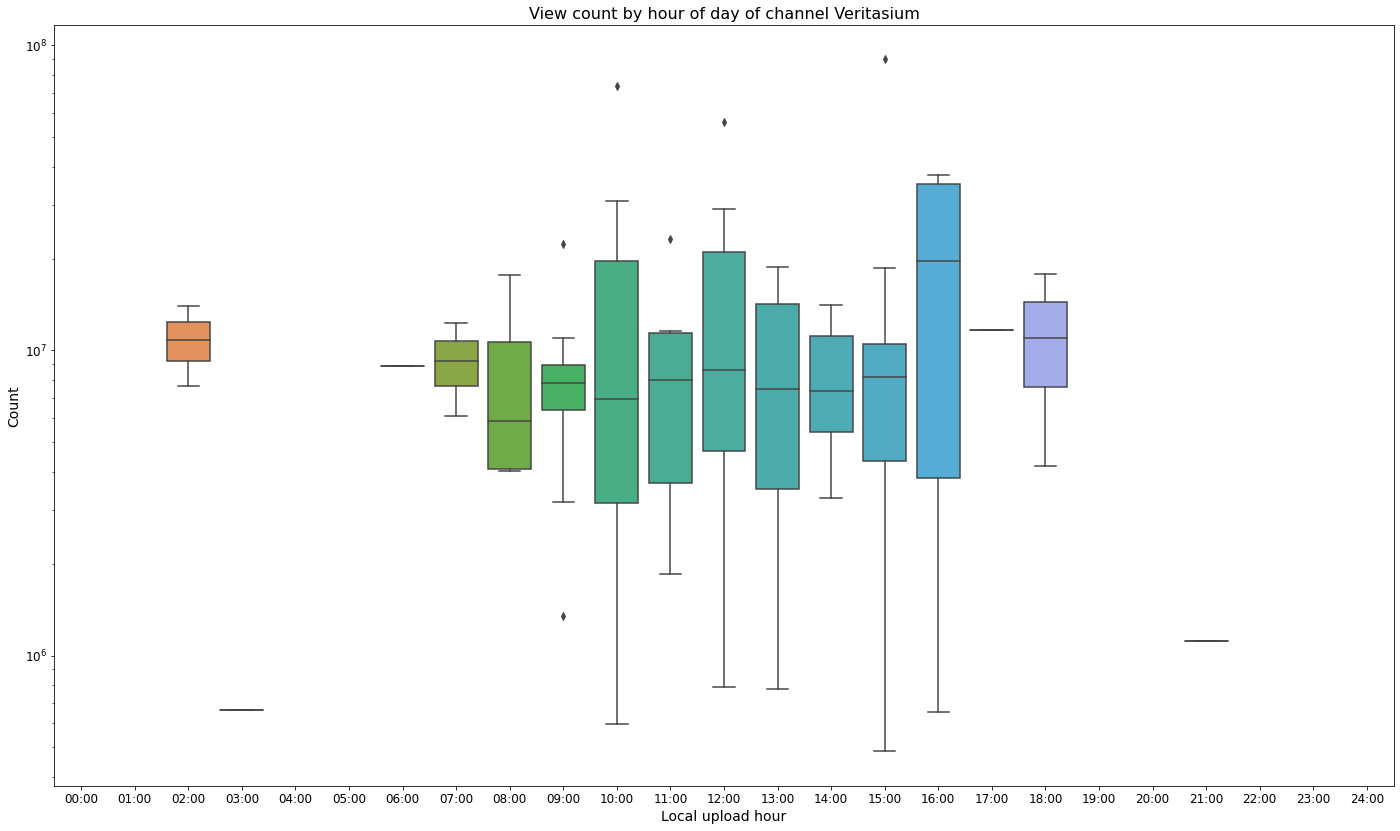

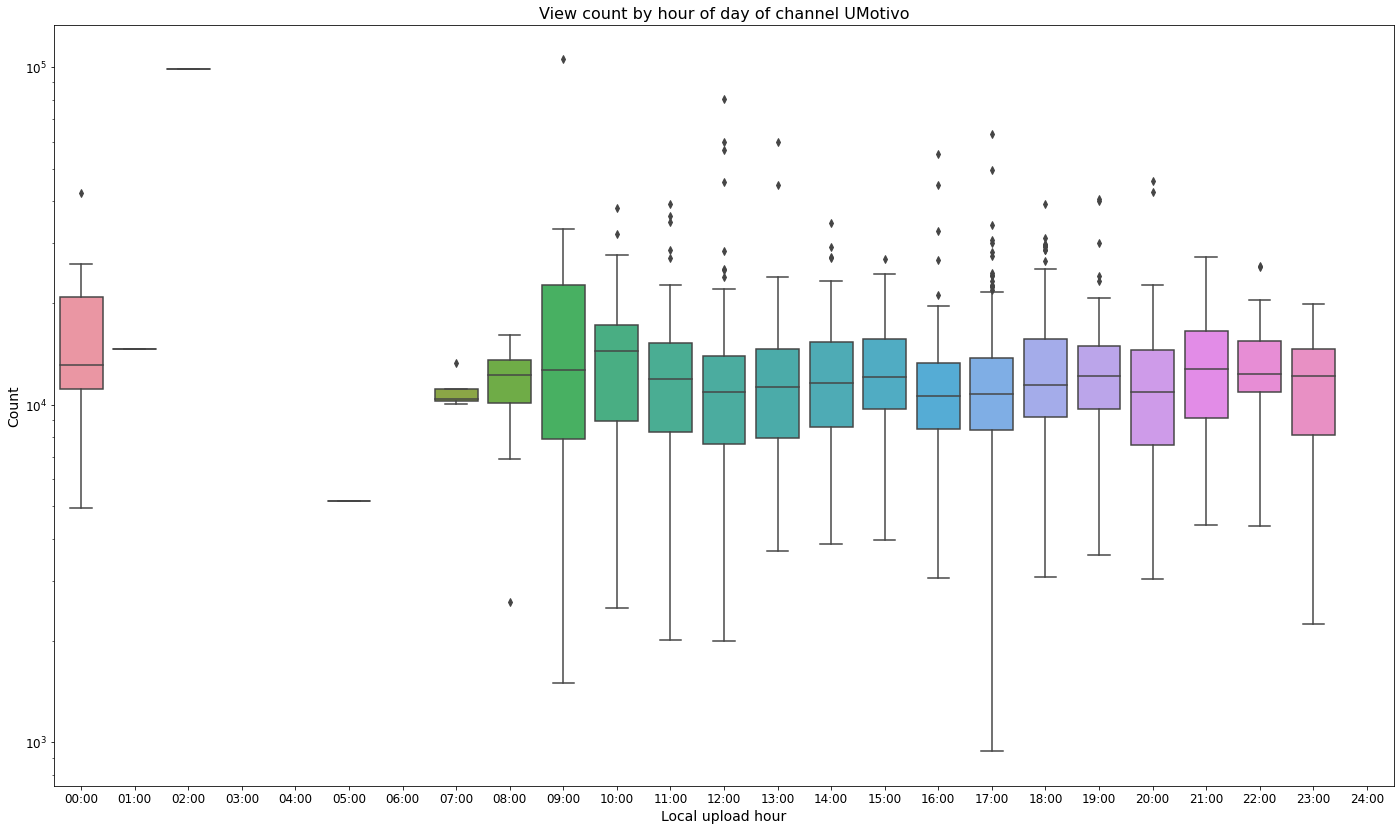

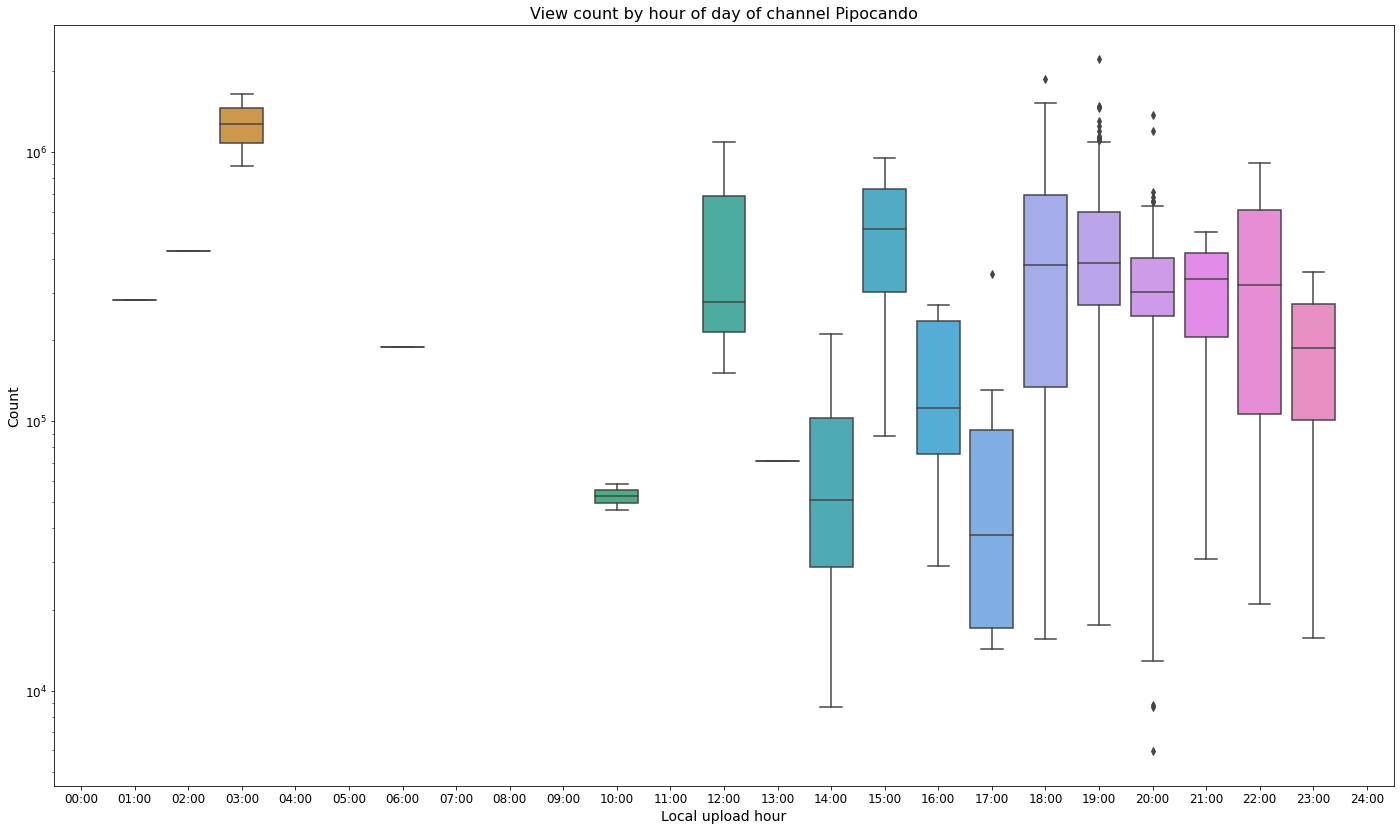

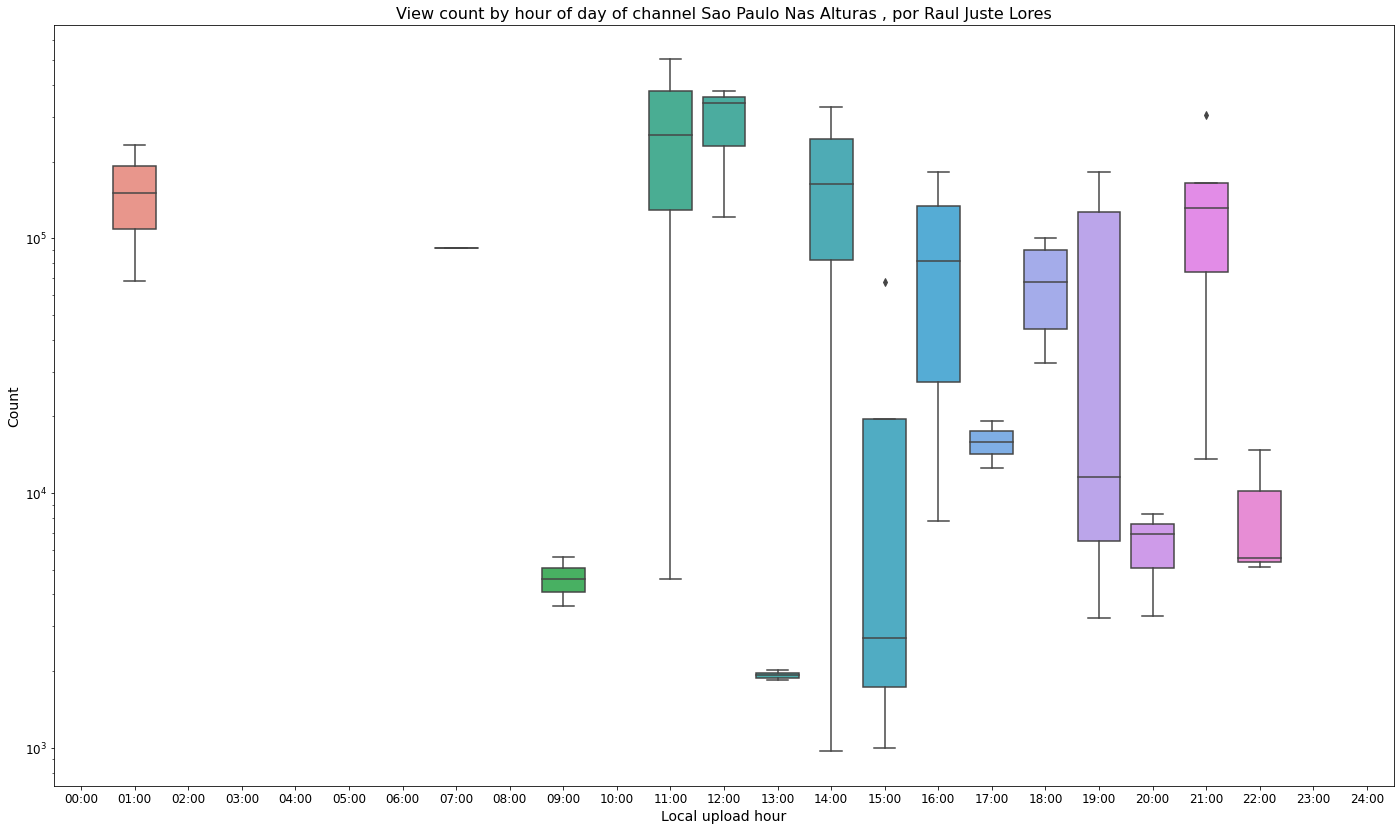

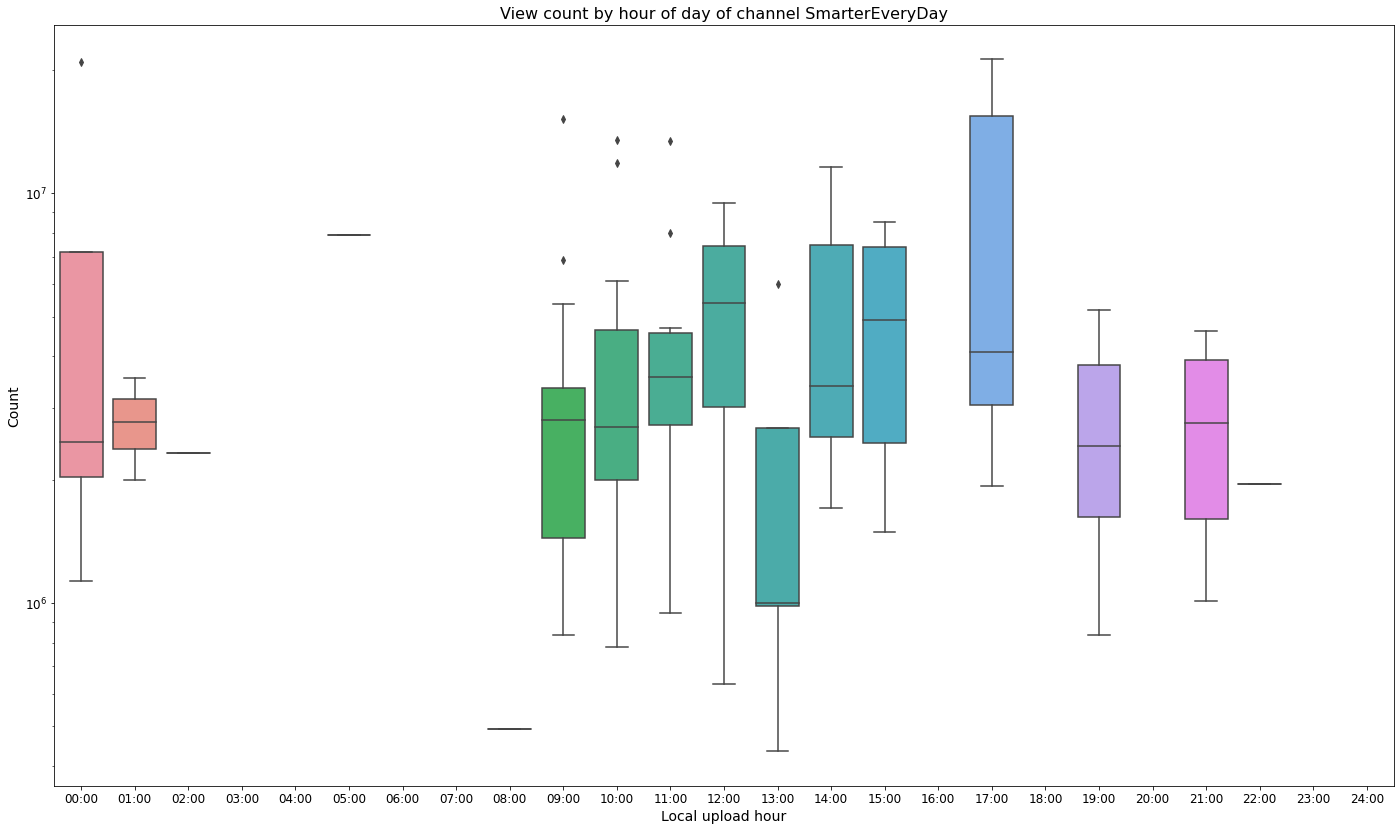

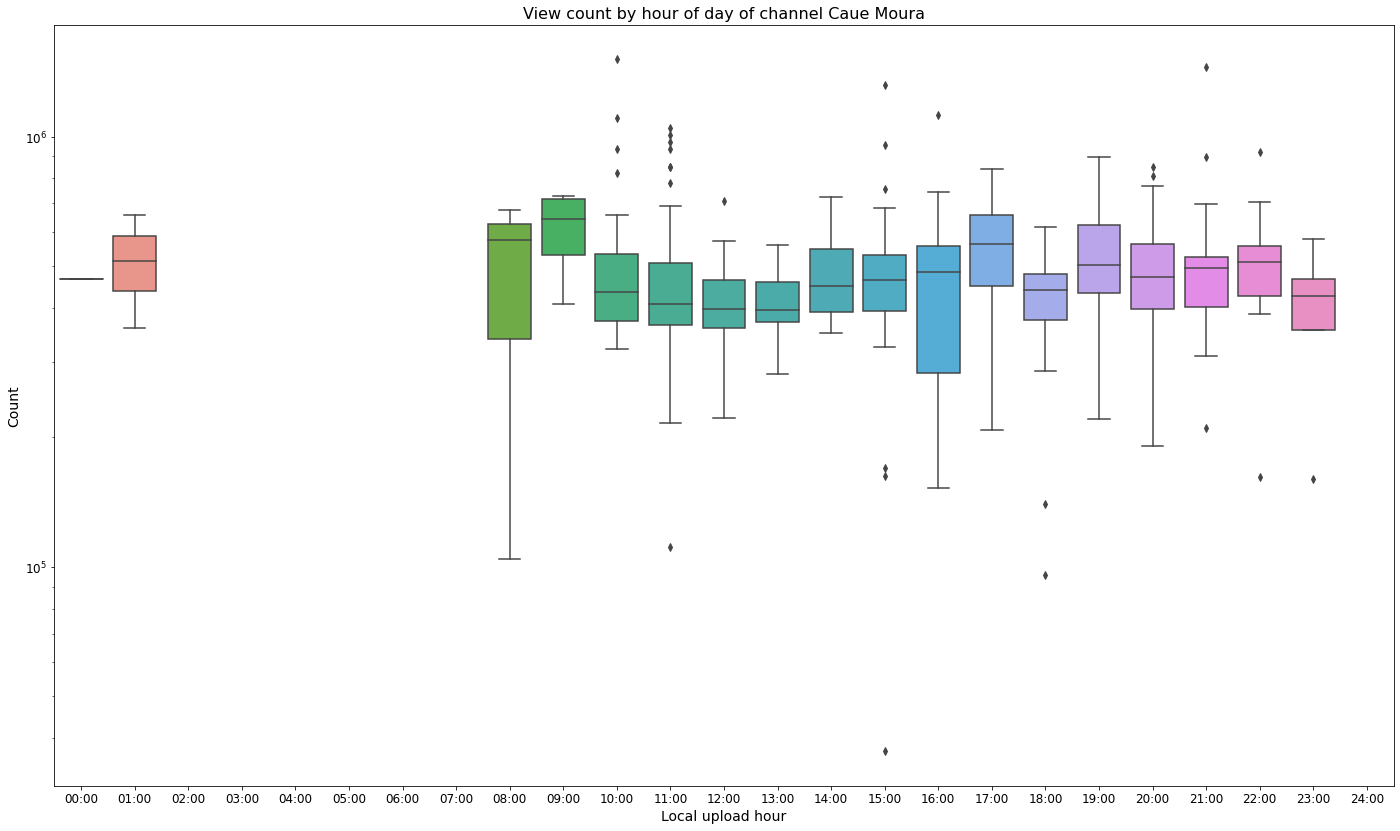

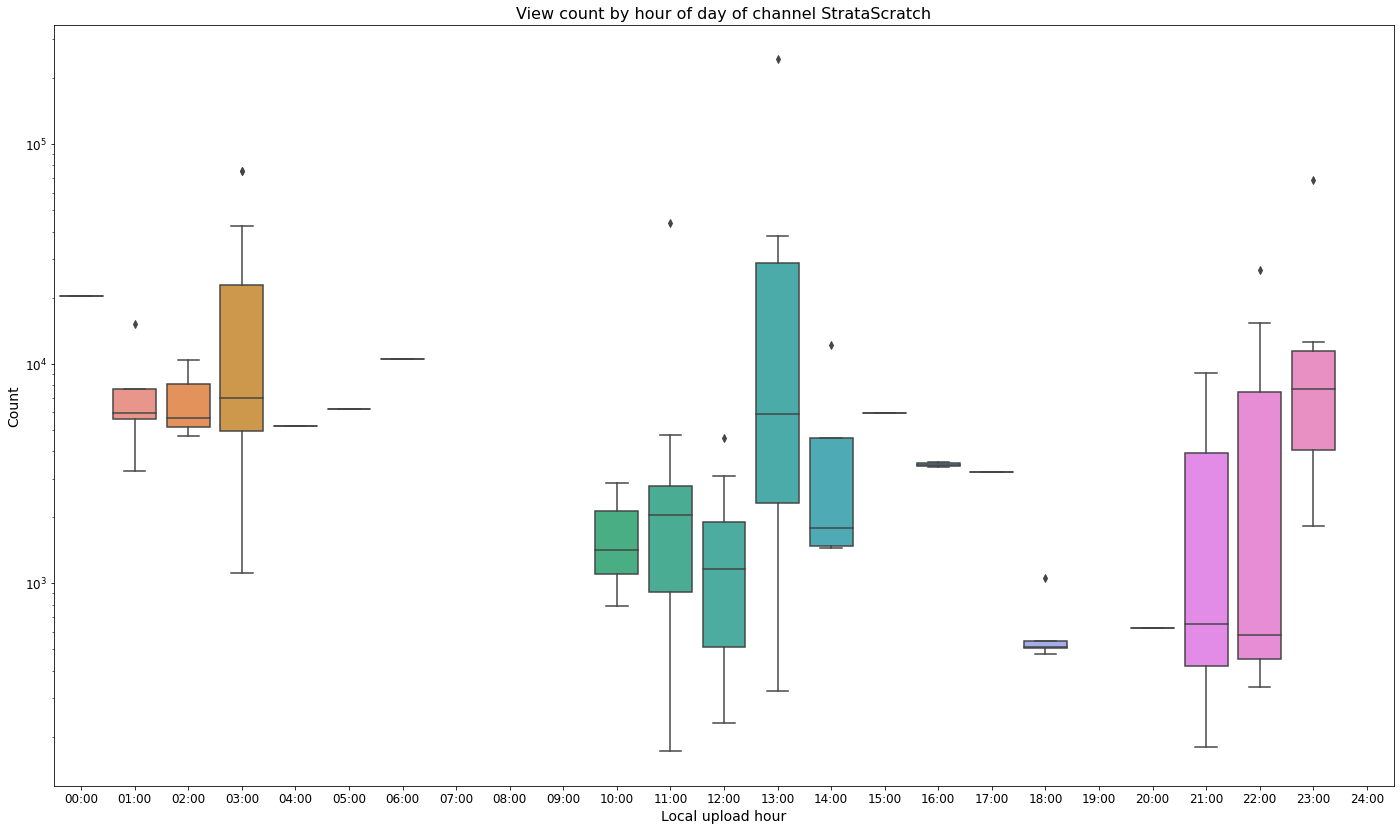

In [41]:
for channel_name in youtube_df['channel_title'].unique():
    plot_view_count_hour(youtube_df[youtube_df['channel_title']==channel_name], channel_name)

Once again, I don't think that the hour a video was published on is going to help when trying to predict the number of views a video will get. Sure, some channels did publish on times that the result wasn't good, but this is not a rule for all channels, and also there's no clear trend of "what time is best to publish" across all channels or even for a single channel.

## 3.3) Visualizing correlations

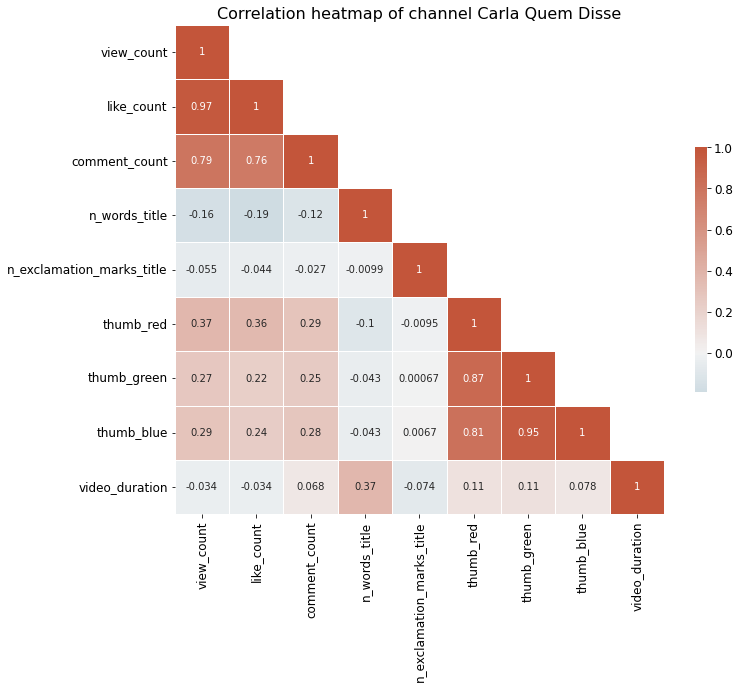

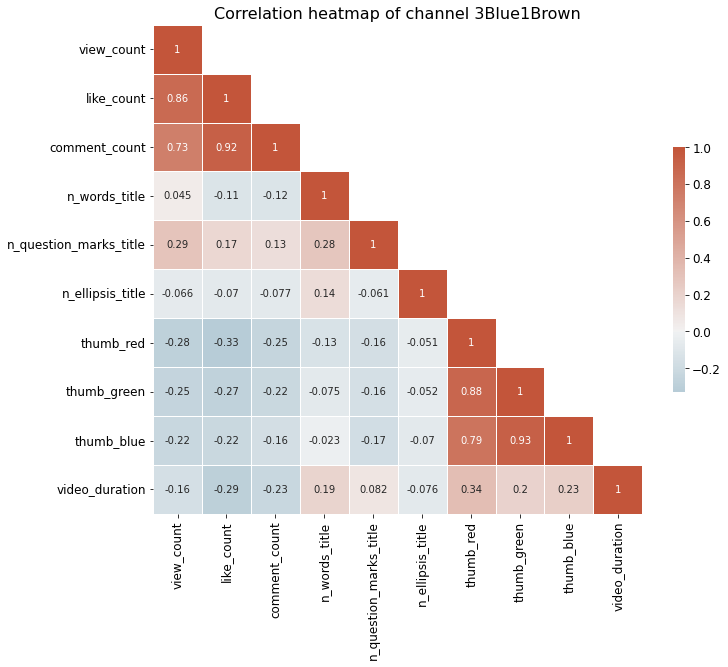

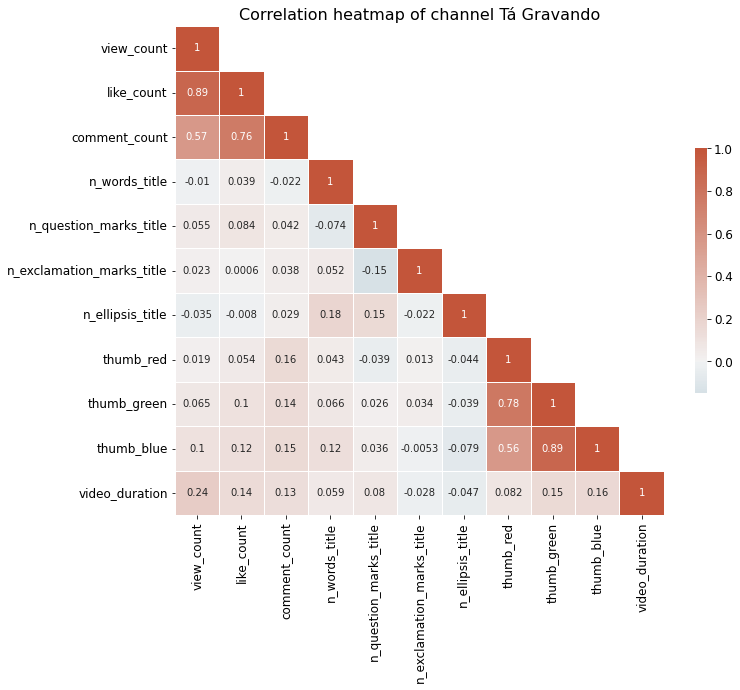

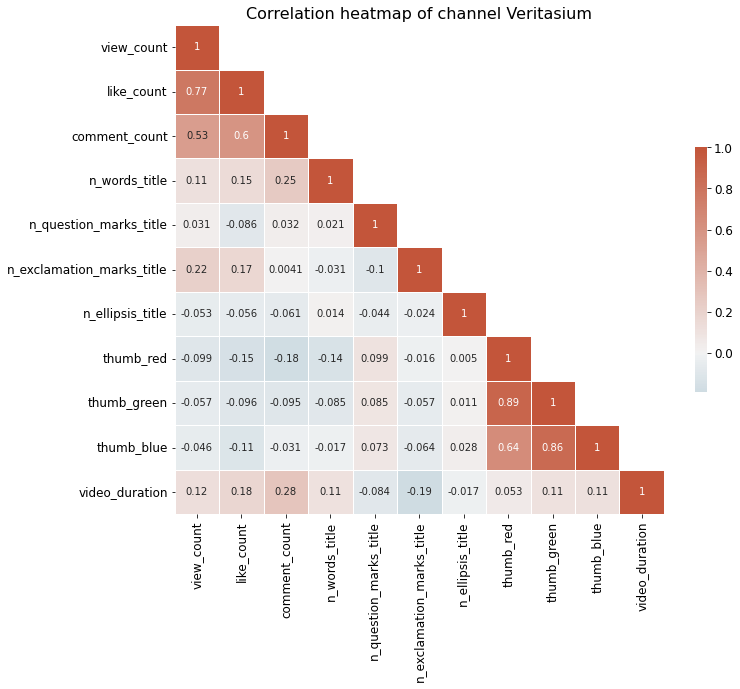

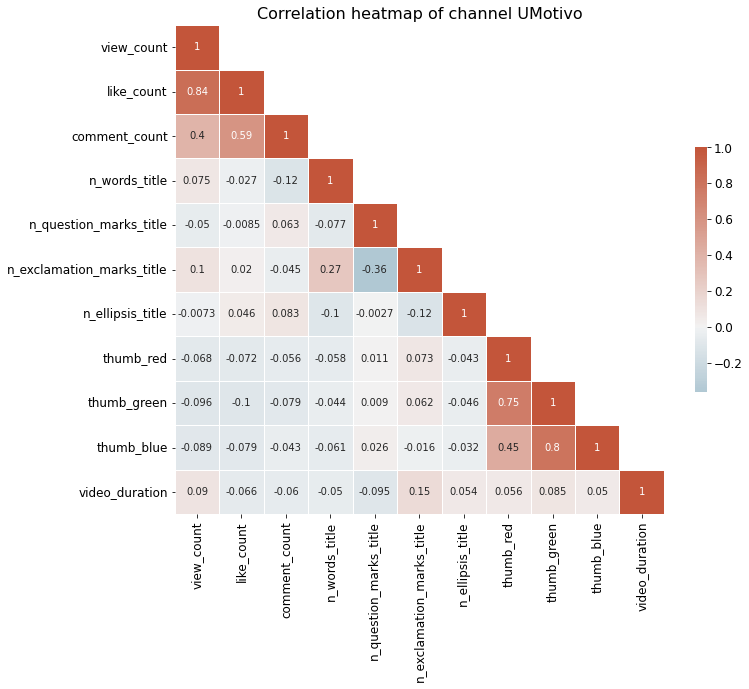

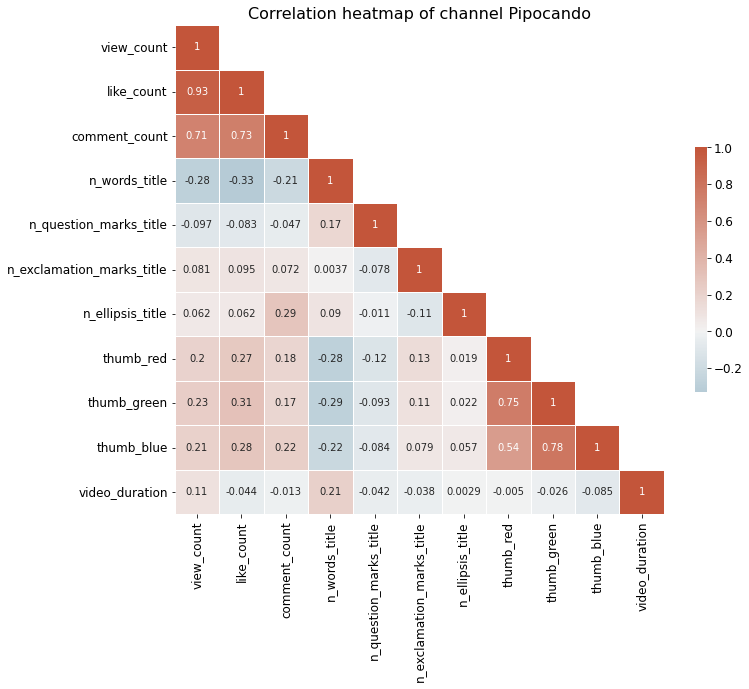

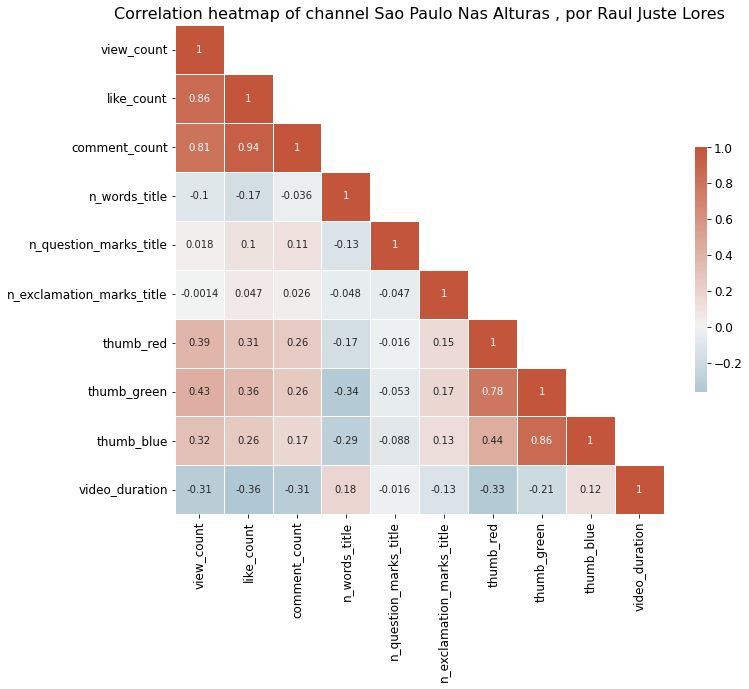

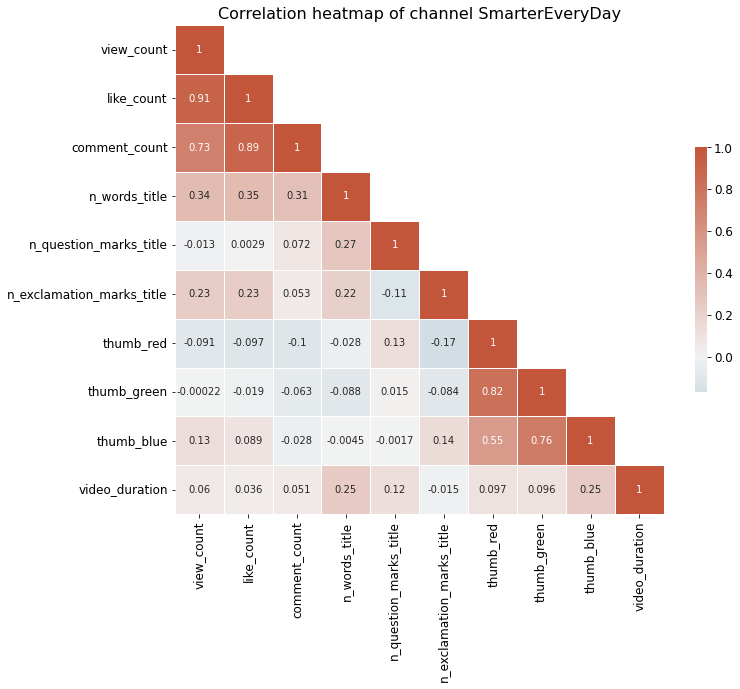

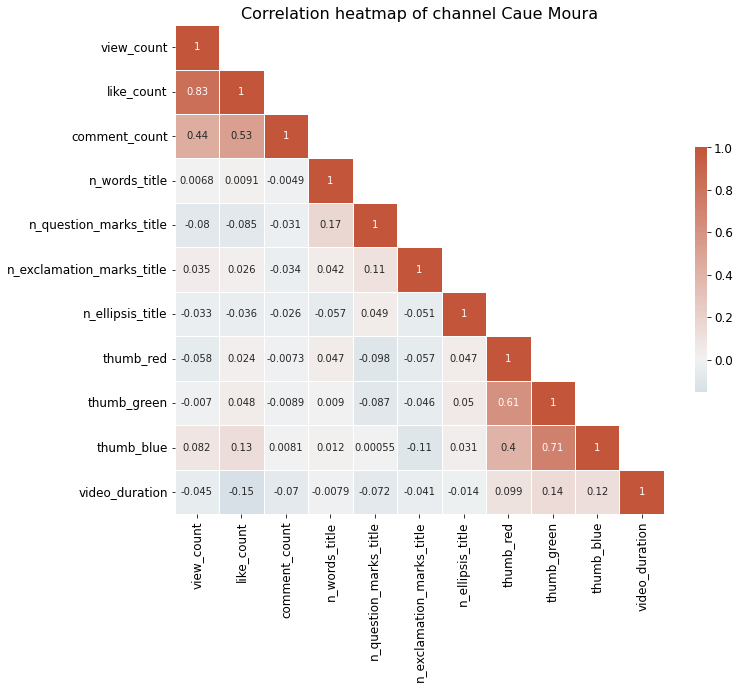

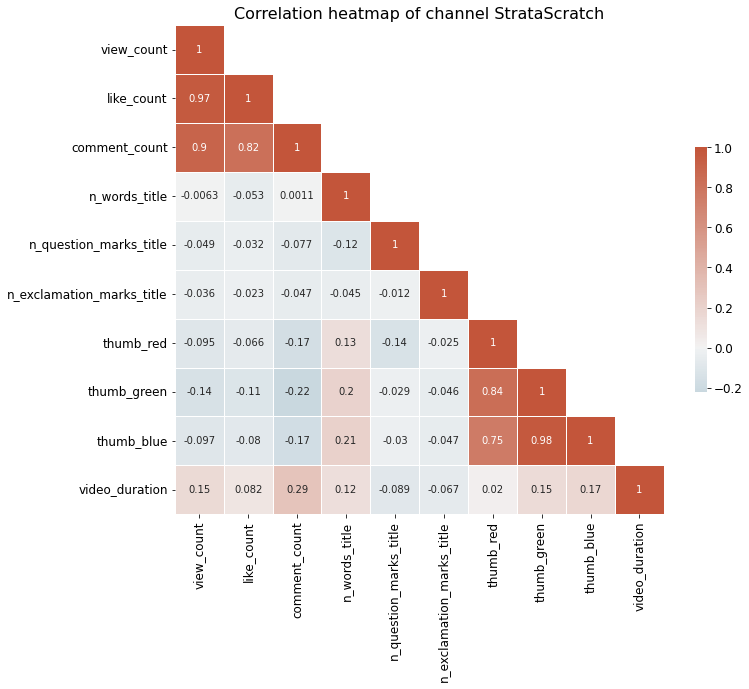

In [42]:
for channel_name in youtube_df['channel_title'].unique():
    plot_corr_heatmap(youtube_df[youtube_df['channel_title']==channel_name], channel_name)

# **Conclusion**
We now finished our data analysis. I will not summarize it here because there's actually a dedicated notebook for that, you can check it here: https://colab.research.google.com/drive/1CUjP7SdFGldPjuSVSIbHAk9UPWYp_RYz?usp=sharing


<br><br>


But if you want to continue and see how we can predict the number of views of a given video you just have to click here: https://colab.research.google.com/drive/1Nbj6TM5HaK2krMRa9R1oiolDhDronYQB?usp=sharing